# ****intro****

The National Health and Nutrition Examination Survey (NHANES) II, conducted from 1976 to 1980, stands as a pivotal and comprehensive health assessment program in the United States. Initiated by the National Center for Health Statistics (NCHS), a branch of the Centers for Disease Control and Prevention (CDC), NHANES II aimed to provide a thorough understanding of the health and nutritional status of the American population during that specific time frame.
Building on the foundation laid by its predecessor, NHANES I, which took place from 1971 to 1975, NHANES II continued its mandate of collecting extensive data through interviews, physical examinations, and laboratory tests. This survey played a crucial role in shaping public health policies and strategies by offering a detailed snapshot of the nation's health, nutrition, and disease prevalence.
NHANES II encompassed a wide range of health-related topics, including chronic diseases, nutritional habits, socioeconomic factors, and environmental exposures. By employing a stratified, multistage sampling approach, the survey ensured representation of various demographic groups, allowing for more accurate and generalizable findings.
The data collected during NHANES II has been instrumental in informing public health initiatives, guiding researchers, policymakers, and healthcare professionals in their efforts to address health disparities, assess the impact of interventions, and develop evidence-based strategies for improving the overall well-being of the U.S. population. As a foundational chapter in the NHANES series, NHANES II remains a valuable resource for understanding the evolving health landscape of the late 20th century in the United States


# **Objectives**


Identify the higher age  that have heartatk.

Identify the higher age  that have diabetes.

Identify sex   that have heartatk.

Identify the highest value of zinc

Identify the highest value of vitamin c.

Identify the most region 


# **questions**


**1- Descriptive questions**

What is mean  of weight ,height, age?

What is mean  of  zinc, vitaminc, copper?

Distribution of region?

Who is more male or female?

Who has more highbp?

Are there any outliers in the dataset, and how do they affect the overall analysis? 

**2- Exploratory questions**

Is Race correlated with finalwgt,leadwt?

Is region correlated with the hgp?

Is there a relationship weight between and diabetes?

What is the correlation between height and heartatk?

Is there a relationship hlthstat between and heartatk?

Is there a correlation between BMI and height, weight?

Is there a relationship BMI between and SEX?

Is there a correlation between RACE and hlthstat?


**3-predictive question**

Can we predict price in general based on existing variable.

Can we predict the highest variable that affects diabetes.


# **Analysis**

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from bokeh.models import ColumnDataSource
from plotnine import ggplot, aes, geom_point, theme_minimal, labs, theme, element_blank
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.stats.diagnostic as ssd
import  statsmodels.stats.outliers_influence as oi
import statsmodels.stats.anova as av
import statsmodels.stats.oneway as ow
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.multicomp import pairwise_tukeyhsd

**read data**

National Health and Nutrition Examination Survey -> nhanes

In [90]:
nhanes =pd.read_csv("clenning.ipynb (cnhanes).csv")

In [91]:
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10349 entries, 0 to 10348
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sampl       10349 non-null  float64
 1   strata      10349 non-null  float64
 2   location    10349 non-null  float64
 3   houssiz     10349 non-null  int64  
 4   age         10349 non-null  int64  
 5   height      10349 non-null  float64
 6   weight      10349 non-null  float64
 7   bpsystol    10349 non-null  int64  
 8   bpdiast     10349 non-null  int64  
 9   tcresult    10349 non-null  float64
 10  hdresult    10349 non-null  float64
 11  hgb         10349 non-null  float64
 12  hct         10349 non-null  float64
 13  tibc        10349 non-null  float64
 14  iron        10349 non-null  float64
 15  finalwgt    10349 non-null  float64
 16  leadwt      10349 non-null  float64
 17  corpuscl    10349 non-null  float64
 18  trnsfern    10349 non-null  float64
 19  albumin     10349 non-nul

In [92]:
nhanes.head()

sampl  strata  location  houssiz  age      height     weight  bpsystol  \
0  1400.0     1.0       1.0        4   54  174.598007  62.480000       106   
1  1401.0     1.0       1.0        6   41  152.296997  48.759998       108   
2  1402.0     1.0       1.0        6   21  164.098007  67.250000        98   
3  1404.0     1.0       1.0        9   63  162.598007  94.459999       180   
4  1405.0     1.0       1.0        3   64  163.098007  74.279999       120   

   bpdiast  tcresult  ...  smsa_all  region_all  psu  sex  race   hlthstat  \
0       80     226.0  ...         2           3    0    1     0  Very good   
1       66     179.0  ...         2           3    0    0     0  Very good   
2       66     137.0  ...         1           3    0    0     2       Good   
3       80     189.0  ...         2           3    0    0     0       Fair   
4       76     311.0  ...         1           3    0    0     0  Very good   

   heartatk  diabetes                             sizplace  rural  
0         0         0  Urbanized area; 1,000,000–2,999,999      0  
1         0         0  Urbanized area; 1,000,000–2,999,999      0  
2         0         0  Urbanized area; 1,000,000–2,999,999      0  
3         0         1  Urbanized area; 1,000,000–2,999,999      0  
4         0         0  Urbanized area; 1,000,000–2,999,999      0  

[5 rows x 37 columns]

In [93]:
nhanes.describe()

sampl        strata      location       houssiz           age  \
count  10349.000000  10349.000000  10349.000000  10349.000000  10349.000000   
mean   33623.454054     16.664605     33.063388      2.943376     47.581795   
std    18412.384315      9.496886     18.412662      1.695022     17.215566   
min     1400.000000      1.000000      1.000000      1.000000     20.000000   
25%    17402.000000      8.000000     17.000000      2.000000     31.000000   
50%    34678.000000     16.000000     34.000000      2.000000     49.000000   
75%    49435.000000     25.000000     49.000000      4.000000     63.000000   
max    64709.000000     32.000000     64.000000     14.000000     74.000000   

             height        weight      bpsystol       bpdiast      tcresult  \
count  10349.000000  10349.000000  10349.000000  10349.000000  10349.000000   
mean     167.652605     71.899767    130.886656     81.716301    217.676974   
std        9.655687     15.357050     23.332026     12.927943     49.384976   
min      135.500000     30.840000     65.000000     35.000000     80.000000   
25%      160.500000     60.669998    114.000000     70.000000    183.000000   
50%      167.296997     70.419998    128.000000     80.000000    213.000000   
75%      174.598007     81.190002    142.000000     90.000000    247.000000   
max      200.000000    175.880005    300.000000    150.000000    828.000000   

       ...           bmi        highbp      smsa_all    region_all  \
count  ...  10349.000000  10349.000000  10349.000000  10349.000000   
mean   ...     25.537892      0.422843      2.200792      2.581119   
std    ...      4.915345      0.494035      0.818039      1.075303   
min    ...     12.385596      0.000000      1.000000      1.000000   
25%    ...     22.142040      0.000000      1.000000      2.000000   
50%    ...     24.818115      0.000000      2.000000      3.000000   
75%    ...     28.026737      1.000000      3.000000      4.000000   
max    ...     61.129696      1.000000      3.000000      4.000000   

                psu           sex          race      heartatk      diabetes  \
count  10349.000000  10349.000000  10349.000000  10349.000000  10349.000000   
mean       0.481882      0.474925      0.143589      0.045995      0.048217   
std        0.499696      0.499395      0.402042      0.209484      0.214235   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      2.000000      1.000000      1.000000   

              rural  
count  10349.000000  
mean       0.367378  
std        0.482114  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 35 columns]

#### **descrptive analysis**

In [94]:
num_nhanes = nhanes.select_dtypes(include=['number'])

In [95]:
int_nhanes = nhanes.select_dtypes(include=['int'])

In [96]:
obj_nhanes = nhanes.select_dtypes(include=['object'])

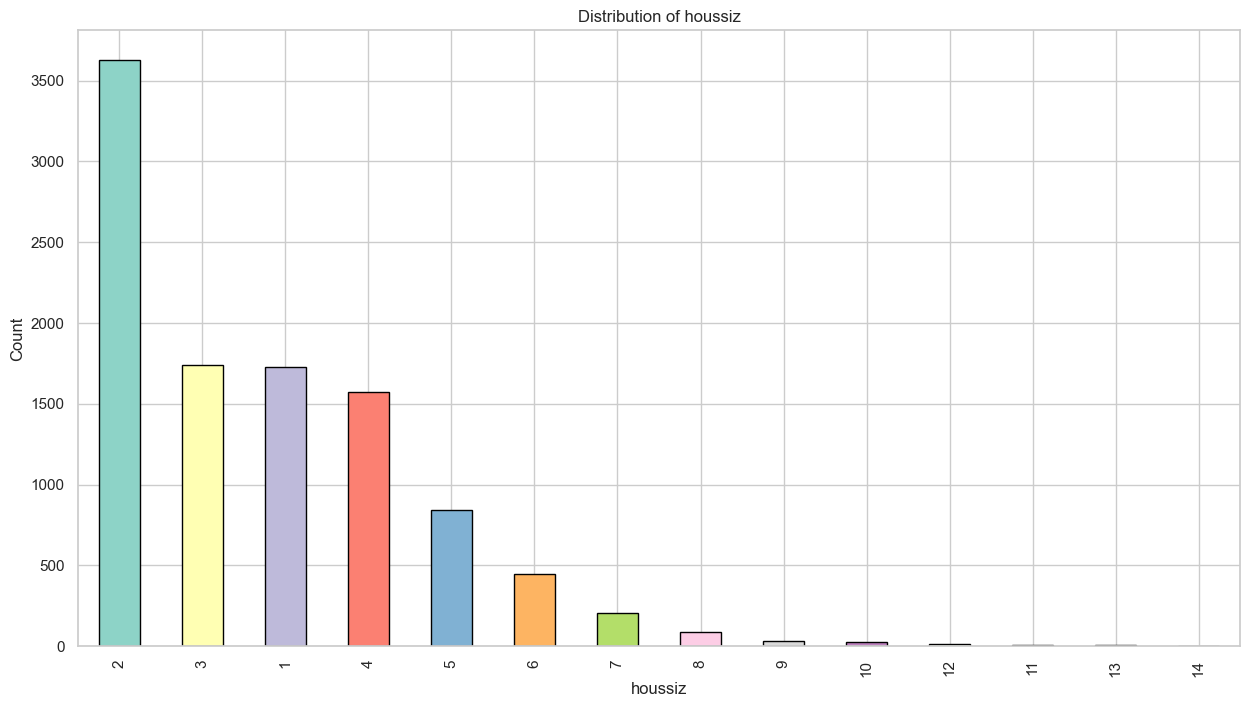

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

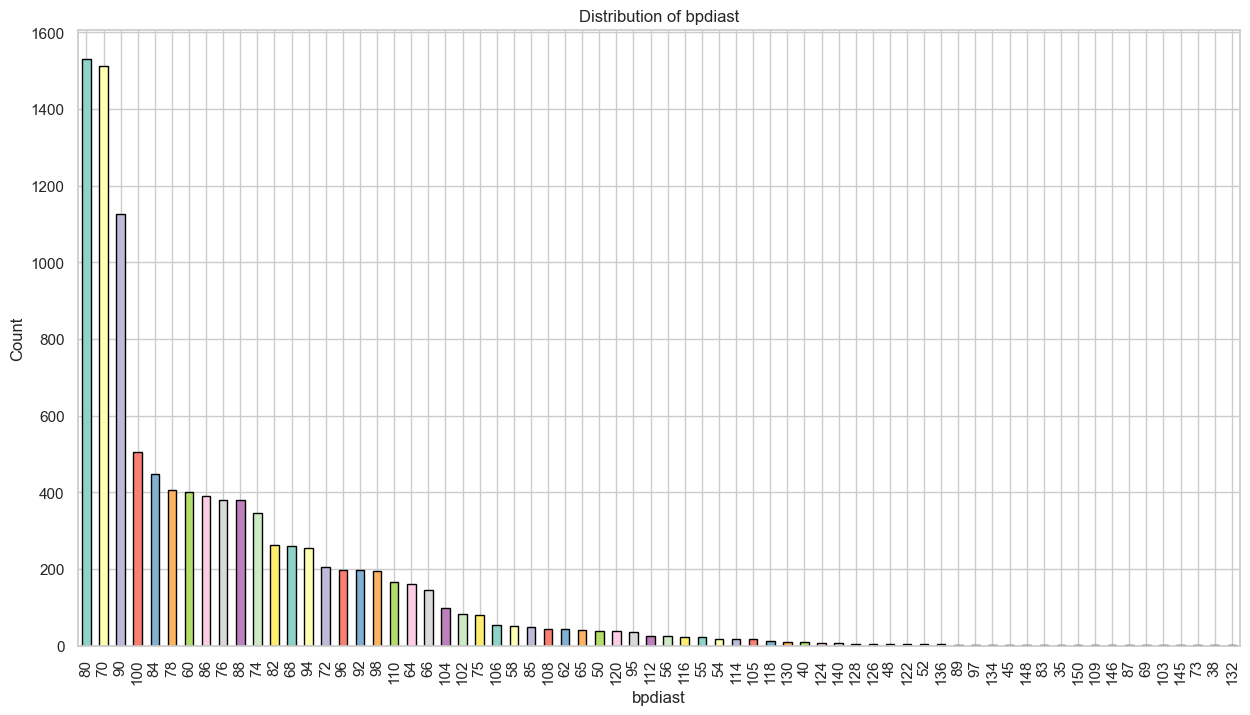

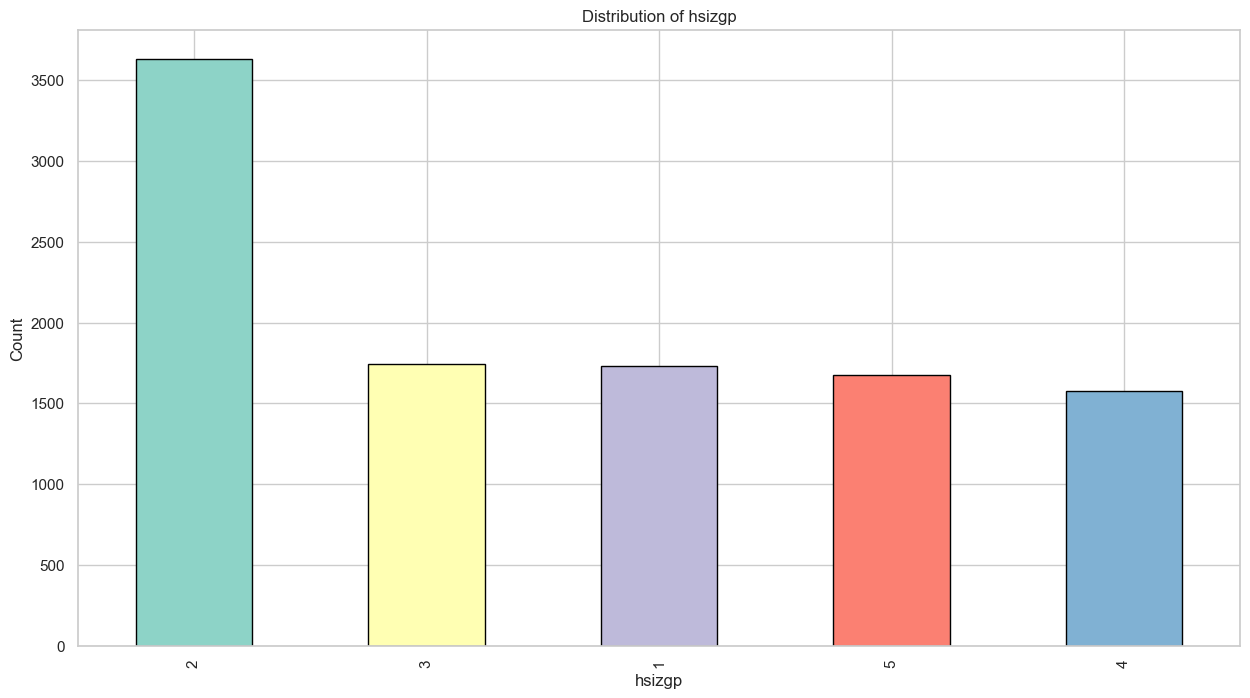

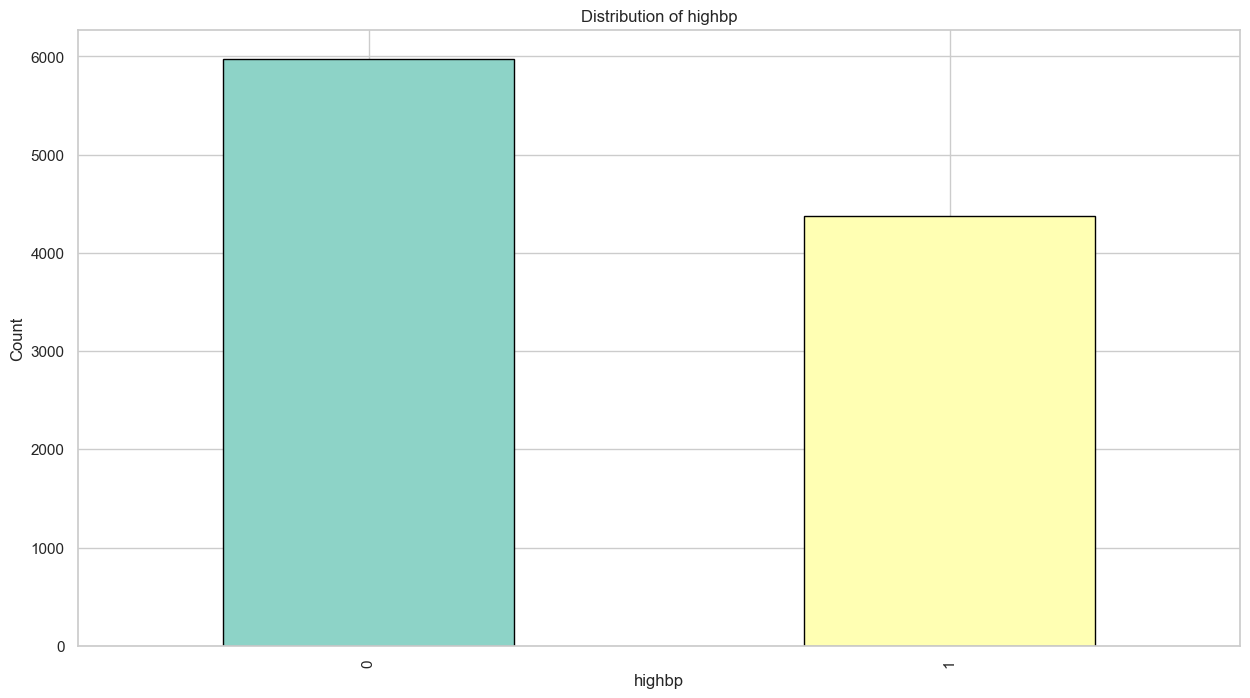

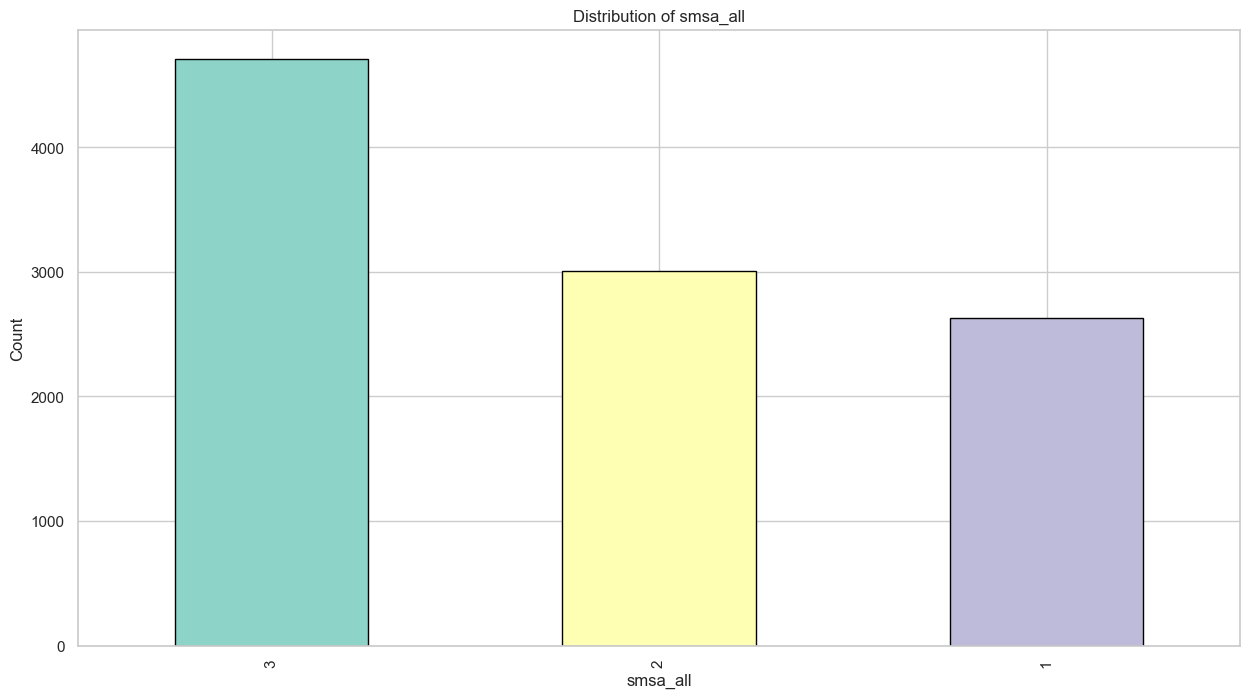

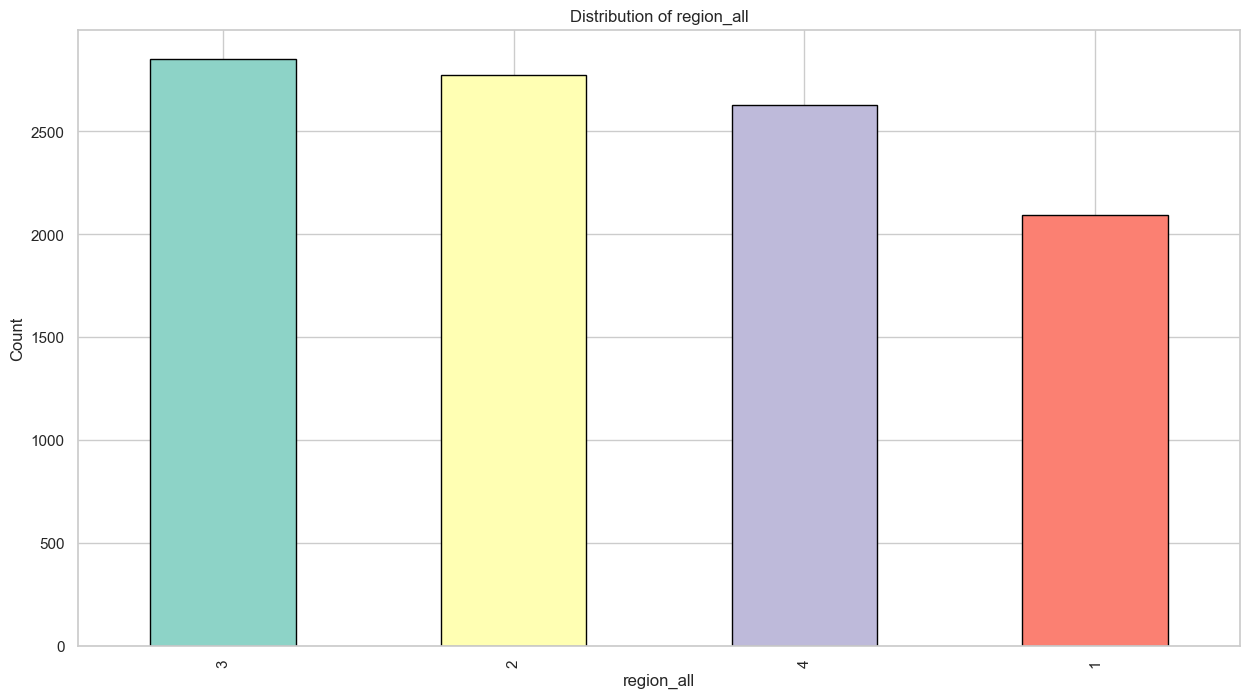

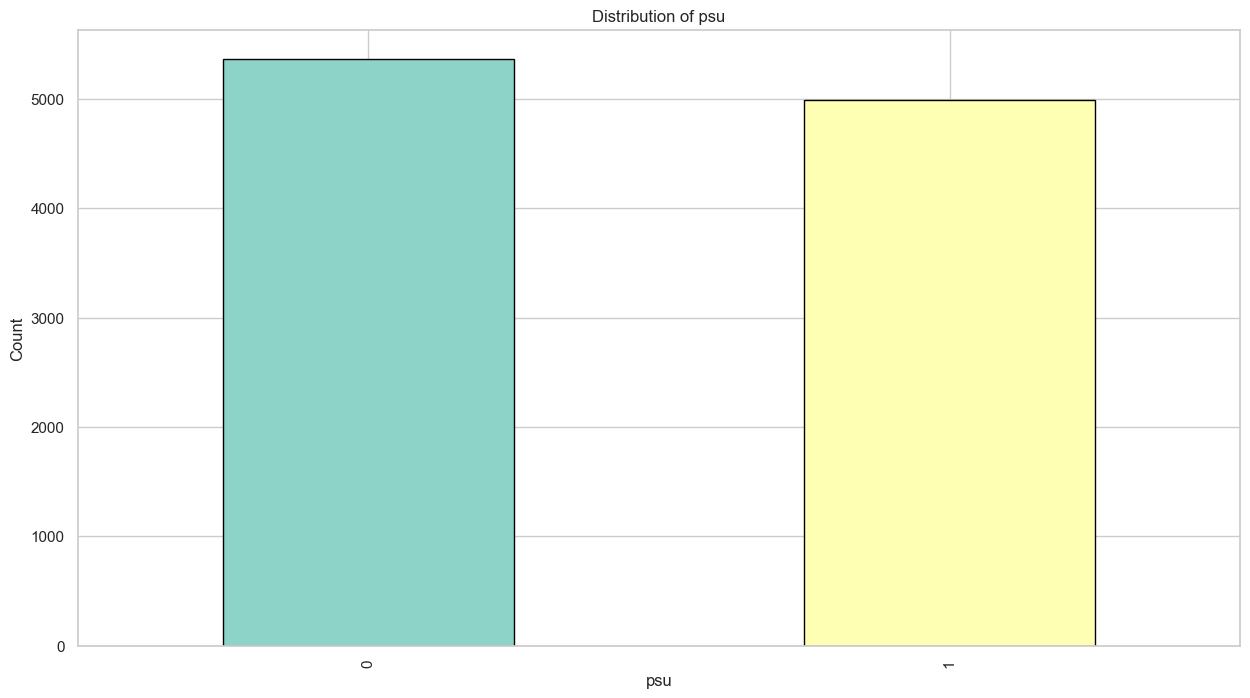

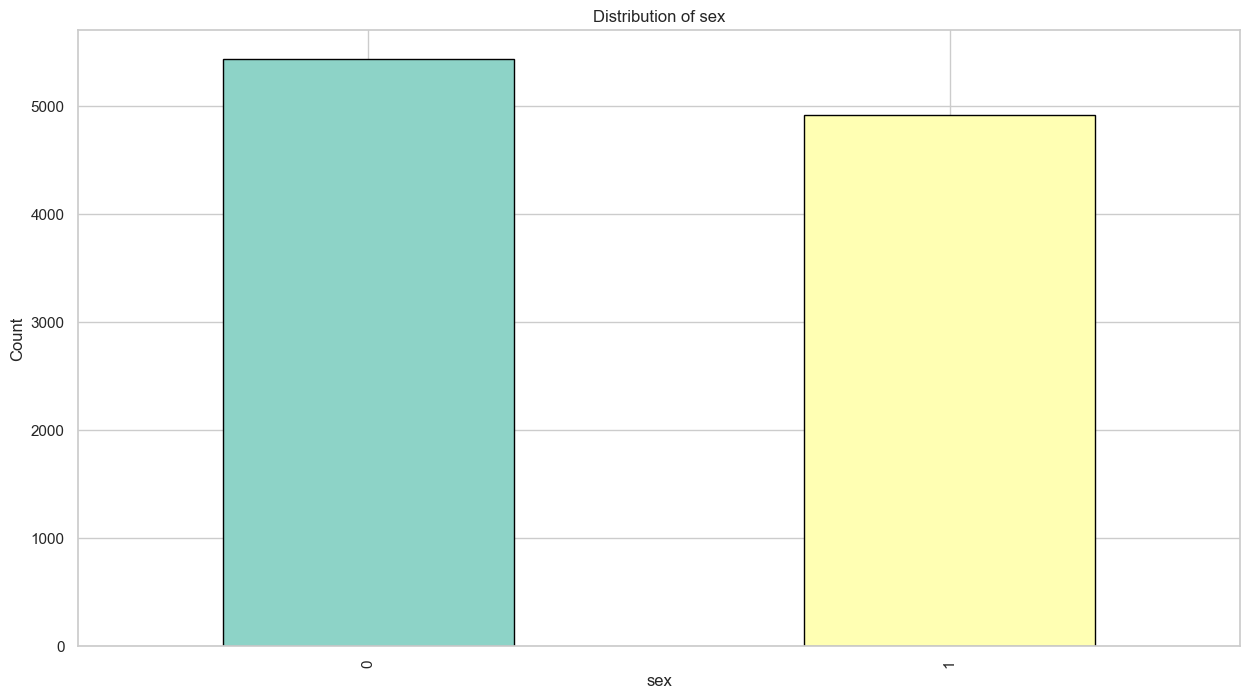

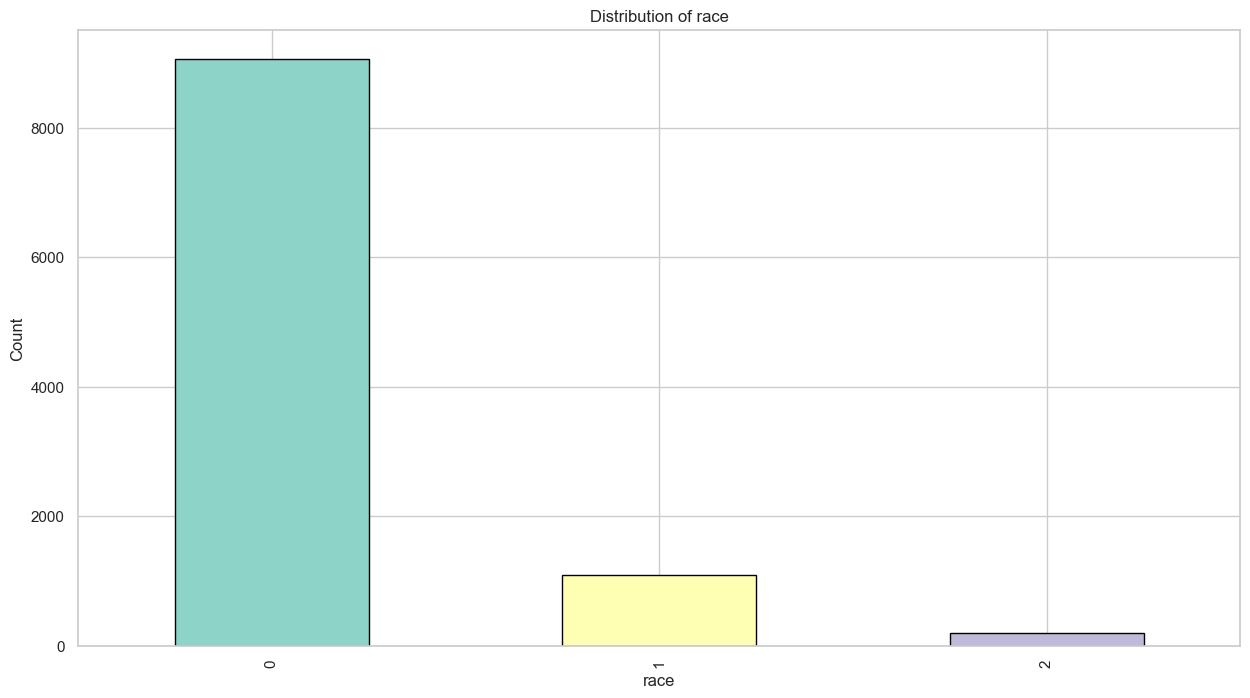

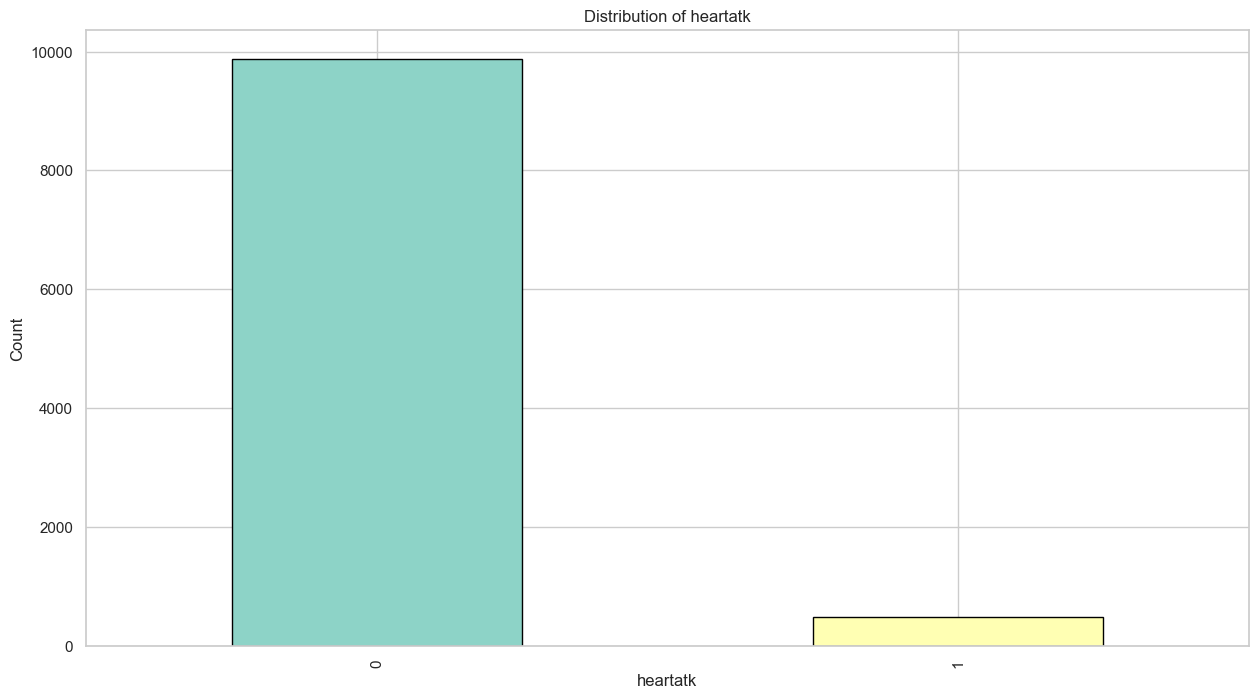

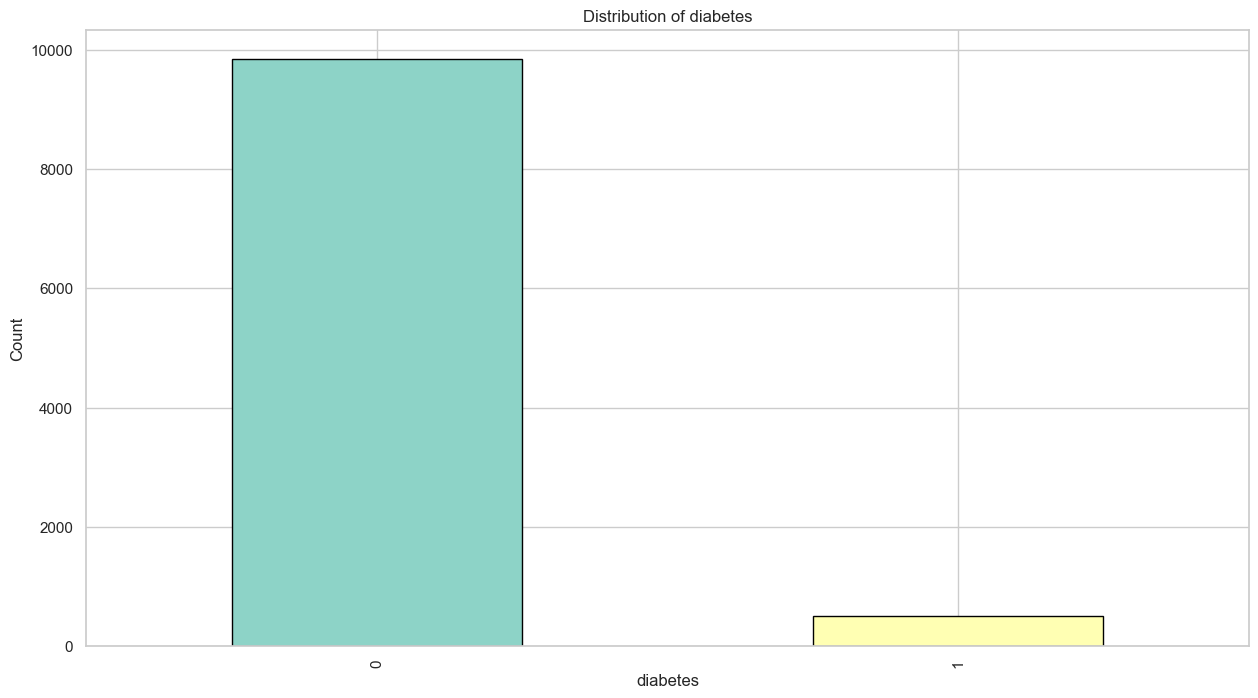

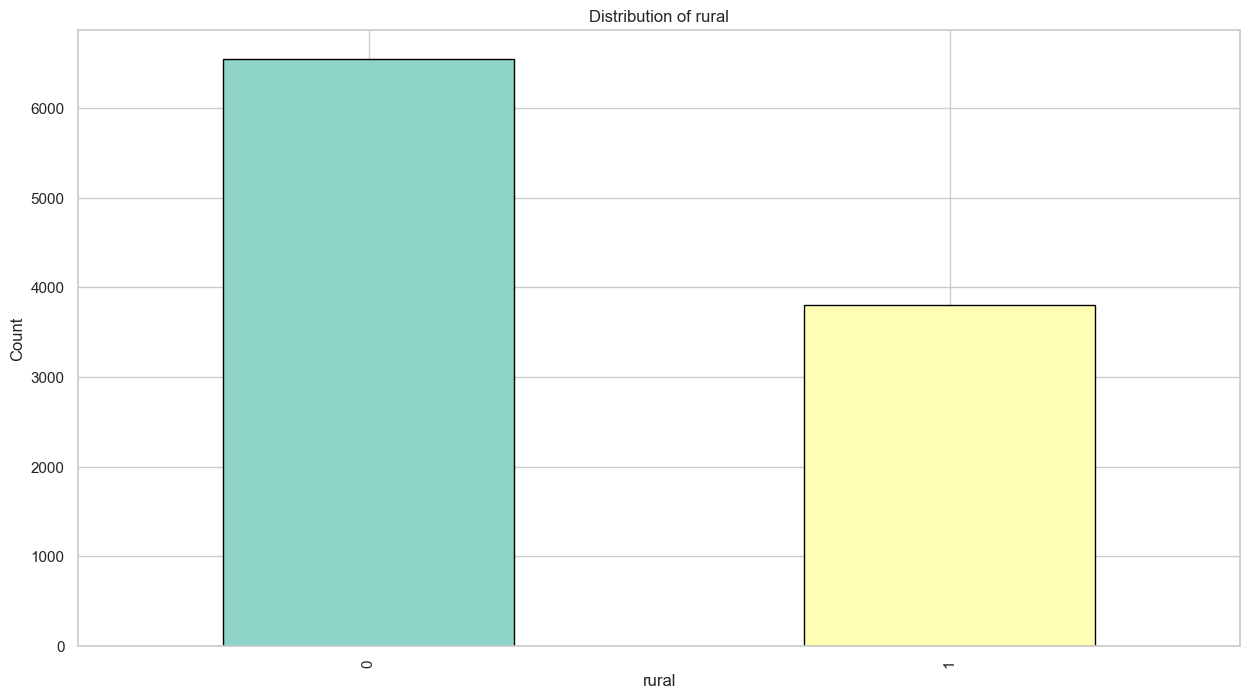

In [97]:
# Set a color palette for better visualization
sns.set_palette("Set3")

# Assuming 'int_nhanes' is a list of column names and 'num_nhanes' is a DataFrame
for column in int_nhanes:
    plt.figure(figsize=(15, 8))
    
    # Skip certain columns
    if column in ['age', 'houssize', 'bpsystol']:
        continue

    # Plot the bar chart
    num_nhanes[column].value_counts().plot(kind='bar', color=sns.color_palette("Set3"), edgecolor='black')

    # Add labels and title
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')

    # Display the chart
    plt.show()




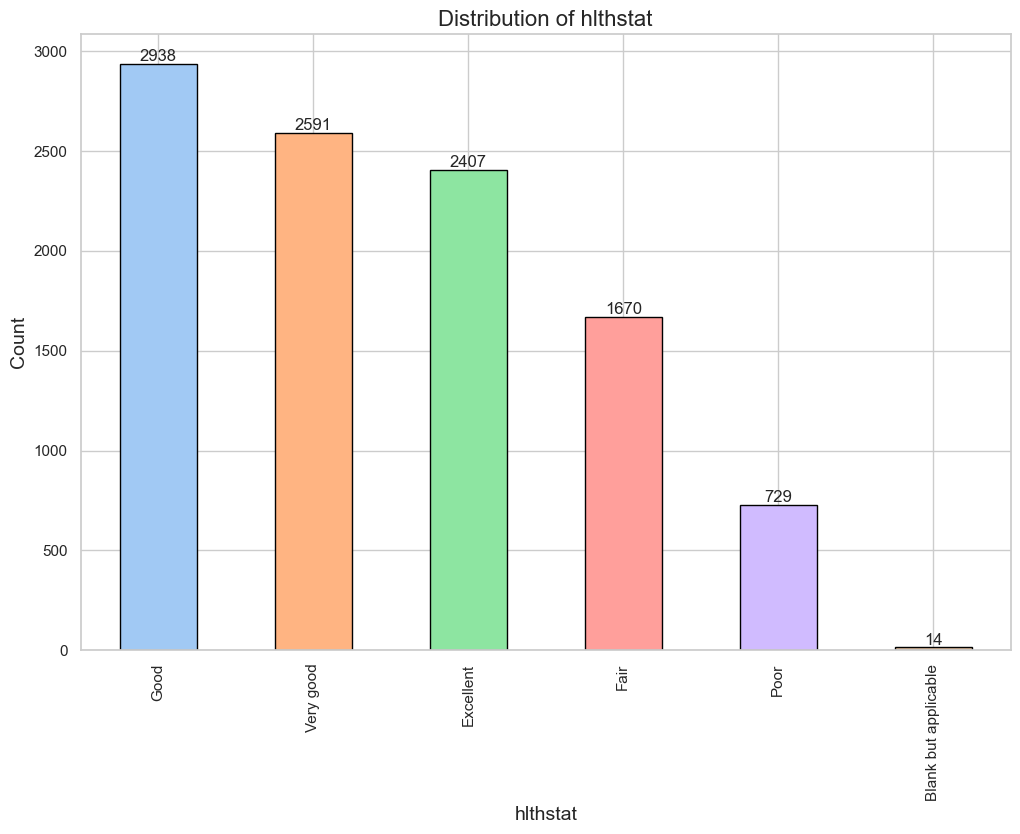

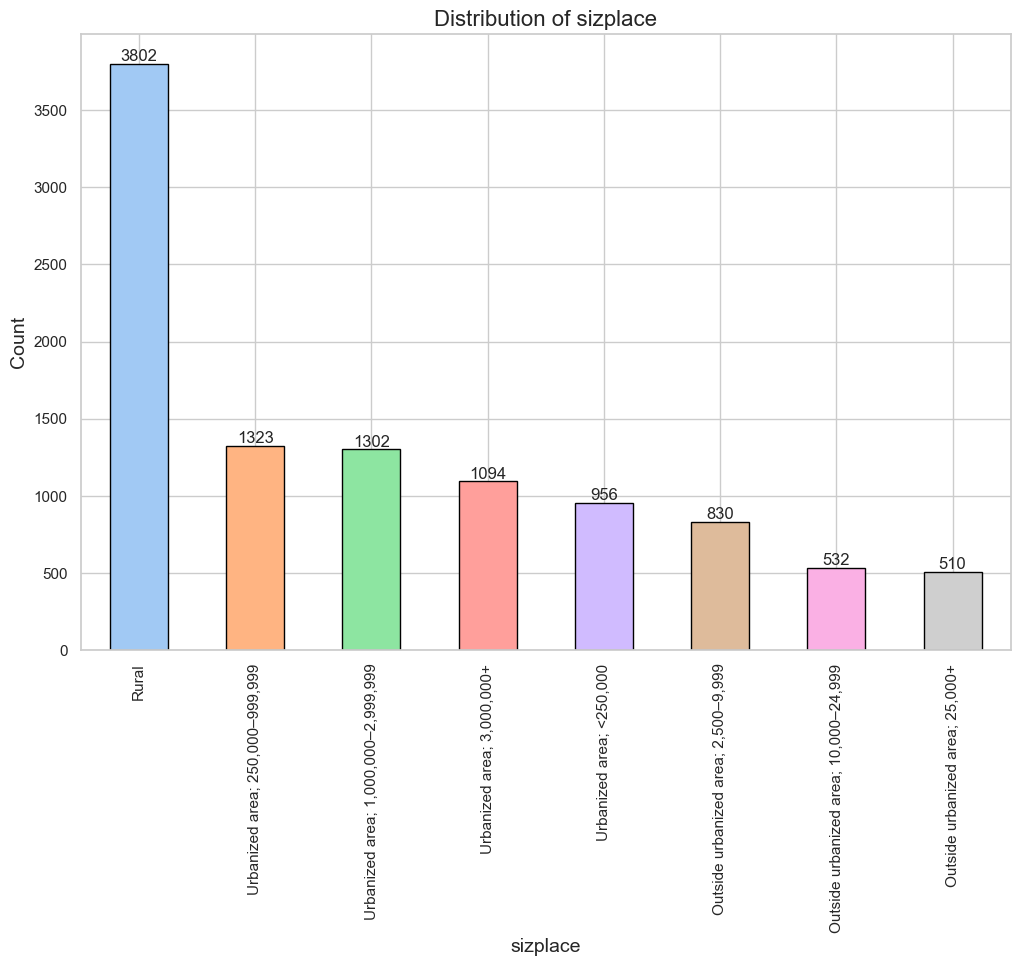

In [98]:
# Set a color palette for better visualization
sns.set_palette("pastel")

# Assuming 'obj_nhanes' is a DataFrame
for column in obj_nhanes:
    plt.figure(figsize=(12, 8))
    
    # Plot the bar chart
    obj_nhanes[column].value_counts().plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')

    # Add labels and title
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Add data labels on top of the bars
    for i, value in enumerate(obj_nhanes[column].value_counts()):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

    # Display the chart
    plt.show()


#### **exploratory analysis**

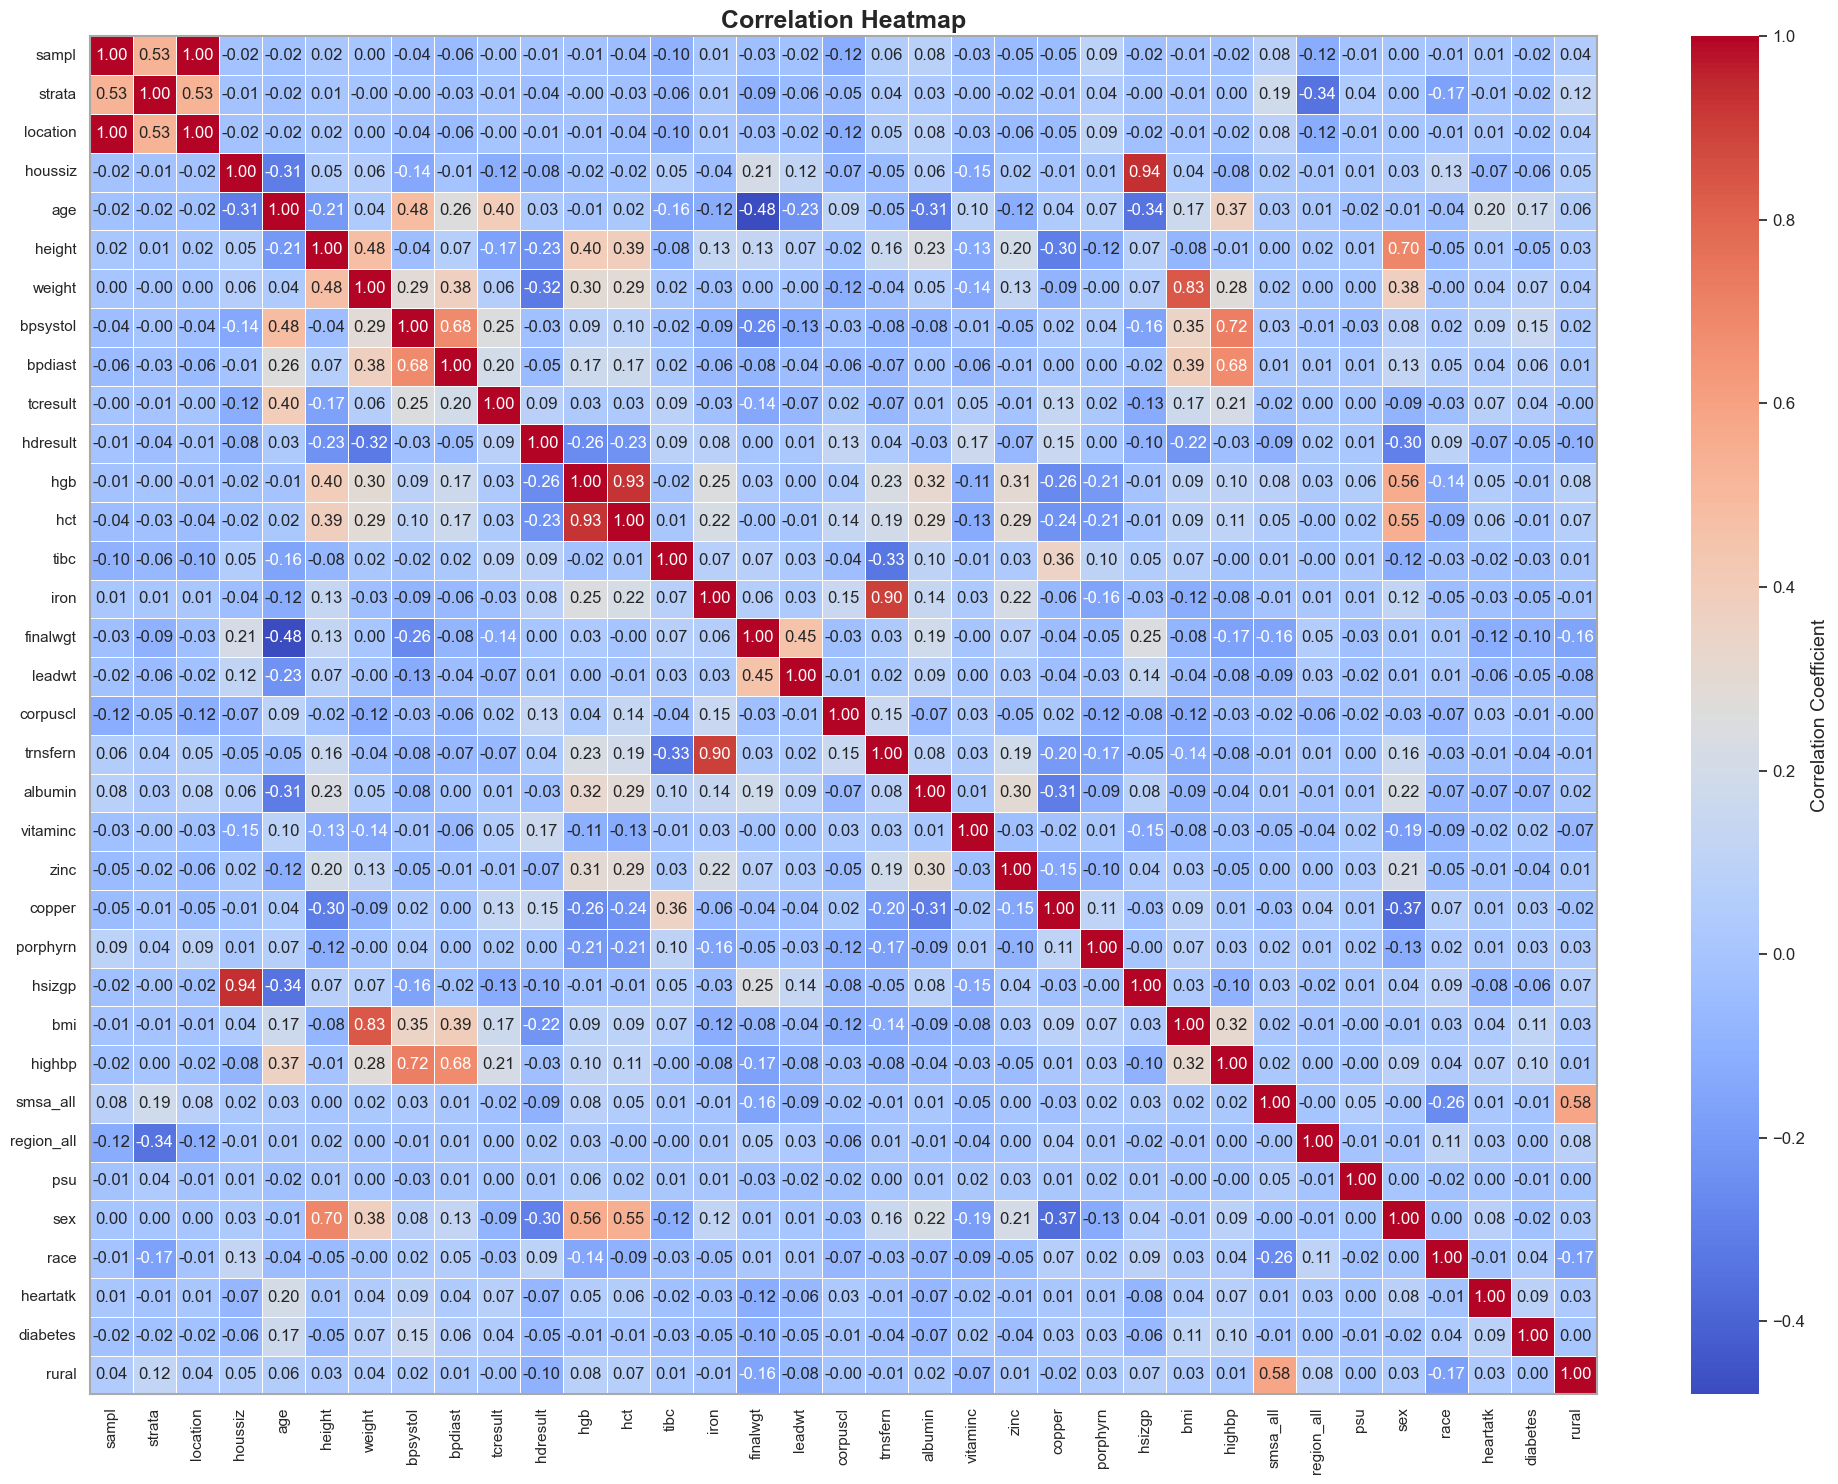

In [99]:


# Set a custom color palette
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create a heatmap with correlation values annotated
heatmap = sns.heatmap(
    num_nhanes.corr(),
    annot=True,
    cmap=custom_palette,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 12},
)

# Customize the aesthetics
heatmap.set_title("Correlation Heatmap", fontsize=18, fontweight='bold')

# Rotate the y-axis ticks for better readability
plt.yticks(rotation=0)

# Add color bar with labeled values
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Coefficient', fontsize=14)

# Add a shadow to the annotation for better contrast
for _, spine in heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_edgecolor("darkgray")

# Adjust layout for better spacing
plt.tight_layout()

# Show the heatmap
plt.show()


we draw heatmap to see corrlation

 red color refrance to postive relationship

 blue color refrance to negtaive relationship

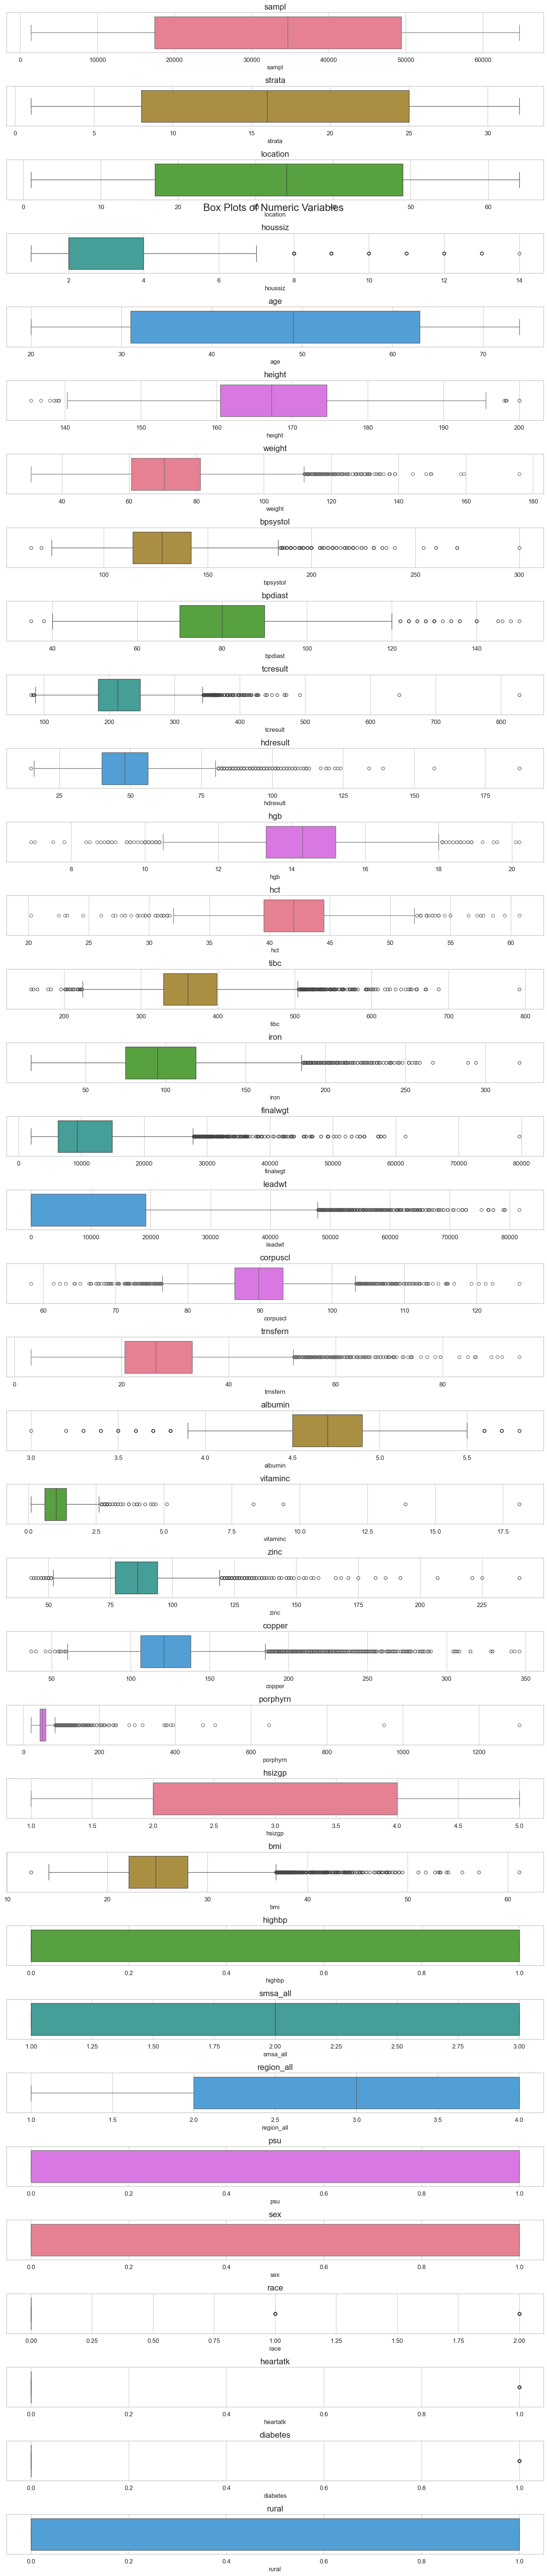

In [100]:
# Assuming num_nhanes is your DataFrame
# Make sure to replace it with your actual DataFrame

# Your plotting code with additional styling
fig, axes = plt.subplots(nrows=len(num_nhanes.columns), figsize=(15, 70), sharex=False)

# Use a professional Seaborn style
sns.set(style="whitegrid")

# Define a color palette for the box plots
custom_palette = sns.color_palette("husl")

for i, column in enumerate(num_nhanes.columns):
    sns.boxplot(x=num_nhanes[column], ax=axes[i], color=custom_palette[i % len(custom_palette)])
    axes[i].set_title(column, fontsize=16)
    axes[i].tick_params(labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.suptitle("Box Plots of Numeric Variables", y=0.92, fontsize=20)
plt.show()

draw the boxplot to show outliers for all data

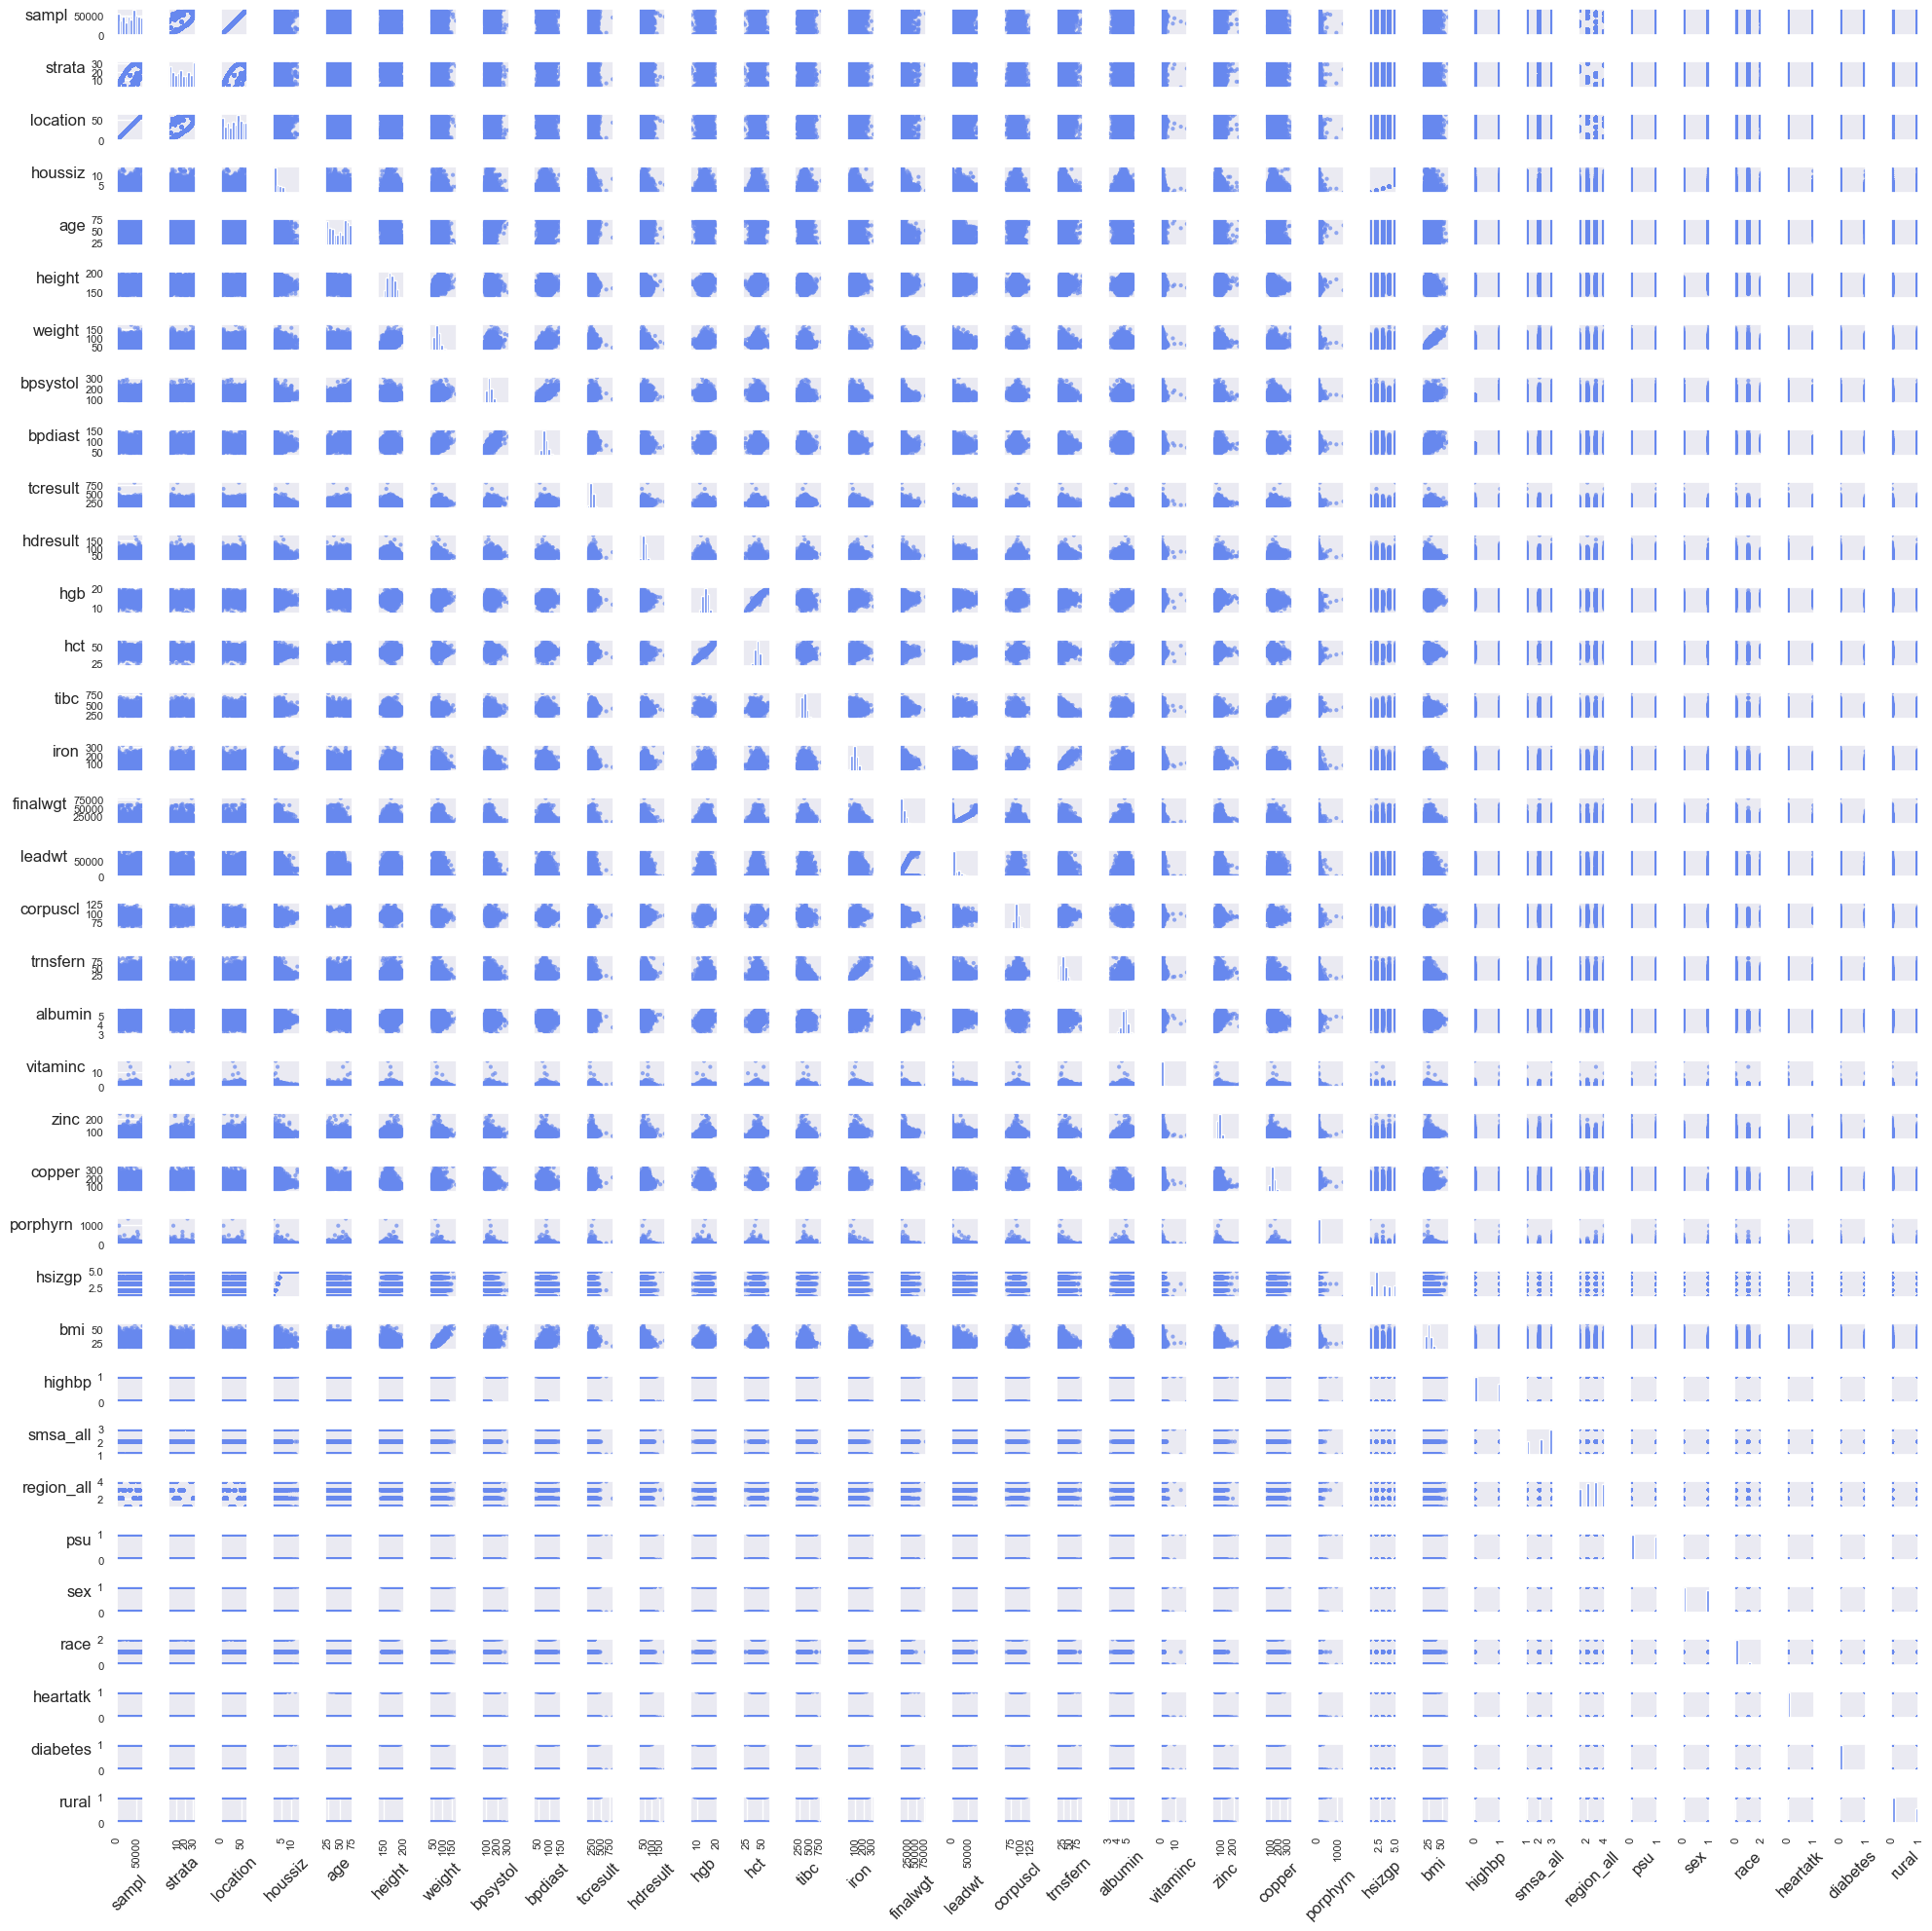

In [101]:
# Set Seaborn theme and color palette
sns.set_theme()
sns.set_palette("coolwarm")  # You can choose a different palette, for example, "coolwarm"

# Create a scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(nhanes, figsize=(20, 20), diagonal="hist", alpha=0.7)

# Customize scatter matrix with Seaborn style
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

draw scatter matriex show relation between each two variables

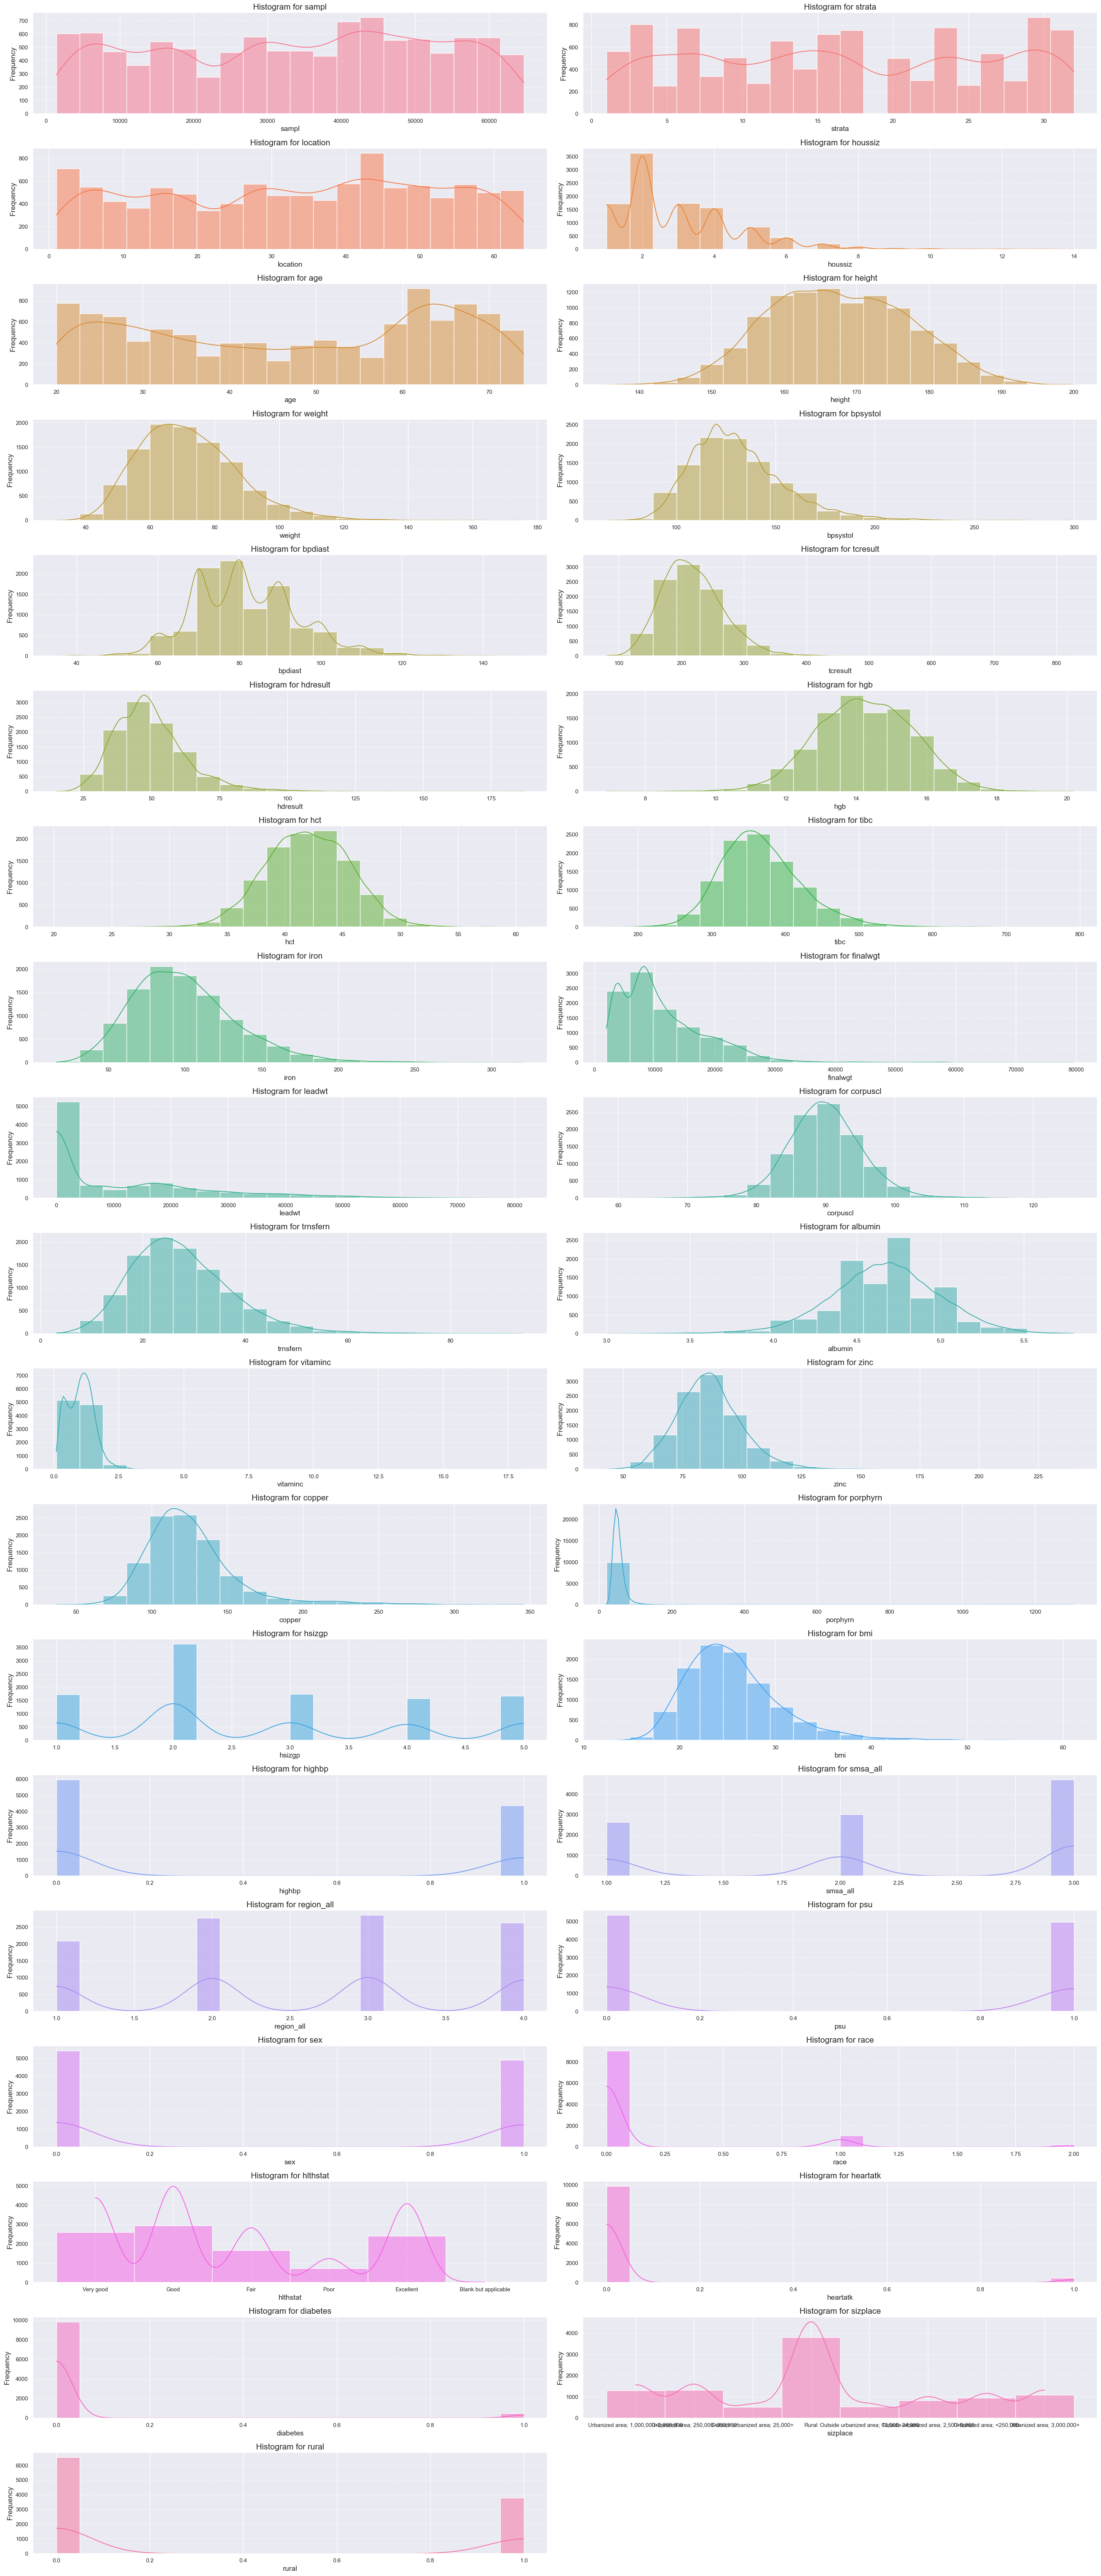

In [102]:
# Set a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(nhanes.columns))

# Set up subplots
fig, axes = plt.subplots(nrows=len(nhanes.columns) // 2 + 1, ncols=2, figsize=(30, 70), sharex=False)

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Iterate through each column and create a histogram
for i, column in enumerate(nhanes.columns):
    sns.histplot(nhanes[column], bins=20, ax=axes[i], color=custom_palette[i], kde=True)
    axes[i].set_title(f'Histogram for {column}', fontsize=16)
    axes[i].set_xlabel(column, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if there are an odd number of columns
if len(nhanes.columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()


histogram for each variable to see distribution

**for all data the alpha =0.05**

## **bmi model**

In [103]:
bmi_model = smf.ols('bmi~height+weight',data=nhanes).fit()

In [104]:
print(bmi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.910e+05
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:10:05   Log-Likelihood:                -8714.2
No. Observations:               10349   AIC:                         1.743e+04
Df Residuals:                   10346   BIC:                         1.746e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.0569      0.099    527.556      0.0

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


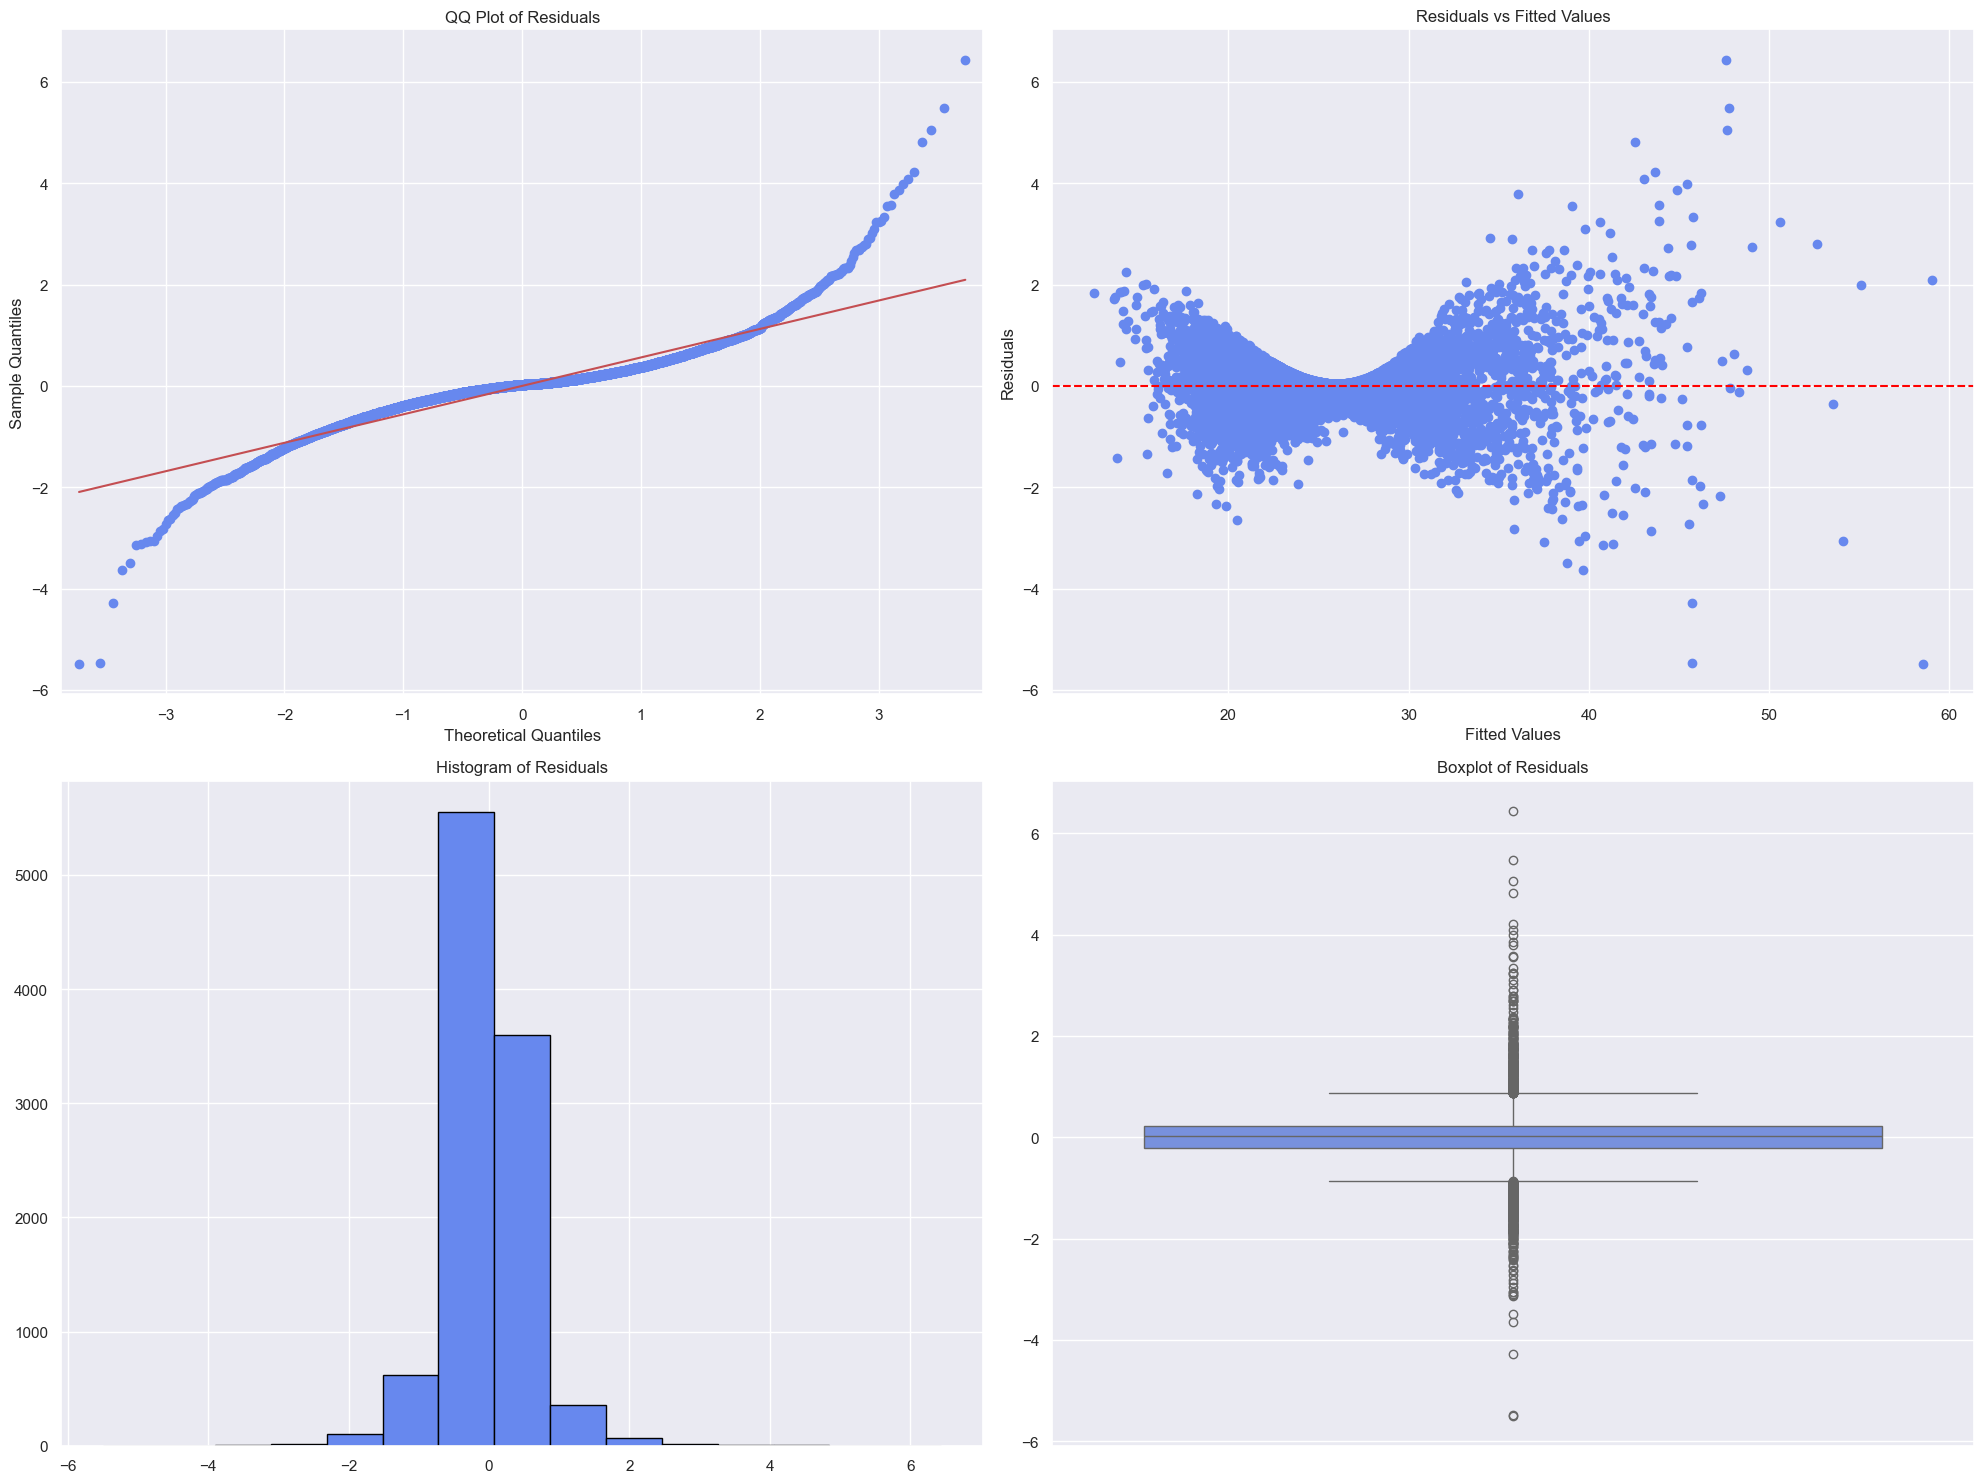

In [105]:
residuals = bmi_model.resid
fitted = bmi_model.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [106]:
influence = oi.OLSInfluence(bmi_model).summary_frame()
influence

dfb_Intercept  dfb_height  dfb_weight       cooks_d  standard_resid  \
0          -0.008283    0.010682   -0.010098  7.748955e-05        0.943259   
1          -0.023915    0.016863    0.014474  4.102288e-04       -1.730113   
2           0.000009   -0.000006   -0.000003  2.110994e-10        0.002380   
3           0.008334   -0.011456    0.016078  1.148557e-04        0.835849   
4           0.001095   -0.001108    0.000772  1.495494e-06        0.181468   
...              ...         ...         ...           ...             ...   
10344      -0.000036    0.000221   -0.000596  2.212620e-07        0.056057   
10345       0.028452   -0.040529    0.058516  1.334231e-03        1.966865   
10346       0.004839   -0.007037    0.010903  5.120372e-05        0.560555   
10347      -0.000386    0.001090   -0.002407  3.033011e-06        0.184780   
10348      -0.008434    0.011523   -0.012597  9.834520e-05        1.001989   

       hat_diag  dffits_internal  student_resid    dffits  
0      0.000261         0.015247       0.943254  0.015247  
1      0.000411        -0.035081      -1.730280 -0.035085  
2      0.000112         0.000025       0.002380  0.000025  
3      0.000493         0.018563       0.835836  0.018562  
4      0.000136         0.002118       0.181460  0.002118  
...         ...              ...            ...       ...  
10344  0.000211         0.000815       0.056055  0.000815  
10345  0.001034         0.063267       1.967138  0.063276  
10346  0.000489         0.012394       0.560536  0.012394  
10347  0.000266         0.003016       0.184771  0.003016  
10348  0.000294         0.017177       1.001990  0.017177  

[10349 rows x 9 columns]

**we chcek outliers**

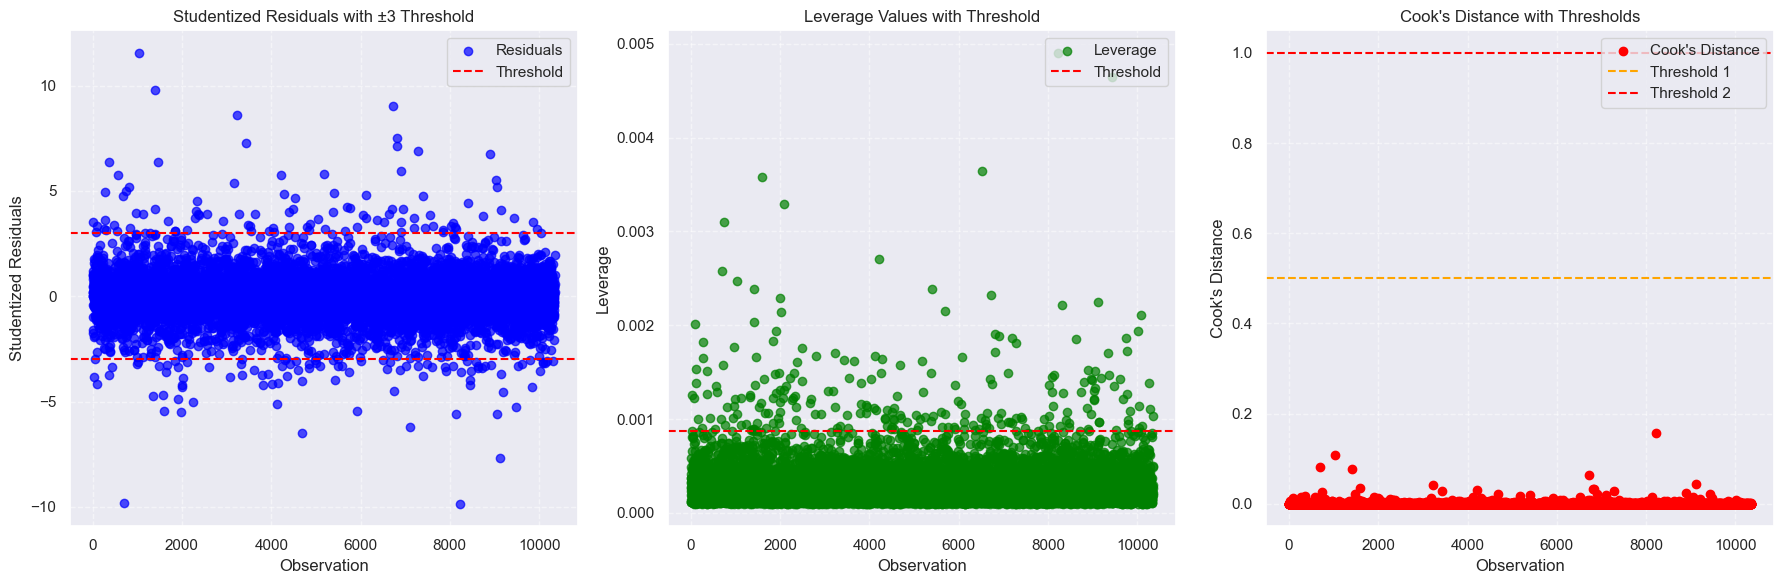

In [107]:
# Assuming 'bmi_model' is your regression model and 'influence' is the influence object

k = len(bmi_model.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence["student_resid"], color='blue', alpha=0.7, label='Residuals')
axs[0].axhline(y=3, color='red', linestyle='--', label='Threshold')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')
axs[0].legend(loc='upper right')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Leverage Plot
axs[1].scatter(range(n), influence["hat_diag"], color='green', alpha=0.7, label='Leverage')
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--', label='Threshold')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')
axs[1].legend(loc='upper right')
axs[1].grid(True, linestyle='--', alpha=0.5)

# Cook's Distance Plot
axs[2].scatter(range(n), influence["cooks_d"], marker='o', color='red', label="Cook's Distance")
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--', label='Threshold 1')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--', label='Threshold 2')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")
axs[2].legend(loc='upper right')
axs[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (H1): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [108]:

bmi_hetro = ssd.het_breuschpagan(bmi_model.resid,bmi_model.model.exog)
bmi_hetro_test_statistic, bmi_hetro_p_value = bmi_hetro[:2]
bmi_hetro_test_statistic, bmi_hetro_p_value


(967.1836517532499, 9.522226953350605e-211)

### **transformation**

**transformation for y(dependant variable) and x(independant variable) beecase the four assumptions (normality, leniarty, equal variance, dependency)** 

In [109]:
bmi_model_t = smf.ols('np.log(bmi)~np.log(height)+np.log(weight)',data=nhanes).fit()
bmi_model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(bmi)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.997e+17
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:10:38   Log-Likelihood:             1.6692e+05
No. Observations:               10349   AIC:                        -3.338e+05
Df Residuals:                   10346   BIC:                        -3.338e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.2103   2.19e-08   4.21e+08      0.000       9.210       9.210
np.log(height)    -2.0000    4.7e-09  -4.25e+08      0.000      -2.000      -2.000
np.log(weight)     1.0000   1.29e-09   7.73e+08      0.000       1.000       1.000
==============================================================================
Omnibus:                     1915.638   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.592
Skew:                          -0.008   Prob(JB):                     4.61e-87
Kurtosis:                       2.040   Cond. No.                         640.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


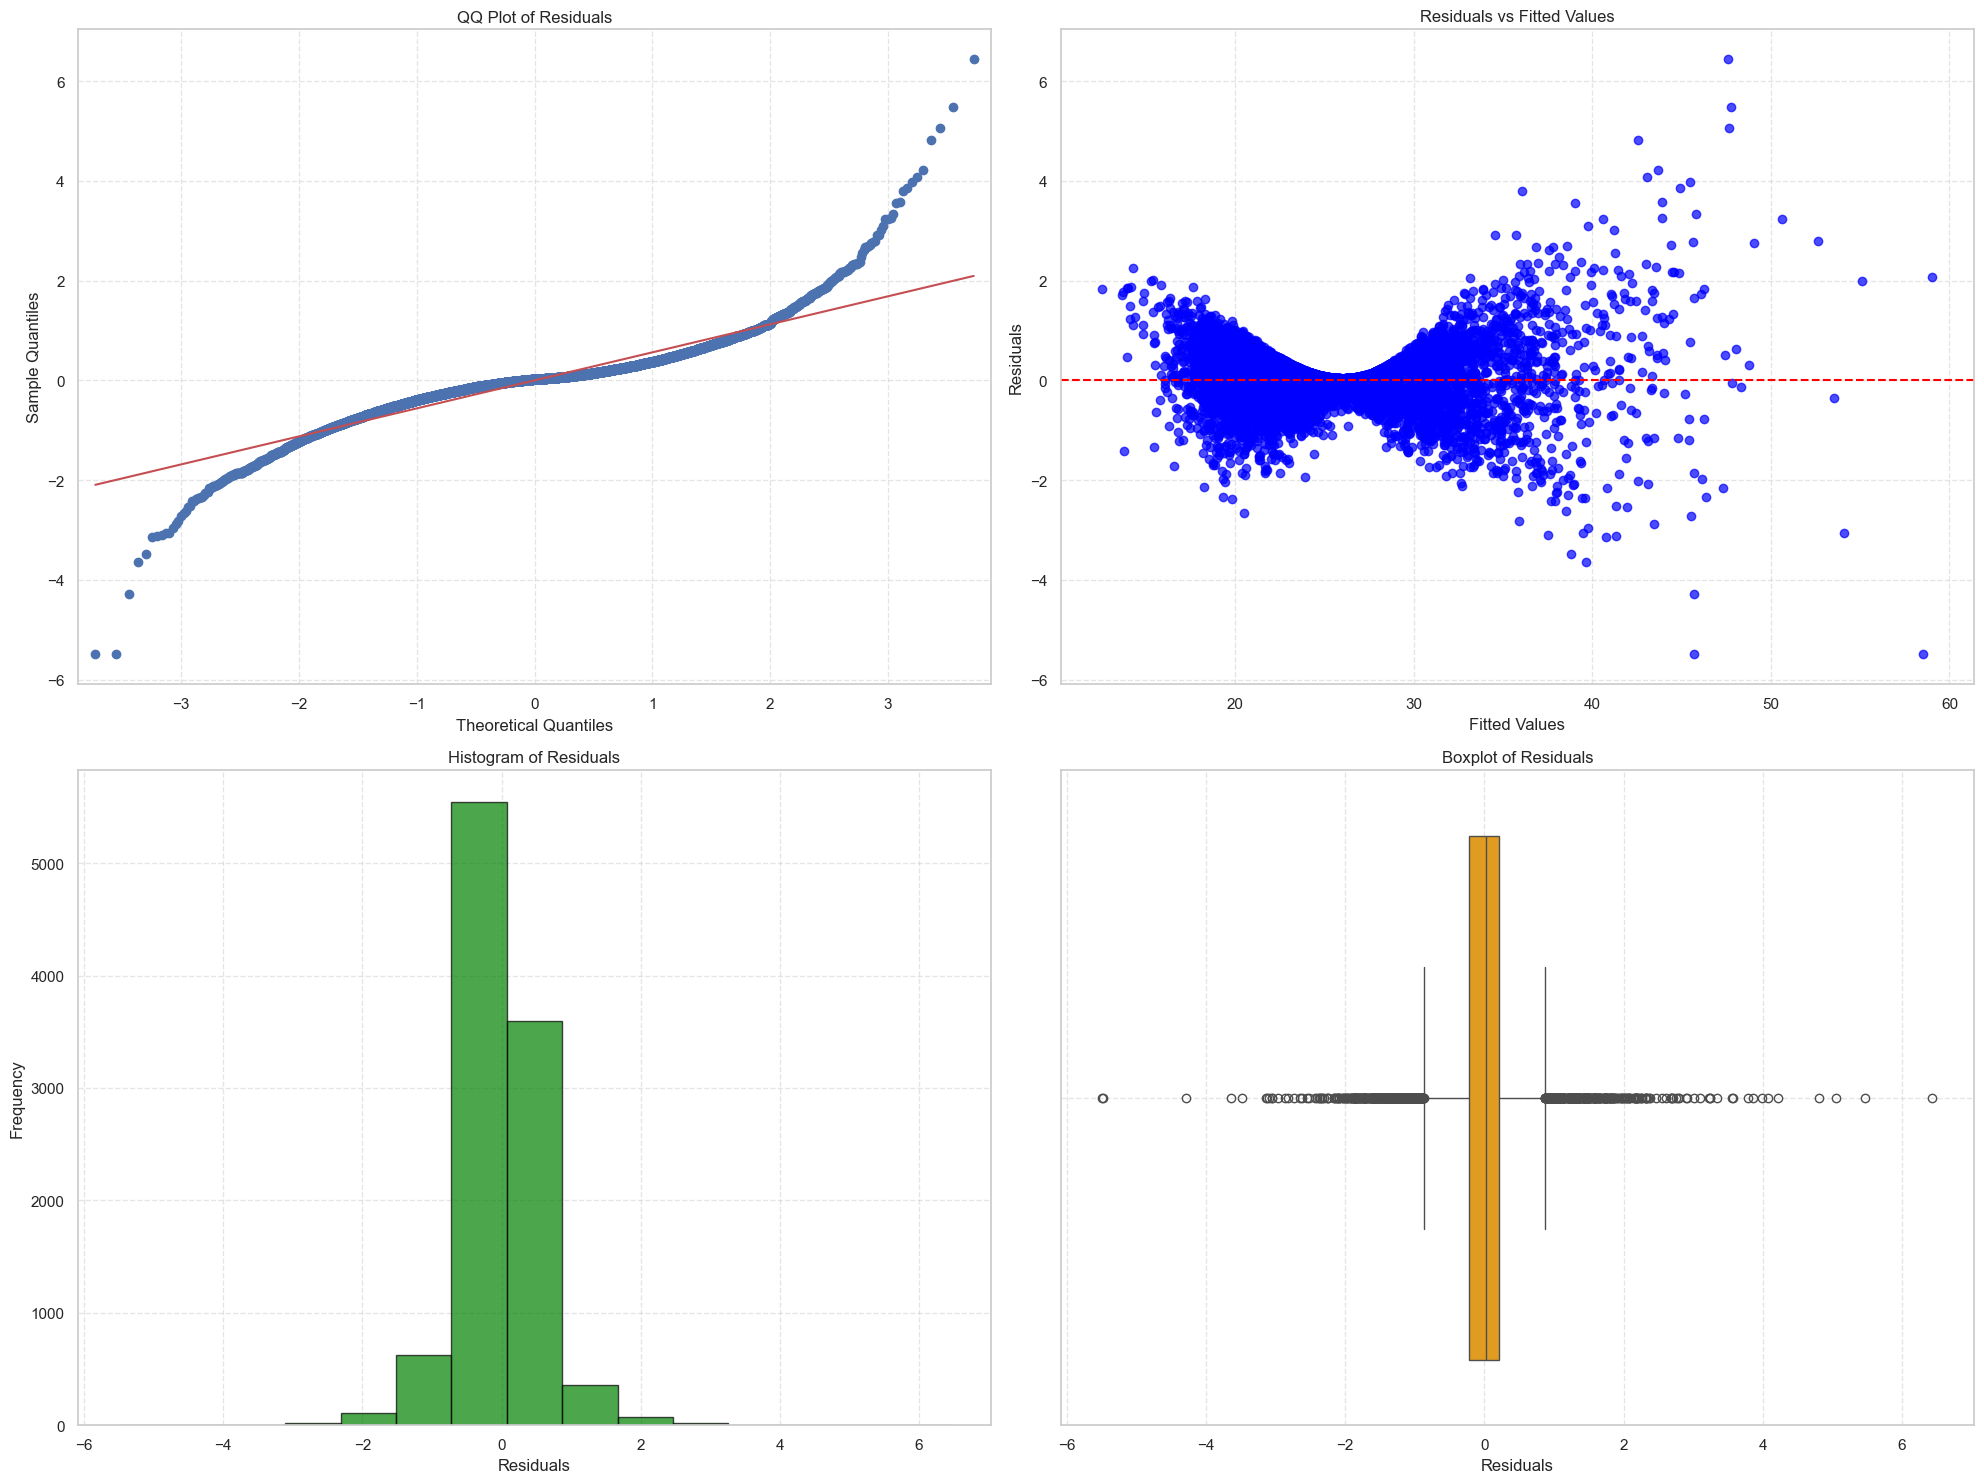

In [110]:


# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axs[0, 0])
axs[0, 0].set_title('QQ Plot of Residuals')
axs[0, 0].grid(True, linestyle='--', alpha=0.5)

# Residuals vs Fitted Values
axs[0, 1].scatter(fitted, residuals, alpha=0.7, color='blue')
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_xlabel('Fitted Values')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].set_title('Residuals vs Fitted Values')
axs[0, 1].grid(True, linestyle='--', alpha=0.5)

# Histogram of Residuals
axs[1, 0].hist(residuals, bins=15, edgecolor='black', color='green', alpha=0.7)
axs[1, 0].set_title('Histogram of Residuals')
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True, linestyle='--', alpha=0.5)

# Boxplot of Residuals
sns.boxplot(x=residuals, ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Boxplot of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [111]:
influence_1 = oi.OLSInfluence(bmi_model_t).summary_frame()
influence_1

dfb_Intercept  dfb_np.log(height)  dfb_np.log(weight)       cooks_d  \
0           0.002652           -0.003082            0.002825  6.226806e-06   
1          -0.010212            0.007198            0.008747  1.064247e-04   
2          -0.001732            0.001459            0.000269  1.068729e-05   
3          -0.022847            0.029996           -0.041371  7.660943e-04   
4          -0.004691            0.005173           -0.004326  3.035029e-05   
...              ...                 ...                 ...           ...   
10344       0.002446           -0.005091            0.012103  8.544582e-05   
10345      -0.010889            0.014319           -0.019689  1.555758e-04   
10346      -0.015048            0.020696           -0.031458  4.322525e-04   
10347      -0.004760            0.008281           -0.016836  1.379631e-04   
10348      -0.000339            0.000412           -0.000445  1.215124e-07   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0           -0.268326  0.000259        -0.004322      -0.268314 -0.004322  
1           -0.825596  0.000468        -0.017868      -0.825583 -0.017868  
2           -0.544204  0.000108        -0.005662      -0.544185 -0.005662  
3           -2.202312  0.000474        -0.047940      -2.202722 -0.047949  
4           -0.789178  0.000146        -0.009542      -0.789163 -0.009542  
...               ...       ...              ...            ...       ...  
10344       -1.060958  0.000228        -0.016011      -1.060965 -0.016011  
10345       -0.730888  0.000873        -0.021604      -0.730872 -0.021603  
10346       -1.680699  0.000459        -0.036011      -1.680847 -0.036014  
10347        1.161470  0.000307         0.020344       1.161489  0.020345  
10348        0.034616  0.000304         0.000604       0.034615  0.000604  

[10349 rows x 9 columns]

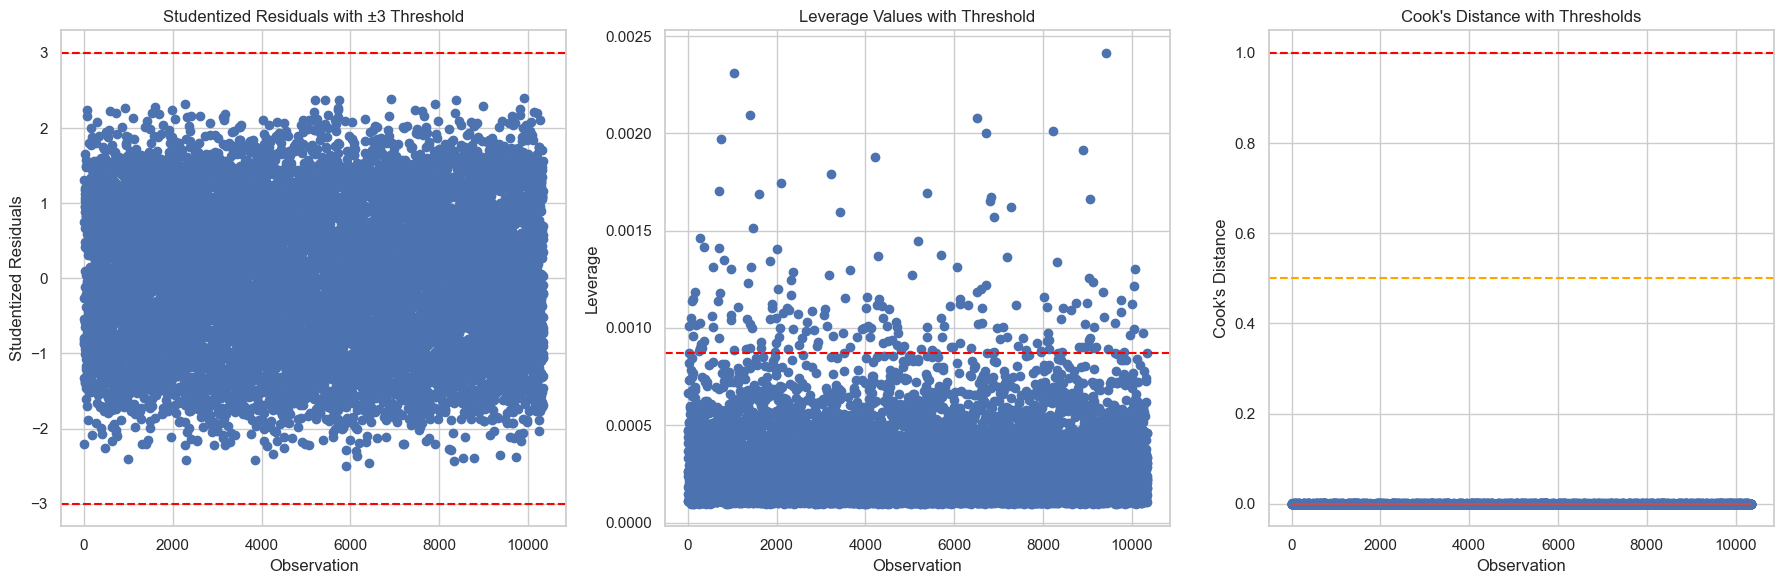

In [112]:
k = len(bmi_model_t.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_1["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_1["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_1["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (H1): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [113]:
bmi_hetro_t = ssd.het_breuschpagan(bmi_model_t.resid,bmi_model_t.model.exog)

In [114]:
bmi_hetro_t_test_statistic, bmi_hetro_p_value = bmi_hetro_t[:2]
bmi_hetro_t_test_statistic, bmi_hetro_p_value

(101.8565950128779, 7.622921021692244e-23)

## **Weight least squaren bmi model**

In [115]:
waight =1/(bmi_model.resid**2)


In [116]:
bmi_model_weight = smf.wls('bmi~height+weight',data=nhanes,weights=waight).fit()

In [117]:
bmi_model_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.367e+09
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:11:11   Log-Likelihood:                 3198.0
No. Observations:               10349   AIC:                            -6390.
Df Residuals:                   10346   BIC:                            -6368.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.0555      0.001   5.07e+04      0.000      52.054      52.058
height        -0.3129   7.35e-06  -4.26e+04      0.000      -0.313      -0.313
weight         0.3608   5.24e-06   6.88e+04      0.000       0.361       0.361
==============================================================================
Omnibus:                    36139.684   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1722.848
Skew:                          -0.154   Prob(JB):                         0.00
Kurtosis:                       1.025   Cond. No.                     5.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


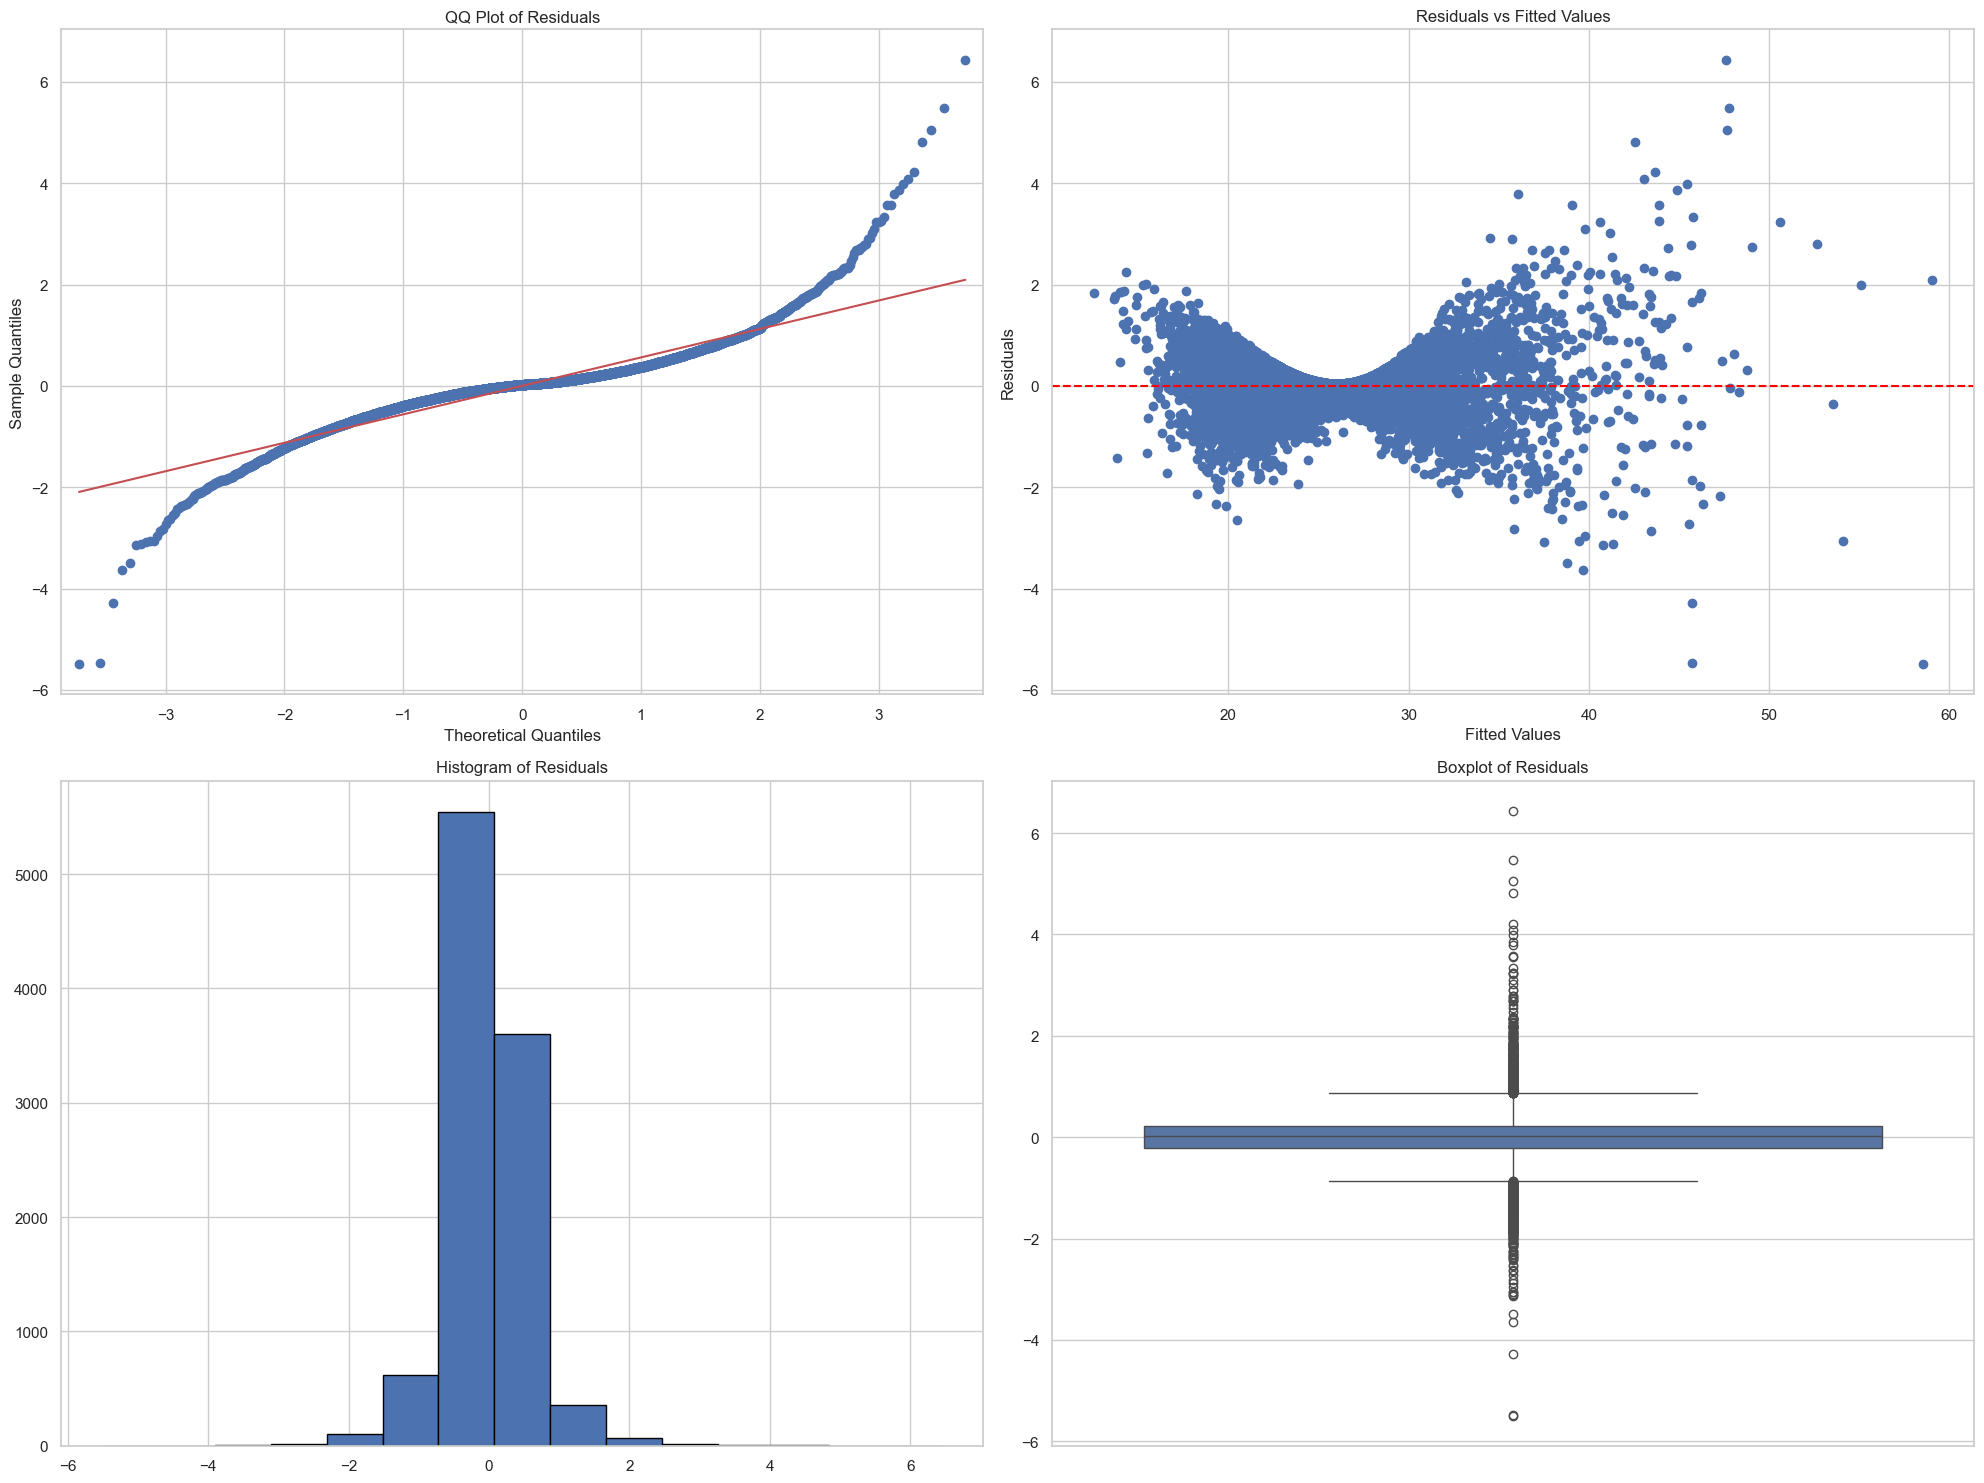

In [118]:
residuals = bmi_model_weight.resid
fitted = bmi_model_weight.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [119]:
influence_2 = oi.OLSInfluence(bmi_model_weight).summary_frame()
influence_2

dfb_Intercept  dfb_height  dfb_weight       cooks_d  standard_resid  \
0          -3.820567    3.180320    0.481855  1.788729e-09        0.529801   
1          -6.496168    4.154956    3.894840  2.974639e-09       -0.971579   
2          -2.401447    1.495159    1.883829  4.891402e-13        0.001336   
3          -0.976751   -0.310018    4.117442  3.376737e-09        0.469309   
4          -2.215613    1.321431    1.991508  8.021278e-11        0.101905   
...              ...         ...         ...           ...             ...   
10344      -2.409211    1.531018    1.801557  6.953998e-11        0.031534   
10345       2.465891   -4.893396   10.011843  1.840687e-08        1.104185   
10346      -1.574822    0.386636    3.398654  2.260447e-09        0.314675   
10347      -2.469097    1.668005    1.549988  3.350159e-10        0.103847   
10348      -3.846511    3.312785    0.134748  2.239412e-09        0.562804   

           hat_diag  dffits_internal  student_resid    dffits  
0      1.911793e-08         0.000073       0.943060  0.000130  
1      9.453641e-09        -0.000094      -1.729614 -0.000168  
2      8.222567e-07         0.000001       0.002378  0.000002  
3      4.599395e-08         0.000101       0.835376  0.000179  
4      2.317248e-08         0.000016       0.181387  0.000028  
...             ...              ...            ...       ...  
10344  2.097983e-07         0.000014       0.056129  0.000026  
10345  4.529162e-08         0.000235       1.965763  0.000418  
10346  6.848412e-08         0.000082       0.560116  0.000147  
10347  9.319701e-08         0.000032       0.184842  0.000056  
10348  2.121004e-08         0.000082       1.001812  0.000146  

[10349 rows x 9 columns]

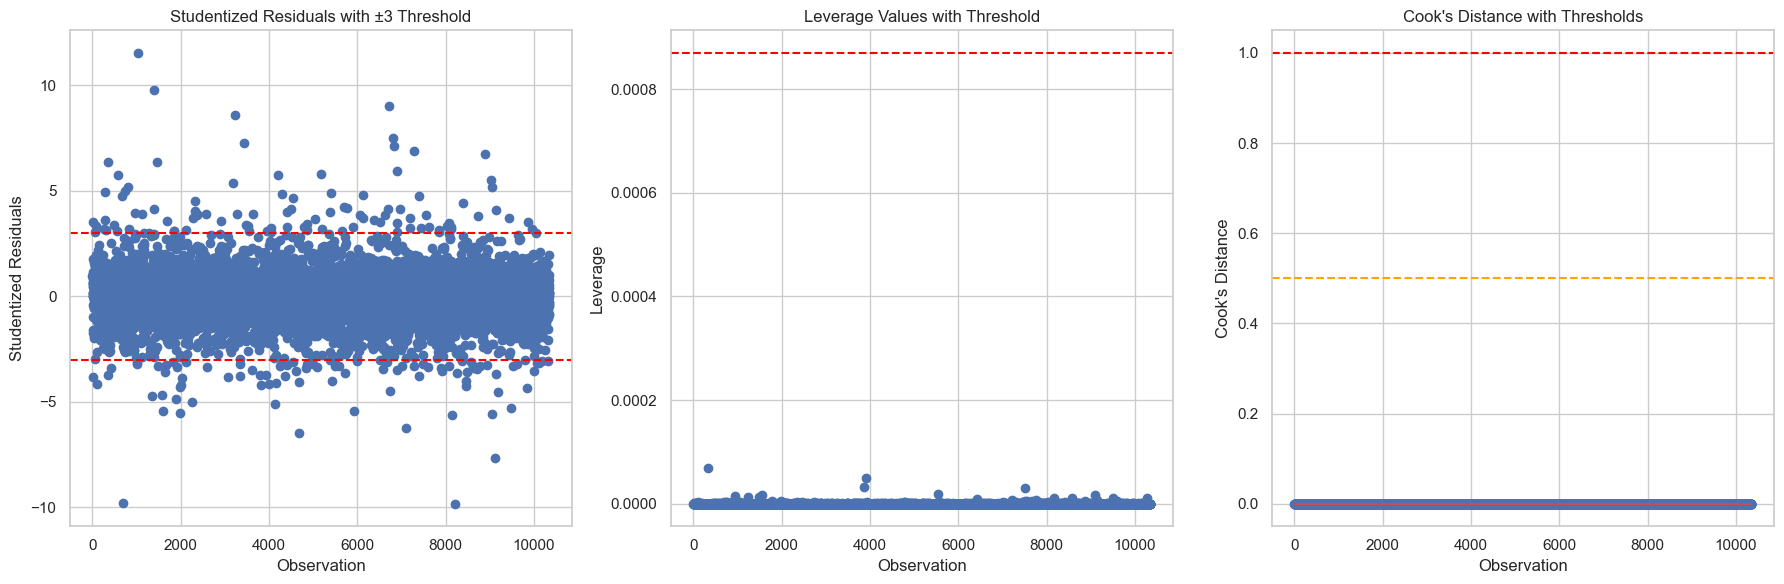

In [120]:
k = len(bmi_model_weight.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_2["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_2["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_2["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [121]:
bmi_hetro_weight = ssd.het_breuschpagan(bmi_model_weight.resid,bmi_model_weight.model.exog)
bmi_hetro_weight_test_statistic, bmi_hetro_weight_p_value = bmi_hetro_weight[:2]
bmi_hetro_weight_test_statistic, bmi_hetro_weight_p_value

(967.5655281012215, 7.867108374853343e-211)

### **transformation**

**transformation for y(dependant variable) and x(independant variable) beecase the four assumptions (normality, leniarty, equal variance, dependency)** 

In [122]:
bmi_model_weight_t = smf.wls('np.log(bmi)~np.log(height)+np.log(weight)',data=nhanes,weights=waight).fit()

In [123]:
bmi_model_weight_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(bmi)   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.386e+17
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:11:47   Log-Likelihood:             1.3142e+05
No. Observations:               10349   AIC:                        -2.628e+05
Df Residuals:                   10346   BIC:                        -2.628e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.2103   2.18e-08   4.22e+08      0.000       9.210       9.210
np.log(height)    -2.0000   4.88e-09   -4.1e+08      0.000      -2.000      -2.000
np.log(weight)     1.0000   1.45e-09   6.91e+08      0.000       1.000       1.000
==============================================================================
Omnibus:                    14525.745   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        701920793.966
Skew:                           6.556   Prob(JB):                         0.00
Kurtosis:                    1278.785   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


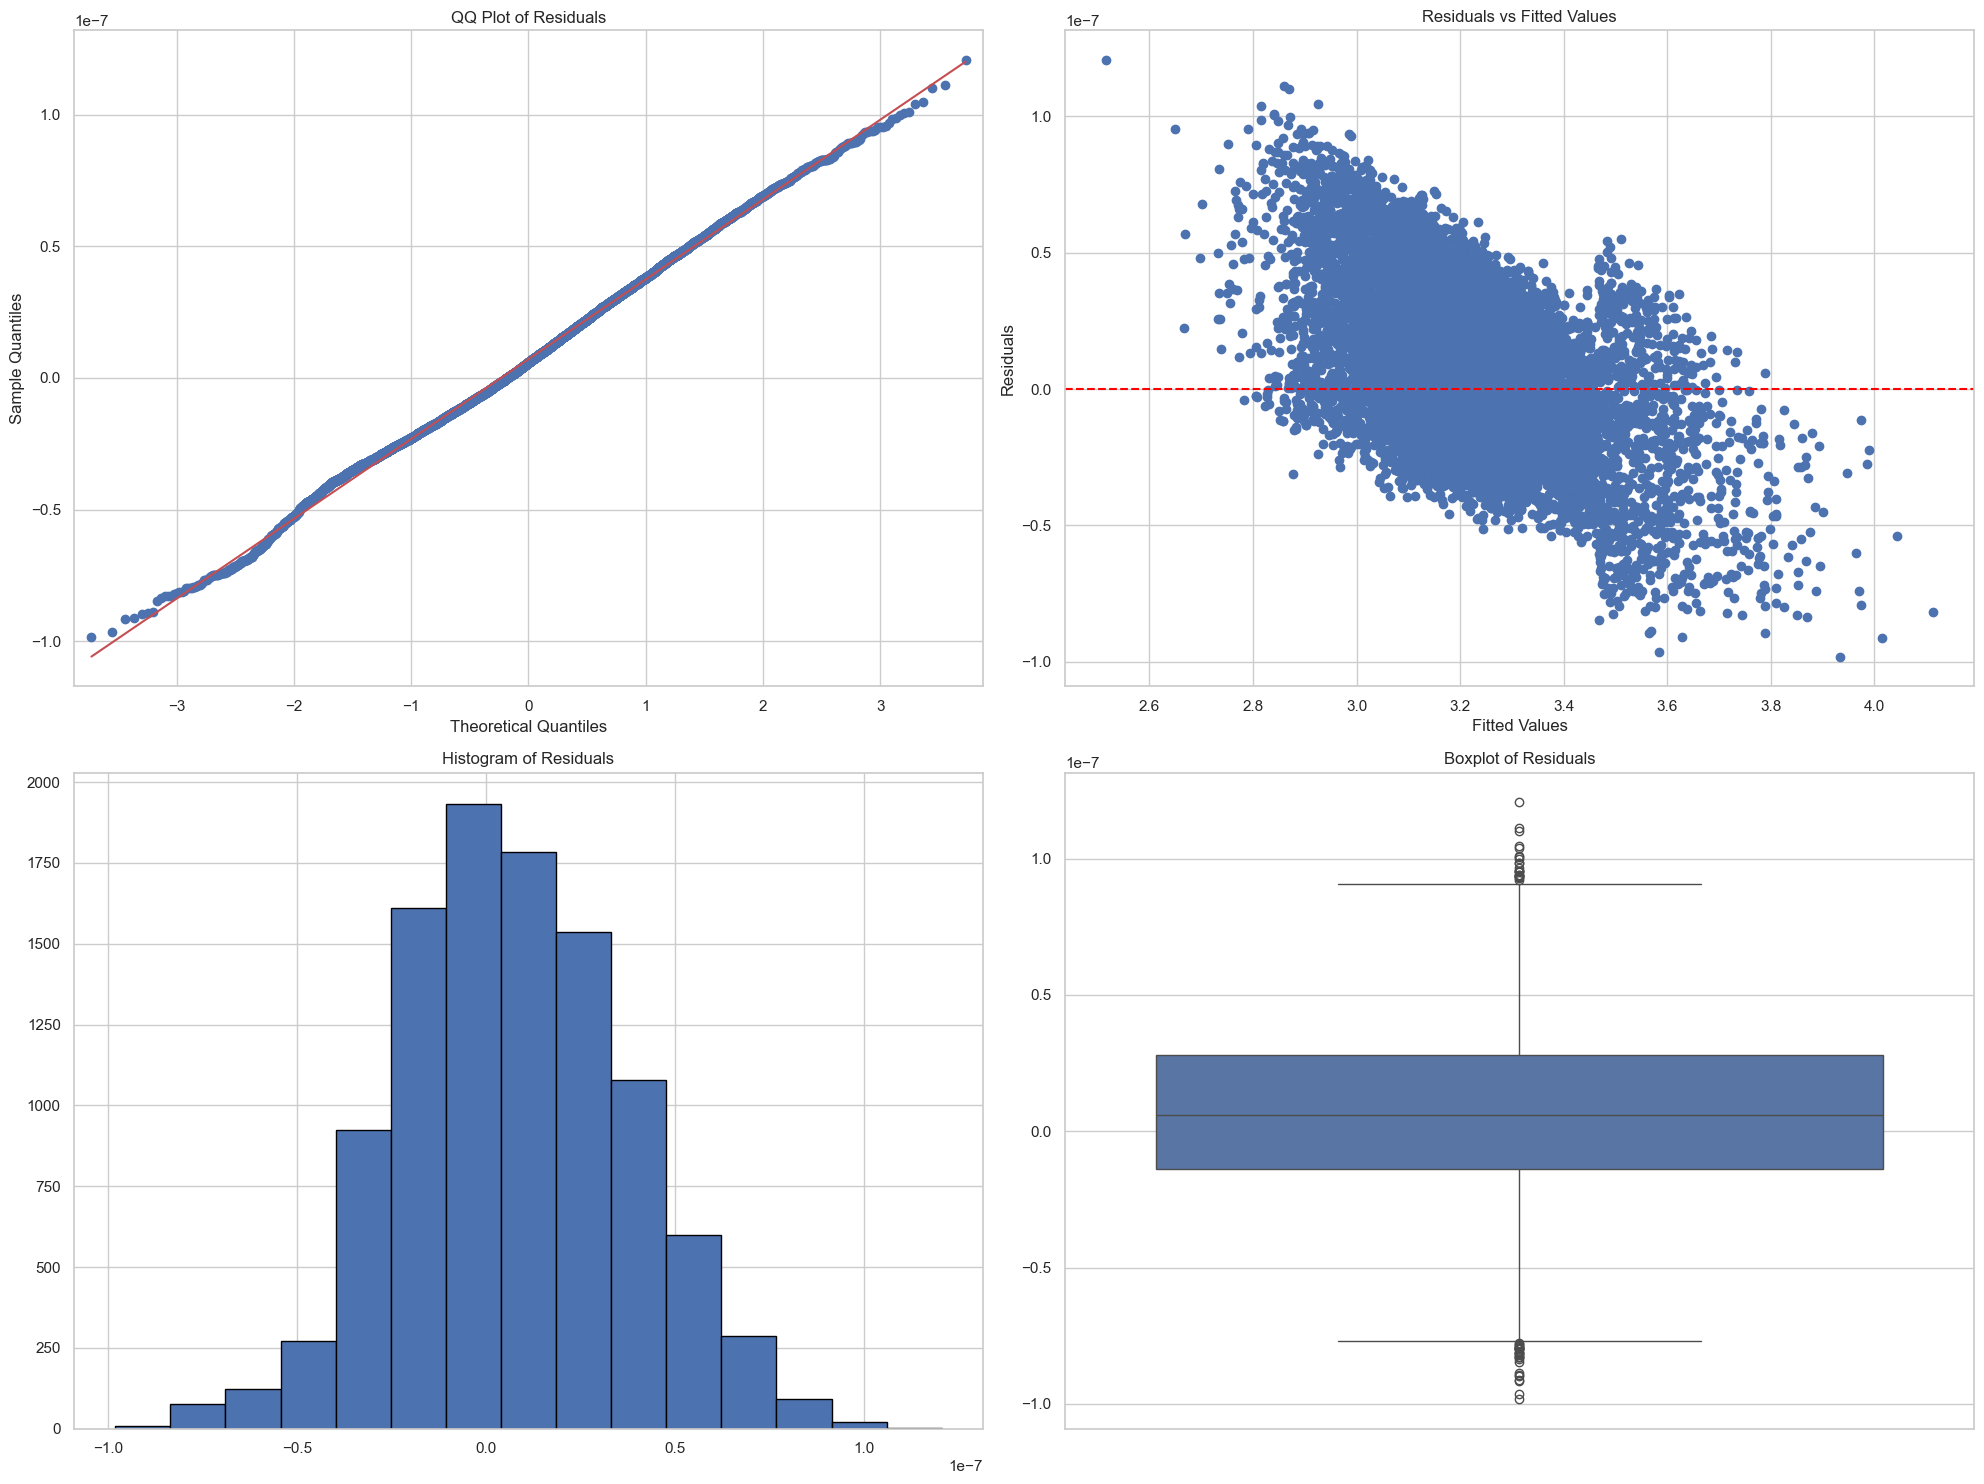

In [124]:
residuals = bmi_model_weight_t.resid
fitted = bmi_model_weight_t.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [125]:
influence_3 = oi.OLSInfluence(bmi_model_weight_t).summary_frame()
influence_3

dfb_Intercept  dfb_np.log(height)  dfb_np.log(weight)       cooks_d  \
0       -1407.645095        -1608.169557        11310.367961  6.257807e-14   
1       -1409.929118        -1606.493633        11311.621433  7.011945e-14   
2       -1408.424602        -1607.425725        11310.093143  9.904573e-14   
3       -1412.415500        -1602.995810        11306.112146  3.530862e-12   
4       -1408.962658        -1606.828458        11309.557705  1.402281e-13   
...              ...                 ...                 ...           ...   
10344   -1407.752681        -1608.588153        11312.385671  2.359904e-14   
10345   -1410.037000        -1605.288323        11307.121688  1.488670e-12   
10346   -1410.918013        -1604.397408        11306.544982  3.654452e-12   
10347   -1409.024000        -1606.363851        11308.010429  7.061954e-12   
10348   -1408.161659        -1607.578389        11309.820971  2.510902e-13   

       standard_resid      hat_diag  dffits_internal  student_resid    dffits  
0            0.003316  1.707160e-08     4.332831e-07       0.576415  0.000075  
1            0.004243  1.168623e-08     4.586484e-07       0.737490  0.000080  
2           -0.000609  8.003879e-07    -5.451029e-07      -0.105909 -0.000095  
3           -0.017937  3.292203e-08    -3.254626e-06      -3.118591 -0.000566  
4           -0.004336  2.237797e-08    -6.486018e-07      -0.753668 -0.000113  
...               ...           ...              ...            ...       ...  
10344        0.000569  2.186060e-07     2.660773e-07       0.098923  0.000046  
10345       -0.012496  2.860106e-08    -2.113294e-06      -2.172096 -0.000367  
10346       -0.015168  4.765318e-08    -3.311096e-06      -2.636841 -0.000576  
10347        0.014485  1.009801e-07     4.602810e-06       2.517865  0.000800  
10348        0.006188  1.967393e-08     8.679116e-07       1.075546  0.000151  

[10349 rows x 9 columns]

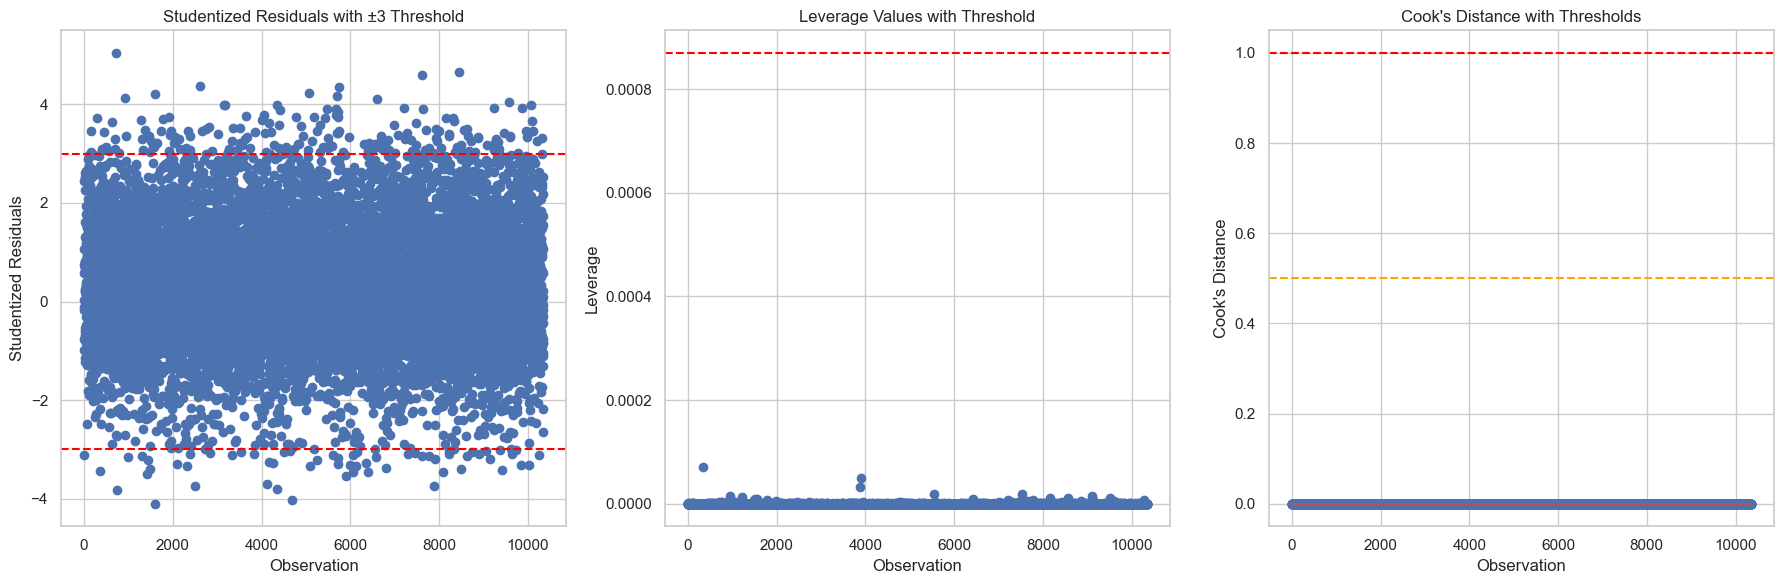

In [126]:
k = len(bmi_model_weight_t.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_3["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_3["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_3["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [127]:
bmi_hetro_weight_t = ssd.het_breuschpagan(bmi_model_weight_t.resid,bmi_model_weight_t.model.exog)
bmi_hetro_weight_t_test_statistic, bmi_hetro_weight_t_p_value = bmi_hetro_weight_t[:2]
bmi_hetro_weight_t_test_statistic, bmi_hetro_weight_t_p_value

(468.3283891062324, 2.012715755520839e-102)

## **logestic highbp model**

**The logestic moodel for categorical variables** 

highbp -> high blood pressure


In [128]:
#heart_model = smf.ols('(highbp)~bpdiast+bpsystol',data=nhanes).fit()
highbp_model = smf.logit('(highbp)~bpdiast+bpsystol',data=nhanes).fit()

Optimization terminated successfully.
         Current function value: 0.165689
         Iterations 10


In [129]:
print(highbp_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 highbp   No. Observations:                10349
Model:                          Logit   Df Residuals:                    10346
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.7568
Time:                        19:12:23   Log-Likelihood:                -1714.7
converged:                       True   LL-Null:                       -7049.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -49.6261      1.249    -39.741      0.000     -52.074     -47.179
bpdiast        0.2504      0.008     32.661      0.000       0.235       0.265
bpsystol       0.2176      0.006     36.483      0.0

H0: The model is a good-fitting model.

H1: The model is not a good-fitting model

in this model we reject H0


## **bpsystol_model**

In [130]:
bpsystol_model = smf.ols('(bpsystol)~age+vitaminc+zinc',data=nhanes).fit()

In [131]:
bpsystol_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bpsystol   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     1058.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:12:23   Log-Likelihood:                -45896.
No. Observations:               10349   AIC:                         9.180e+04
Df Residuals:                   10345   BIC:                         9.183e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.9046      1.489     68.439      0.000      98.986     104.823
age            0.6598      0.012     55.977      0.000       0.637       0.683
vitaminc      -2.4051      0.353     -6.816      0.000      -3.097      -1.713
zinc           0.0009      0.015      0.059      0.953      -0.028       0.029
==============================================================================
Omnibus:                     1508.834   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3274.172
Skew:                           0.871   Prob(JB):                         0.00
Kurtosis:                       5.136   Cond. No.                         741.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0 and accept zinc


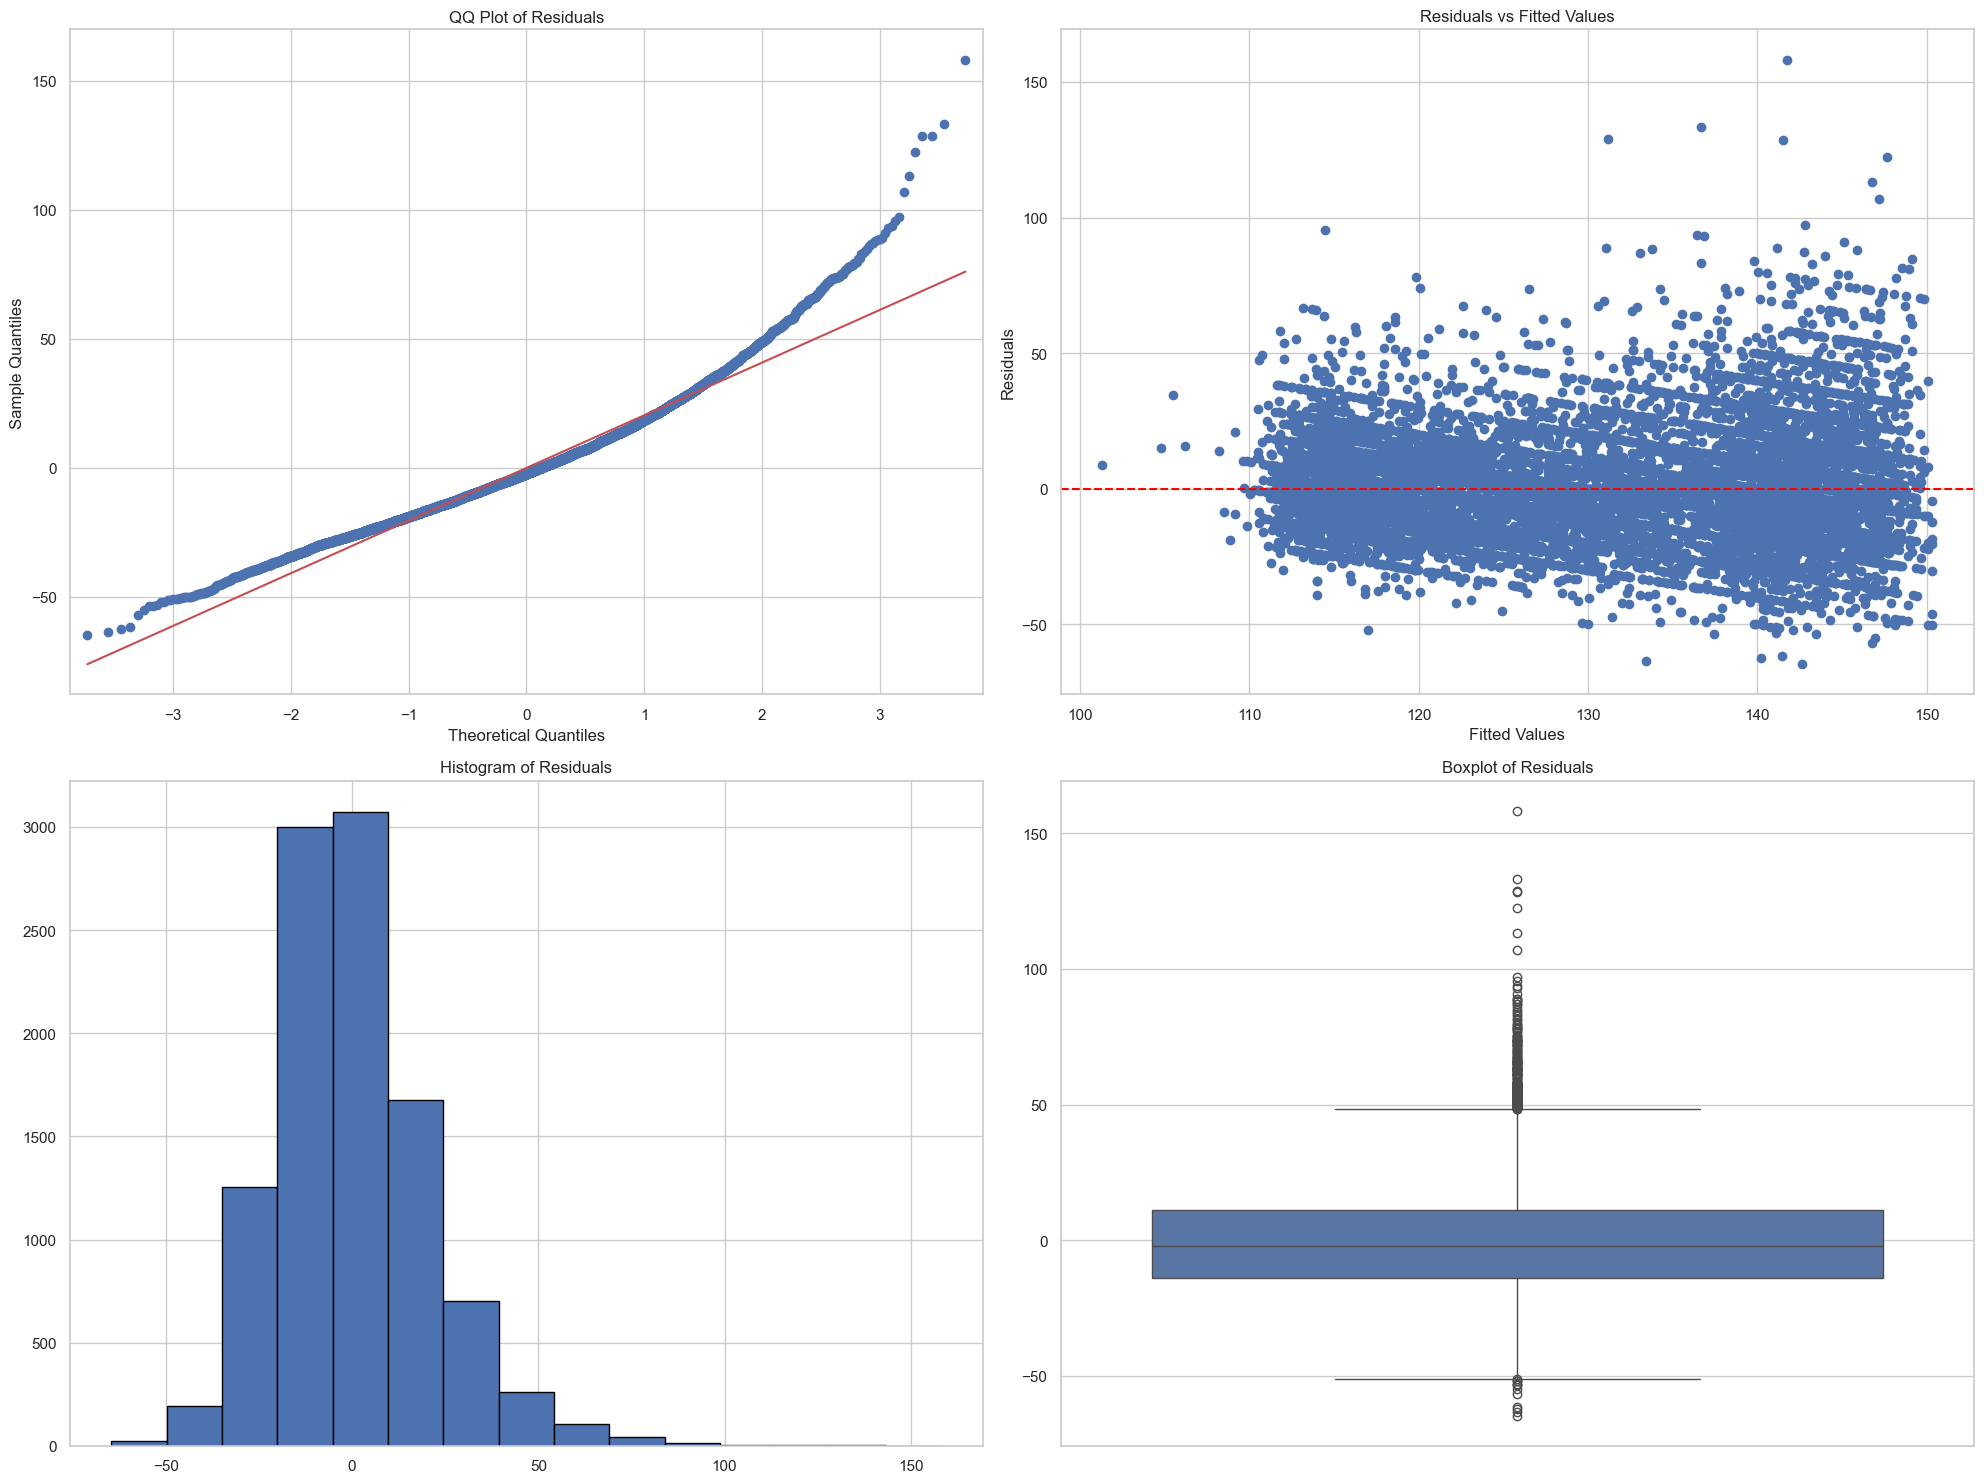

In [132]:
residuals = bpsystol_model.resid
fitted = bpsystol_model.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [133]:
influence_4 = oi.OLSInfluence(bpsystol_model).summary_frame()
influence_4

dfb_Intercept   dfb_age  dfb_vitaminc  dfb_zinc   cooks_d  \
0           0.013587 -0.009267      0.016638 -0.019103  0.000226   
1           0.011816  0.001852     -0.003179 -0.015258  0.000082   
2           0.001965  0.010480     -0.004517 -0.006806  0.000059   
3          -0.033169  0.020354      0.001172  0.032789  0.000428   
4           0.012379 -0.010404     -0.004000 -0.010454  0.000080   
...              ...       ...           ...       ...       ...   
10344      -0.006310  0.009234      0.002159  0.000657  0.000066   
10345      -0.018704 -0.009213      0.005780  0.026758  0.000270   
10346       0.000960 -0.002034      0.000784 -0.000870  0.000003   
10347      -0.013480  0.008824     -0.000092  0.010900  0.000057   
10348       0.004149  0.006643      0.009348 -0.012063  0.000102   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0           -1.502539  0.000400        -0.030057      -1.502630 -0.030059  
1           -0.890232  0.000415        -0.018134      -0.890223 -0.018134  
2           -0.721430  0.000453        -0.015355      -0.721413 -0.015355  
3            1.914864  0.000467         0.041399       1.915111  0.041405  
4           -1.033530  0.000300        -0.017911      -1.033533 -0.017911  
...               ...       ...              ...            ...       ...  
10344       -1.318416  0.000151        -0.016210      -1.318463 -0.016210  
10345        1.426432  0.000531         0.032881       1.426503  0.032883  
10346       -0.264971  0.000167        -0.003423      -0.264959 -0.003423  
10347       -0.719964  0.000439        -0.015080      -0.719947 -0.015079  
10348       -0.954993  0.000447        -0.020188      -0.954989 -0.020188  

[10349 rows x 10 columns]

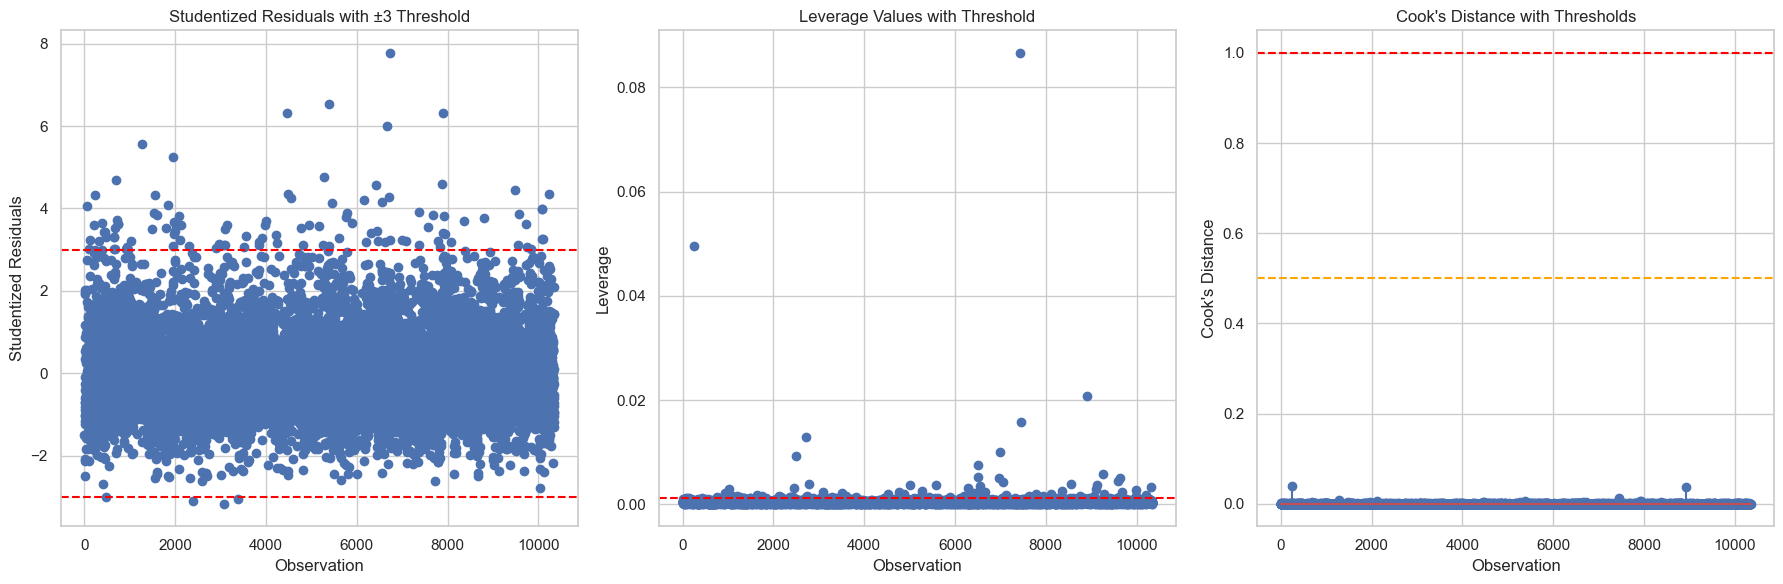

In [134]:
k = len(bpsystol_model.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_4["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_4["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_4["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [135]:
bpsystol_hetro = ssd.het_breuschpagan(bpsystol_model.resid,bpsystol_model.model.exog)
bpsystol_hetro_test_statistic, bpsystol_hetro_p_value = bpsystol_hetro[:2]
bpsystol_hetro_test_statistic, bpsystol_hetro_p_value

(331.23772728871336, 1.7216965915181788e-71)

### **weight**

In [136]:
waight =1/(bpsystol_model.resid**2)

In [137]:
w_bpsystol_model=smf.wls('np.log(bpsystol)~np.log(age)+np.log(vitaminc)+np.log(zinc)',data=nhanes,weights=waight).fit()

In [138]:
print(w_bpsystol_model.summary())

                            WLS Regression Results                            
Dep. Variable:       np.log(bpsystol)   R-squared:                       0.997
Model:                            WLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.060e+06
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:12:59   Log-Likelihood:                 1758.7
No. Observations:               10349   AIC:                            -3509.
Df Residuals:                   10345   BIC:                            -3480.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9423      0.002  

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


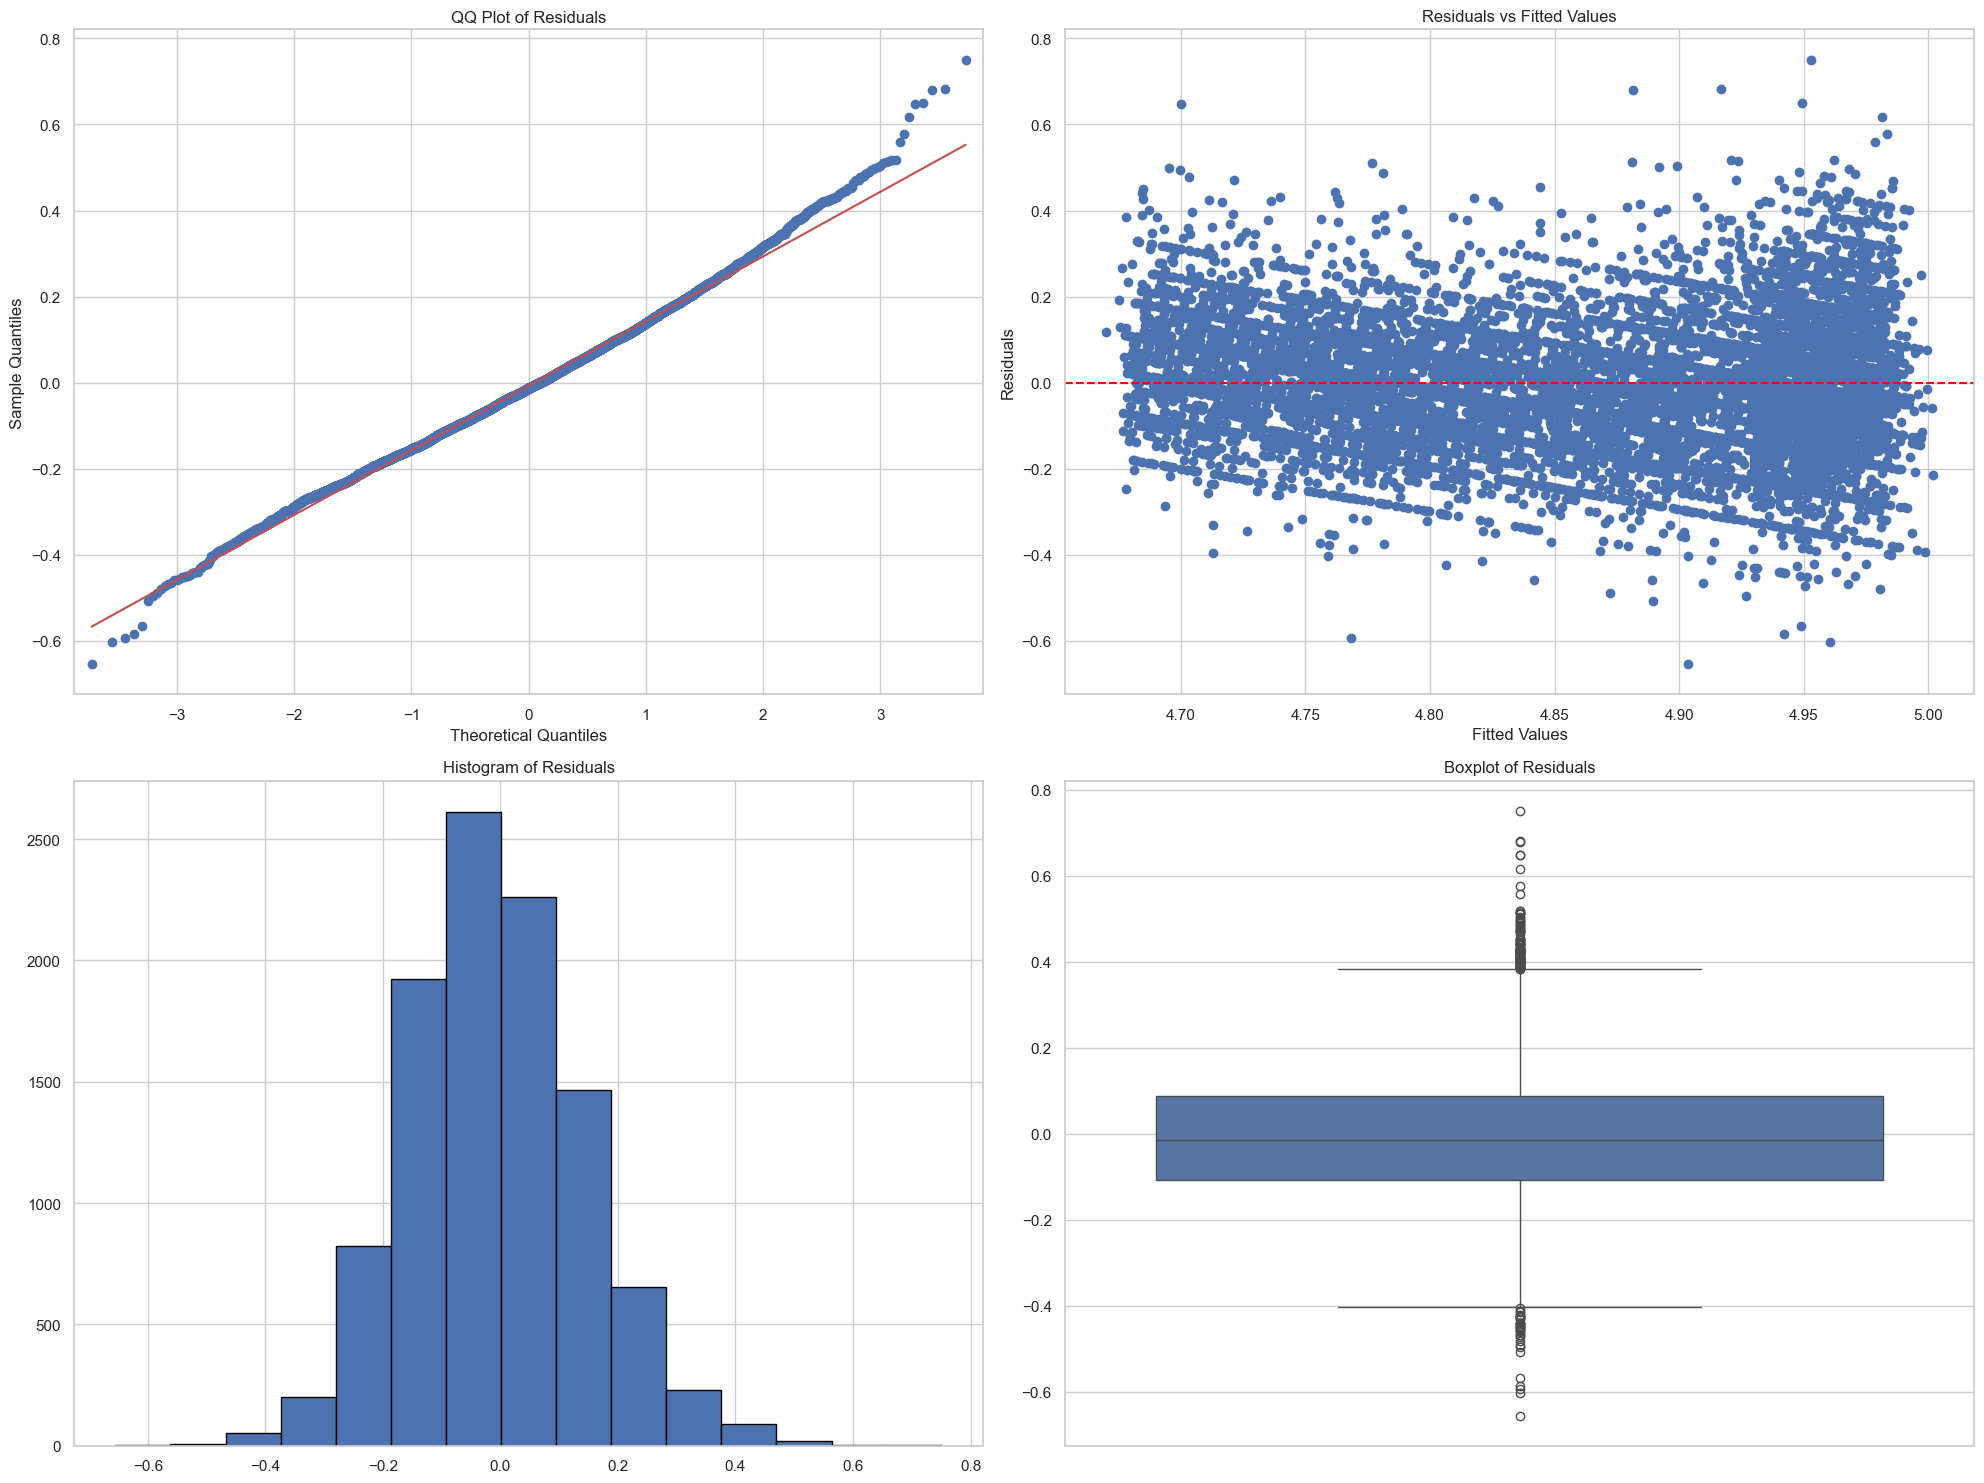

In [139]:
residuals = w_bpsystol_model.resid
fitted = w_bpsystol_model.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [140]:
influence_5 = oi.OLSInfluence(w_bpsystol_model).summary_frame()
influence_5

dfb_Intercept  dfb_np.log(age)  dfb_np.log(vitaminc)  dfb_np.log(zinc)  \
0          -8.858410        16.715465              5.017260          2.873971   
1          -8.879692        16.741544              4.942133          2.885236   
2          -8.918454        16.772137              4.940549          2.912788   
3          -9.018601        16.783274              4.972426          3.013385   
4          -8.891533        16.719513              4.941996          2.906276   
...              ...              ...                   ...               ...   
10344      -8.933459        16.763099              4.954153          2.931074   
10345      -8.984717        16.723911              4.978643          3.002281   
10346      -8.922247        16.737096              4.956896          2.931447   
10347      -8.973436        16.763943              4.950493          2.972273   
10348      -8.892756        16.758000              4.996542          2.892280   

        cooks_d  standard_resid      hat_diag  dffits_internal  student_resid  \
0      0.000063      -12.749687  1.544943e-06        -0.015847      -1.731563   
1      0.000033       -8.289780  1.941904e-06        -0.011552      -1.125766   
2      0.000067       -5.463604  8.913152e-06        -0.016312      -0.741949   
3      0.000017       11.956310  4.875582e-07         0.008349       1.623841   
4      0.000010       -8.002198  5.953609e-07        -0.006174      -1.086700   
...         ...             ...           ...              ...            ...   
10344  0.000031      -12.272100  8.212140e-07        -0.011121      -1.666701   
10345  0.000058       10.267174  2.217606e-06         0.015290       1.394359   
10346  0.000002       -1.960406  1.766388e-06        -0.002605      -0.266212   
10347  0.000052       -6.013828  5.785778e-06        -0.014465      -0.816672   
10348  0.000059       -8.422671  3.347058e-06        -0.015409      -1.143825   

         dffits  
0     -0.002152  
1     -0.001569  
2     -0.002215  
3      0.001134  
4     -0.000838  
...         ...  
10344 -0.001510  
10345  0.002076  
10346 -0.000354  
10347 -0.001964  
10348 -0.002093  

[10349 rows x 10 columns]

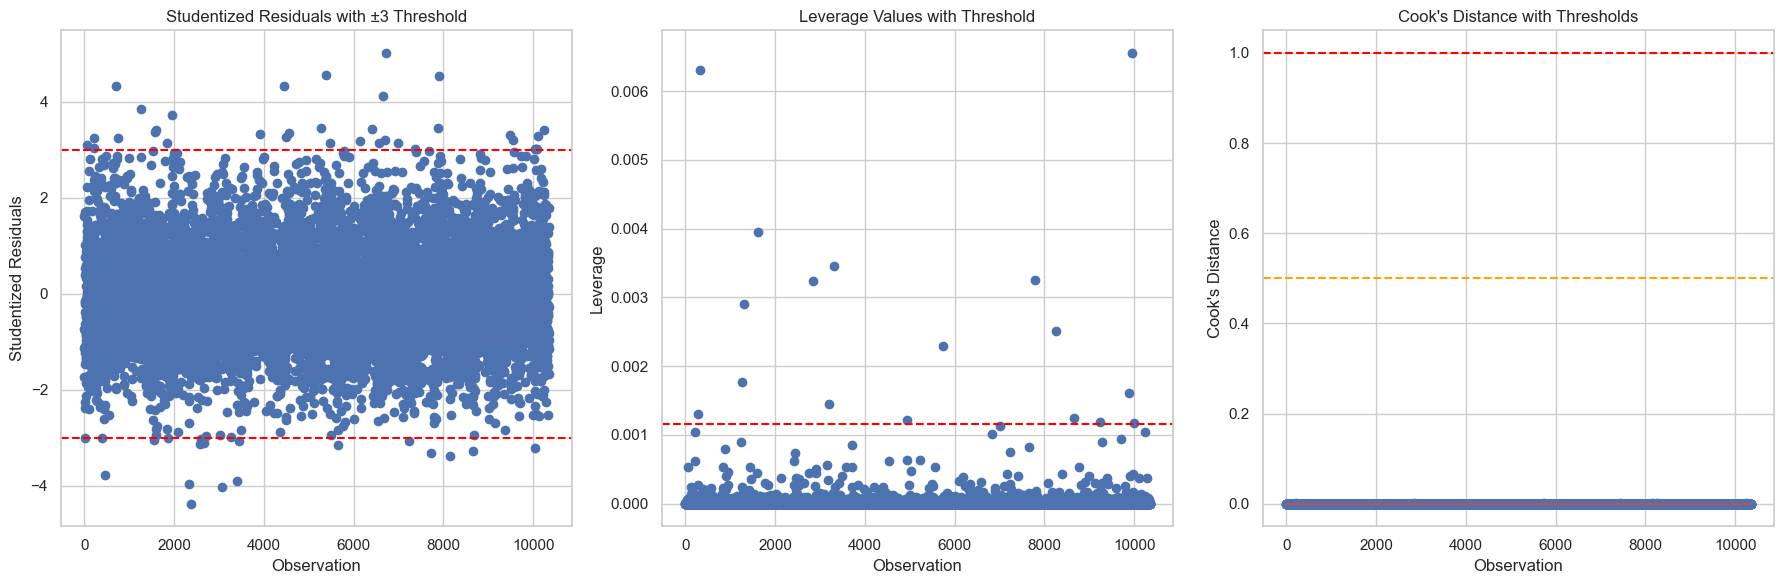

In [141]:
k = len(w_bpsystol_model.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_5["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_5["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_5["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [142]:
w_bpsystol_hetro = ssd.het_breuschpagan(w_bpsystol_model.resid,w_bpsystol_model.model.exog)
w_bpsystol_hetro_test_statistic, w_bpsystol_hetro_p_value = w_bpsystol_hetro[:2]
w_bpsystol_hetro_test_statistic, w_bpsystol_hetro_p_value

(113.76338285050466, 1.699436814369022e-24)

## **hct_model**

In [143]:
hct_model = smf.ols('(tcresult)~weight+age+sex+hdresult',data=nhanes).fit()

In [144]:
print(hct_model.summary())

                            OLS Regression Results                            
Dep. Variable:               tcresult   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     553.2
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:13:42   Log-Likelihood:                -54038.
No. Observations:               10349   AIC:                         1.081e+05
Df Residuals:                   10344   BIC:                         1.081e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    130.4219      3.379     38.599      0.0

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


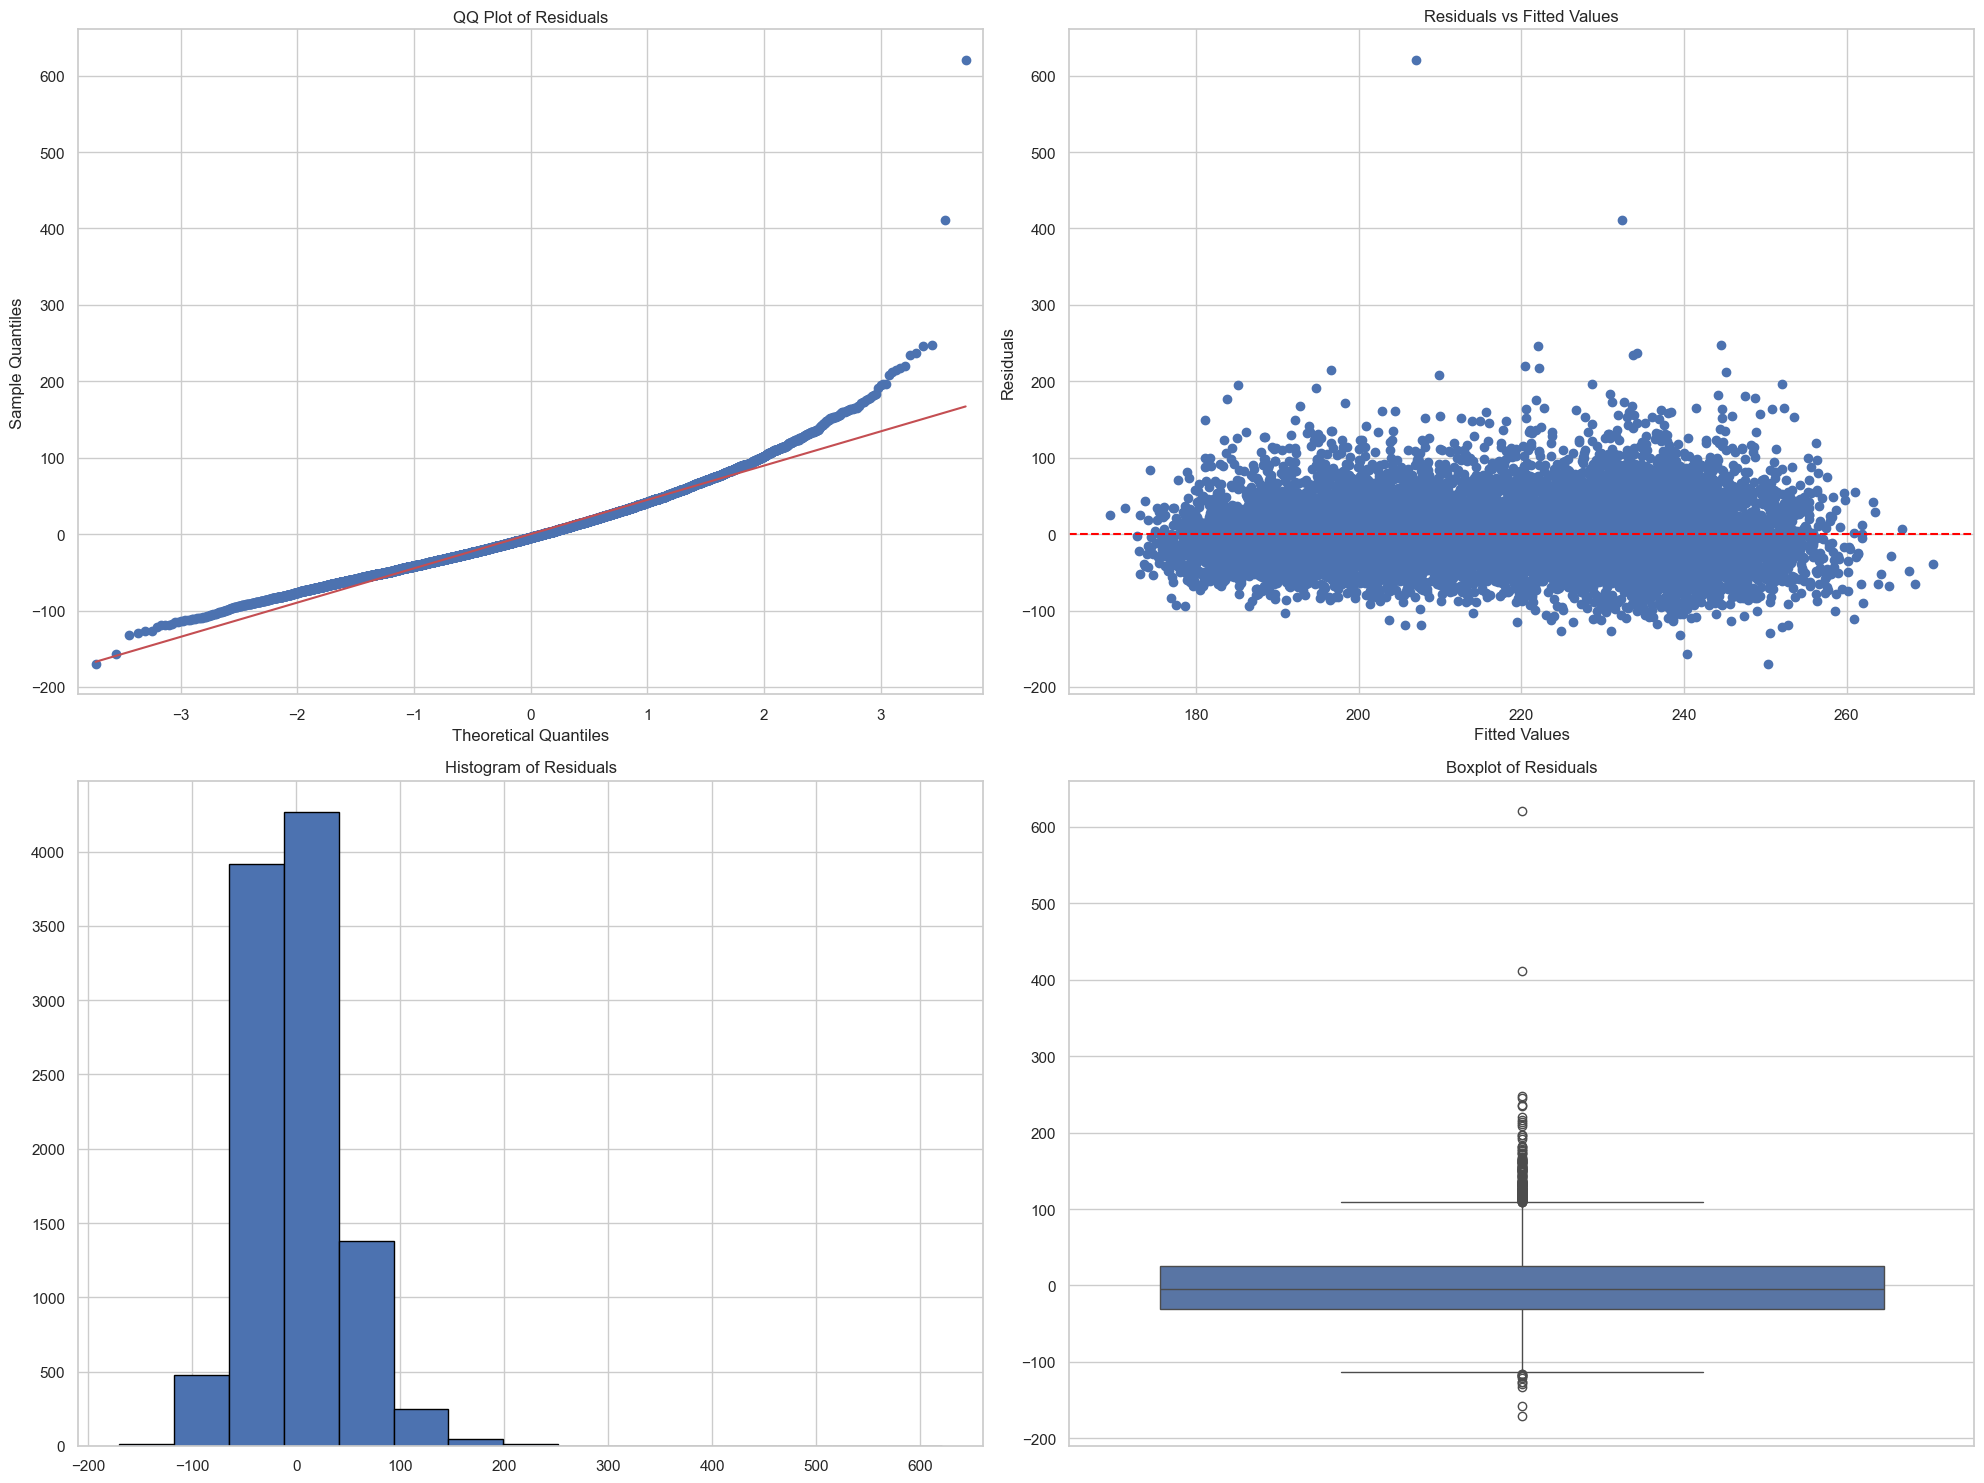

In [145]:
residuals = hct_model.resid
fitted = hct_model.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [146]:
influence_6 = oi.OLSInfluence(hct_model).summary_frame()
influence_6

dfb_Intercept  dfb_weight   dfb_age   dfb_sex  dfb_hdresult   cooks_d  \
0           0.000851   -0.002113  0.000863  0.002828      0.000289  0.000003   
1          -0.007460    0.007894  0.002211  0.002760      0.000107  0.000031   
2          -0.005642   -0.002731  0.019411  0.010422     -0.004885  0.000137   
3           0.010737   -0.021636 -0.010060  0.020537      0.006109  0.000202   
4          -0.002996    0.006551  0.014264 -0.016867     -0.004419  0.000147   
...              ...         ...       ...       ...           ...       ...   
10344      -0.004314    0.002894  0.002918  0.002728      0.000722  0.000010   
10345      -0.020276    0.059574 -0.021047 -0.043642     -0.007308  0.001055   
10346       0.005650   -0.015917 -0.005854  0.015929      0.007540  0.000117   
10347      -0.004586    0.003638  0.005141  0.002448     -0.001361  0.000018   
10348      -0.006684    0.008135  0.006144 -0.009881     -0.001152  0.000043   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0            0.206135  0.000338         0.003792       0.206126  0.003792  
1           -0.673656  0.000343        -0.012486      -0.673638 -0.012486  
2           -1.256020  0.000434        -0.026162      -1.256055 -0.026163  
3           -1.249936  0.000646        -0.031771      -1.249970 -0.031772  
4            1.555982  0.000304         0.027124       1.556089  0.027126  
...               ...       ...              ...            ...       ...  
10344       -0.423845  0.000283        -0.007137      -0.423828 -0.007137  
10345        2.201124  0.001087         0.072622       2.201533  0.072636  
10346       -0.910113  0.000703        -0.024143      -0.910106 -0.024143  
10347       -0.493693  0.000374        -0.009552      -0.493675 -0.009552  
10348       -0.693055  0.000450        -0.014709      -0.693038 -0.014709  

[10349 rows x 11 columns]

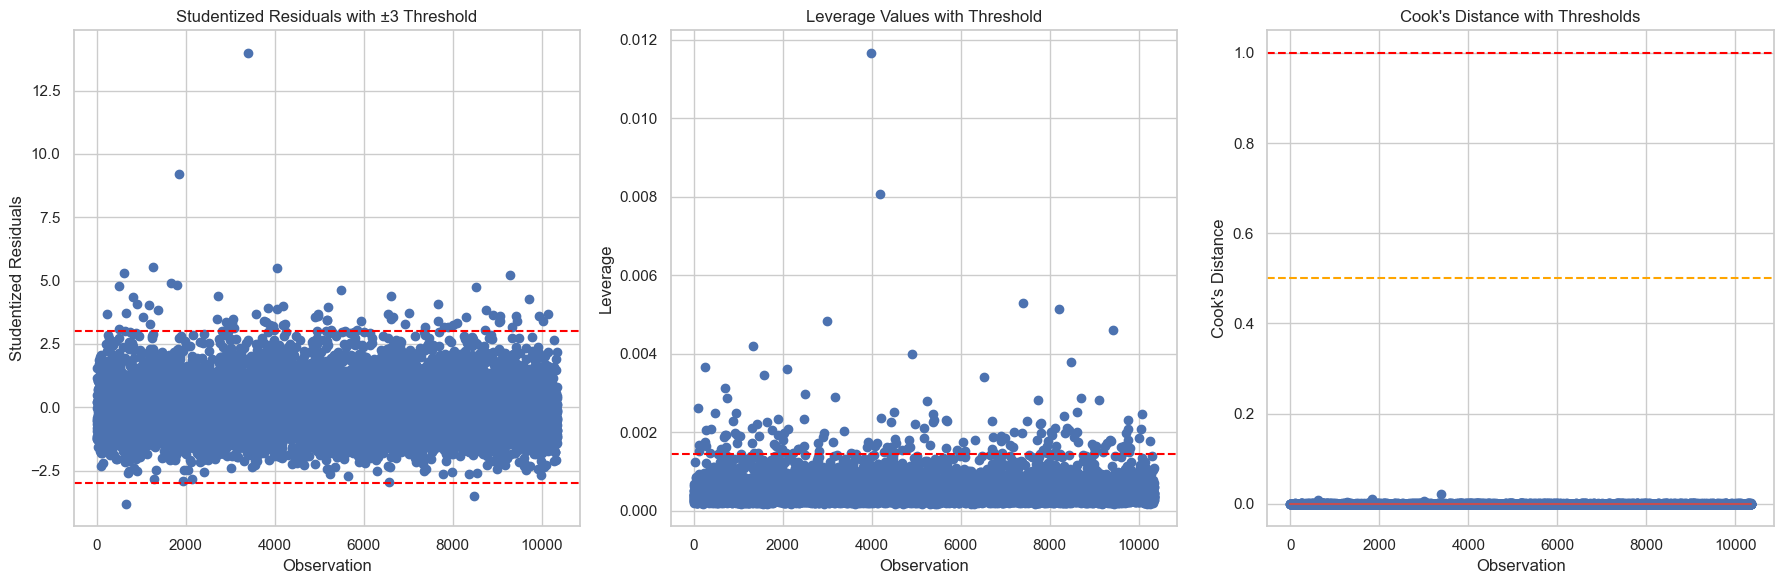

In [147]:
k = len(hct_model.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_6["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_6["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_6["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [148]:
hct_hetro = ssd.het_breuschpagan(hct_model.resid,hct_model.model.exog)
hct_hetro_test_statistic, hct_hetro_p_value = hct_hetro[:2]
hct_hetro_test_statistic, hct_hetro_p_value

(45.2018457287695, 3.6097148786843032e-09)

### **transformation**

**transformation for y(dependant variable) beecase the four assumptions (normality, equal variance, dependency)** 

In [149]:
hct_model_t = smf.ols('np.log(tcresult)~weight+age+sex+hdresult',data=nhanes).fit()

In [150]:
print(hct_model_t.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(tcresult)   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     610.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:14:20   Log-Likelihood:                 1875.4
No. Observations:               10349   AIC:                            -3741.
Df Residuals:                   10344   BIC:                            -3705.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9301      0.015    323.962      0.0

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


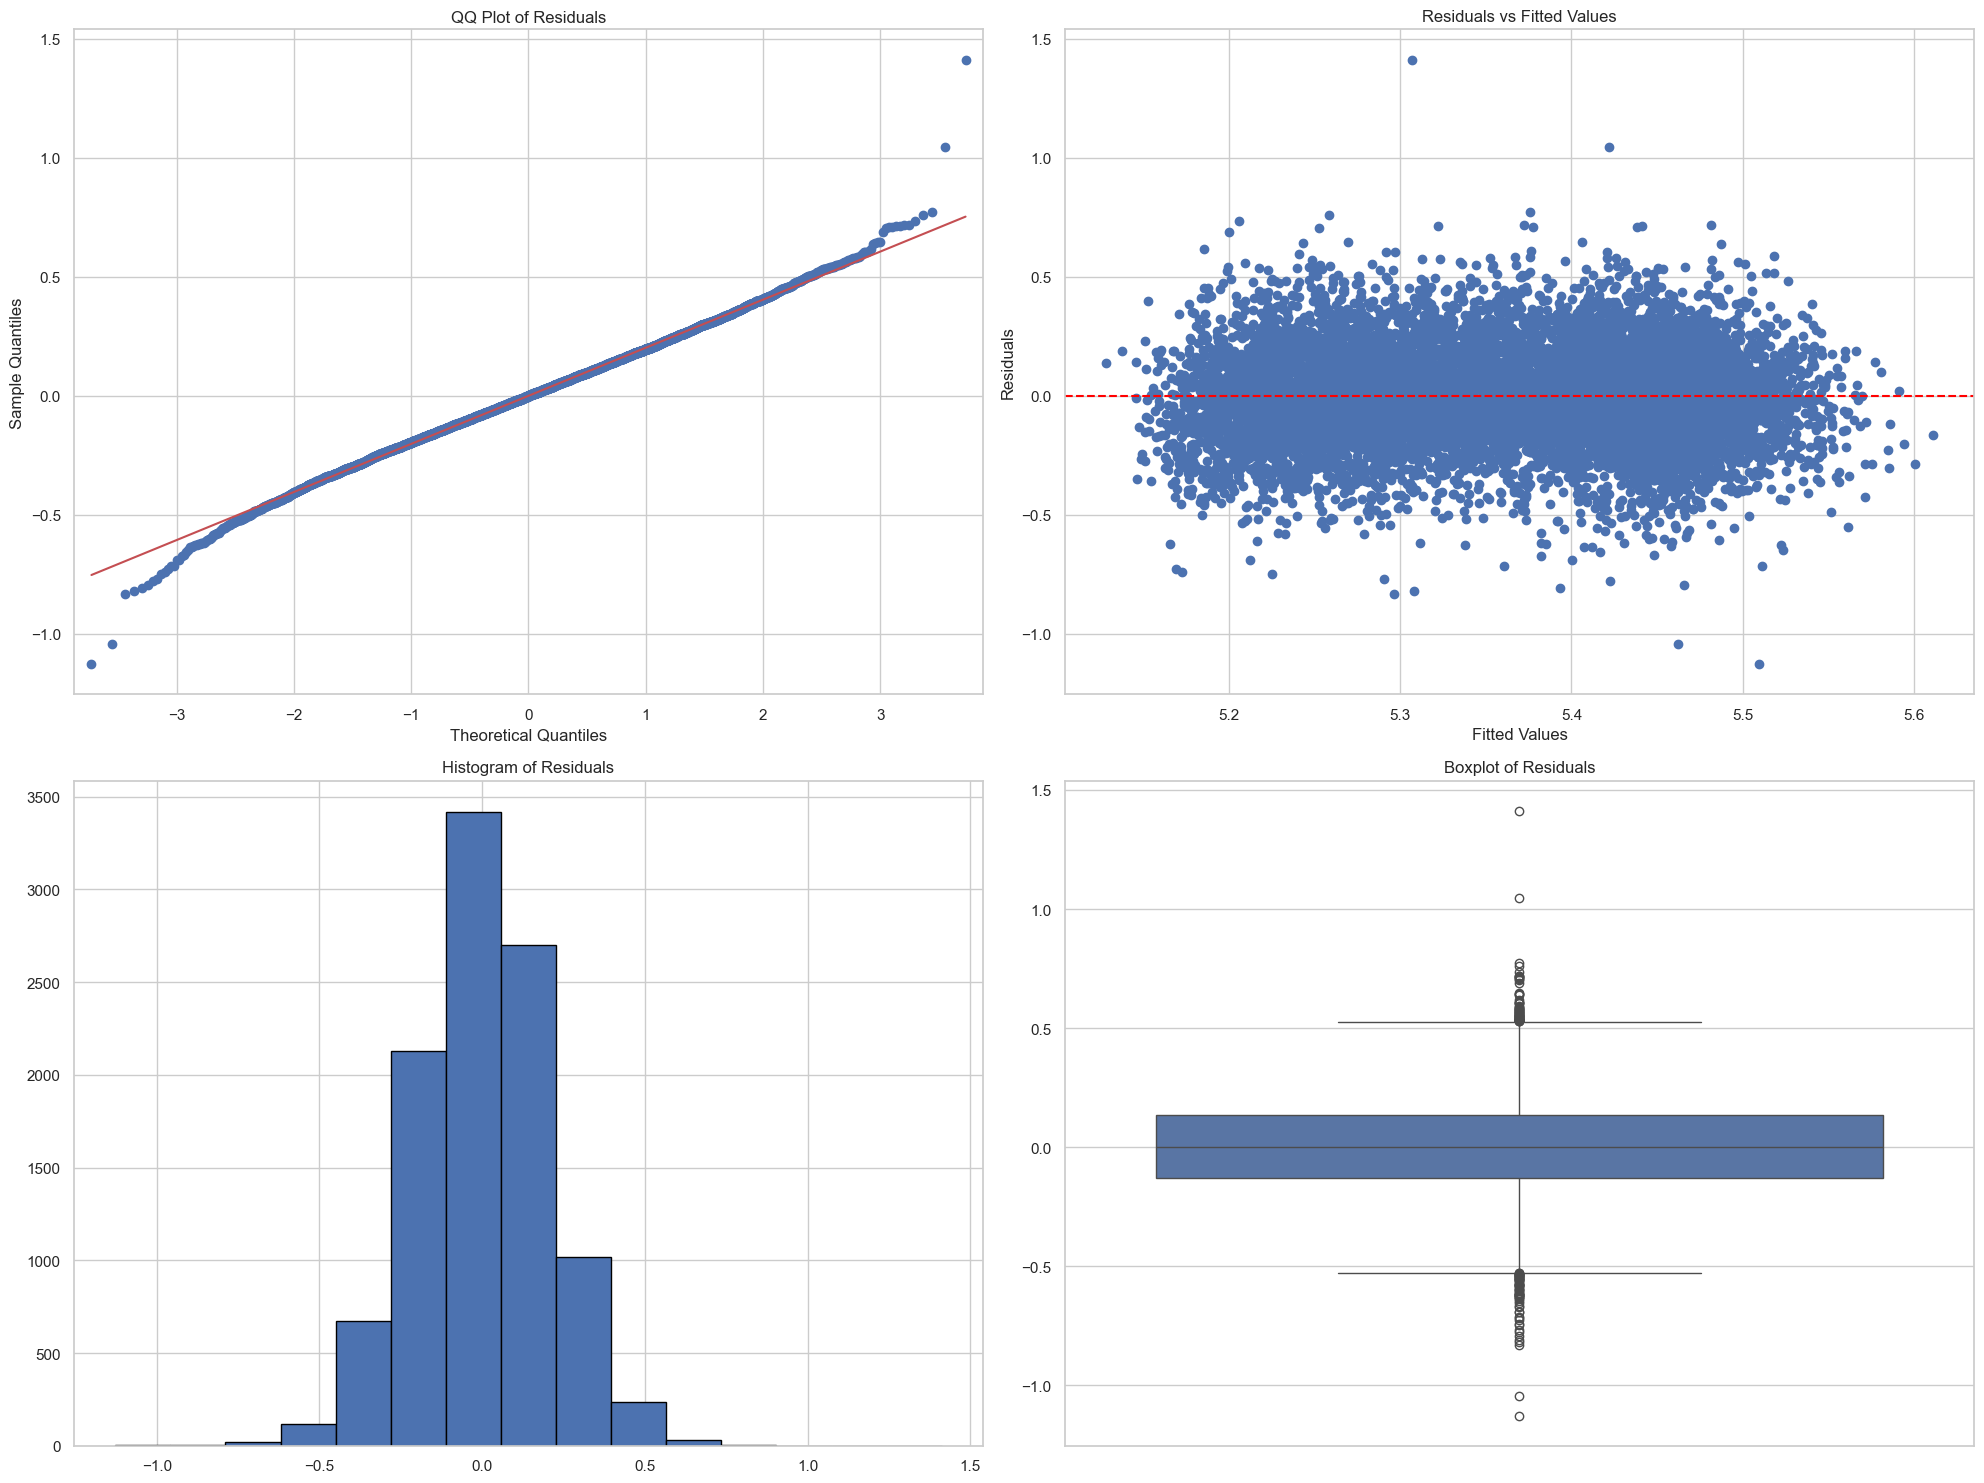

In [151]:
residuals = hct_model_t.resid
fitted = hct_model_t.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [152]:
influence_7 = oi.OLSInfluence(hct_model_t).summary_frame()
influence_7

dfb_Intercept  dfb_weight   dfb_age   dfb_sex  dfb_hdresult   cooks_d  \
0           0.001329   -0.003300  0.001347  0.004416      0.000451  0.000007   
1          -0.007001    0.007409  0.002075  0.002590      0.000100  0.000027   
2          -0.007153   -0.003463  0.024612  0.013215     -0.006194  0.000220   
3           0.010360   -0.020877 -0.009708  0.019817      0.005895  0.000188   
4          -0.002602    0.005689  0.012386 -0.014646     -0.003837  0.000111   
...              ...         ...       ...       ...           ...       ...   
10344      -0.003534    0.002371  0.002390  0.002235      0.000591  0.000007   
10345      -0.018416    0.054109 -0.019116 -0.039638     -0.006638  0.000870   
10346       0.005113   -0.014404 -0.005298  0.014415      0.006823  0.000095   
10347      -0.004281    0.003396  0.004799  0.002285     -0.001270  0.000016   
10348      -0.007663    0.009326  0.007044 -0.011328     -0.001320  0.000057   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0            0.321937  0.000338         0.005922       0.321923  0.005922  
1           -0.632279  0.000343        -0.011719      -0.632261 -0.011719  
2           -1.592499  0.000434        -0.033171      -1.592617 -0.033174  
3           -1.206109  0.000646        -0.030657      -1.206135 -0.030657  
4            1.351162  0.000304         0.023553       1.351216  0.023554  
...               ...       ...              ...            ...       ...  
10344       -0.347238  0.000283        -0.005847      -0.347223 -0.005847  
10345        1.999271  0.001087         0.065962       1.999560  0.065972  
10346       -0.823637  0.000703        -0.021849      -0.823625 -0.021848  
10347       -0.460867  0.000374        -0.008917      -0.460849 -0.008917  
10348       -0.794543  0.000450        -0.016863      -0.794528 -0.016863  

[10349 rows x 11 columns]

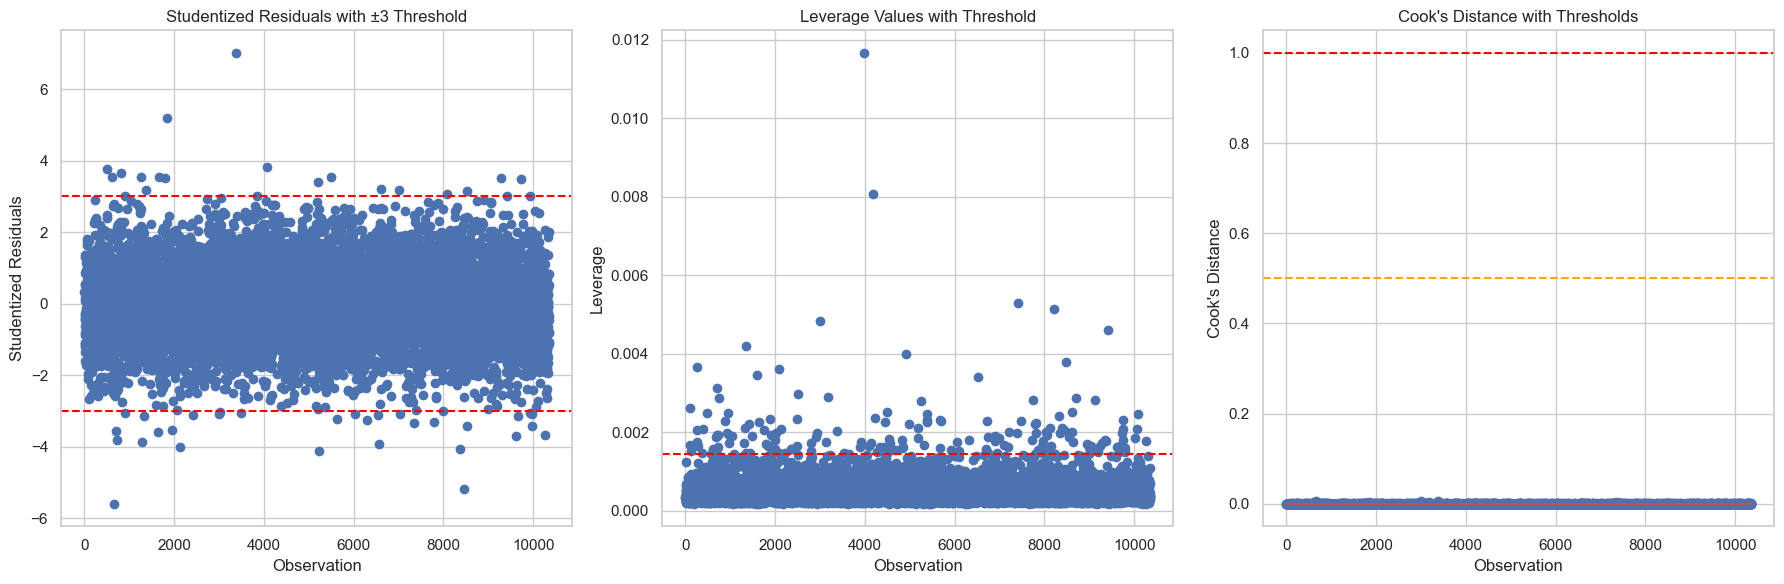

In [153]:
k = len(hct_model_t.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_7["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_7["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_7["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [154]:
hct_hetro_t = ssd.het_breuschpagan(hct_model_t.resid,hct_model_t.model.exog)
hct_hetro_t_test_statistic, hct_hetro_t_p_value = hct_hetro_t[:2]
print(hct_hetro_t_test_statistic, hct_hetro_t_p_value)

51.583116803179465 1.6860345998642798e-10


## **weight**

In [155]:
weight =1/(bpsystol_model.resid**2)

In [156]:
w_hct_model=smf.wls('(tcresult)~weight+age+sex+hdresult',data=nhanes,weights=waight).fit()

In [157]:
w_hct_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               tcresult   R-squared:                       0.630
Model:                            WLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     4408.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:14:57   Log-Likelihood:                -82621.
No. Observations:               10349   AIC:                         1.653e+05
Df Residuals:                   10344   BIC:                         1.653e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    223.1733      1.735    128.622      0.000     219.772     226.574
weight        -0.5026      0.030    -16.690      0.000      -0.562      -0.444
age            1.6590      0.021     80.121      0.000       1.618       1.700
sex           11.2799      0.868     12.997      0.000       9.579      12.981
hdresult      -0.6615      0.037    -17.708      0.000      -0.735      -0.588
==============================================================================
Omnibus:                    19289.464   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        149006747.820
Skew:                         -13.366   Prob(JB):                         0.00
Kurtosis:                     590.232   Cond. No.                     7.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


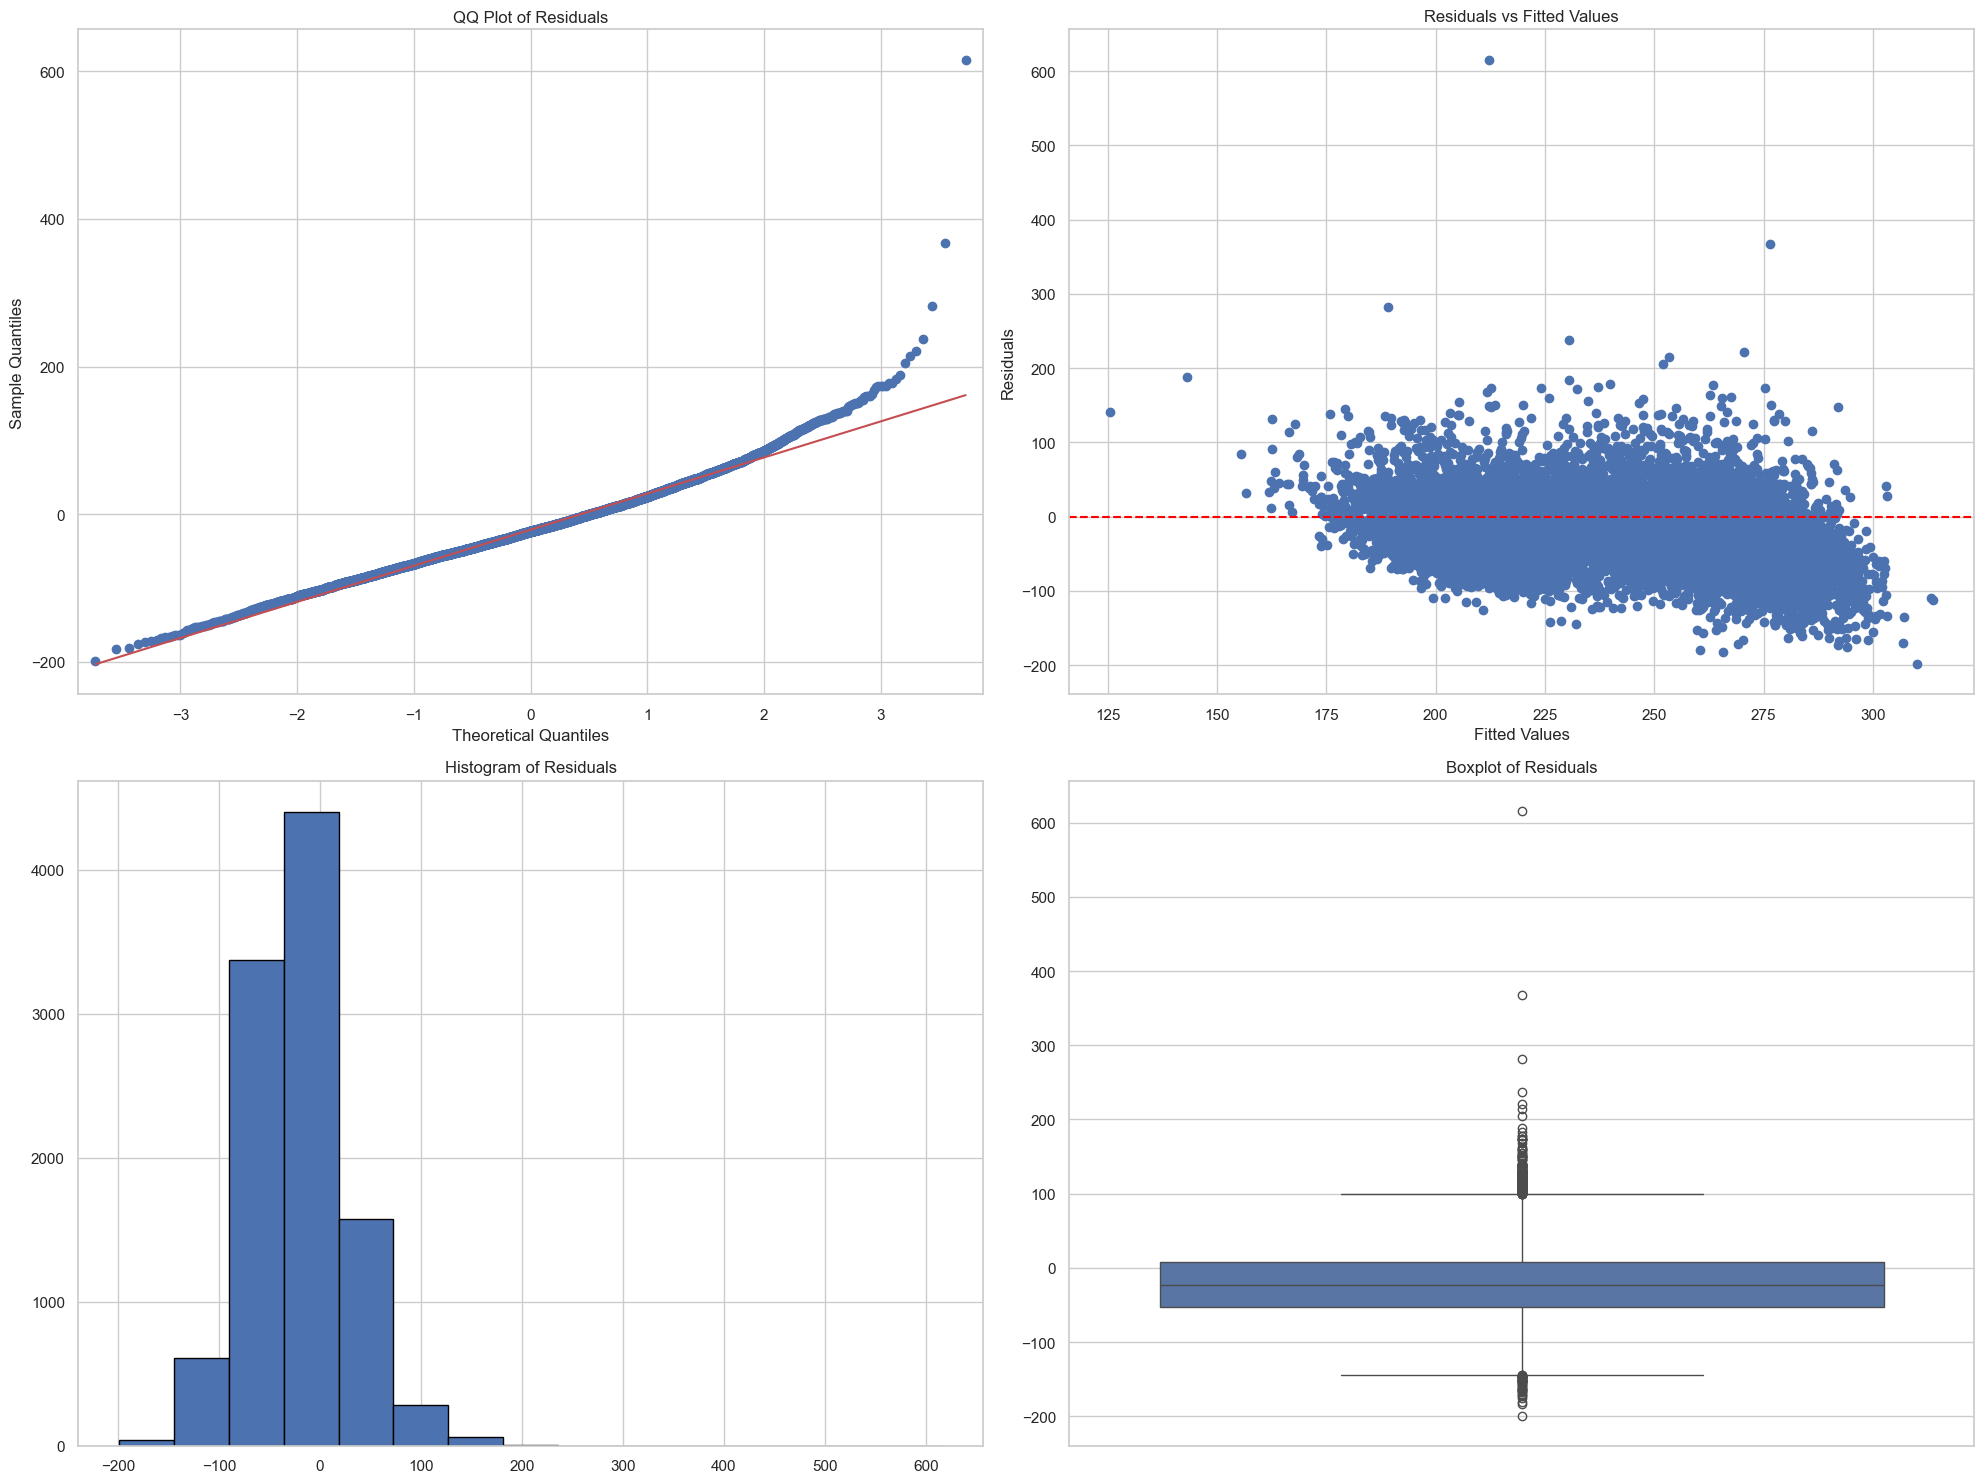

In [158]:
residuals = w_hct_model.resid
fitted = w_hct_model.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [159]:
influence_8 = oi.OLSInfluence(w_hct_model).summary_frame()
influence_8

dfb_Intercept  dfb_weight    dfb_age    dfb_sex  dfb_hdresult  \
0          84.351163  -44.195624  41.241521  38.501180    -40.093233   
1          84.327301  -44.179755  41.244977  38.501825    -40.094304   
2          84.337471  -44.199938  41.280838  38.517470    -40.103981   
3          84.387738  -44.231544  41.223201  38.535332    -40.087436   
4          84.349040  -44.186206  41.272460  38.470772    -40.104916   
...              ...         ...        ...        ...           ...   
10344      84.335851  -44.187537  41.245811  38.501258    -40.092849   
10345      84.305829  -44.102650  41.208272  38.427926    -40.113957   
10346      84.369114  -44.220405  41.229959  38.525816    -40.083863   
10347      84.335274  -44.186430  41.250285  38.500882    -40.096101   
10348      84.329794  -44.179409  41.252718  38.479515    -40.096246   

            cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
0      8.459852e-08       -0.468091  0.000002        -0.000650      -0.738609   
1      1.015453e-06       -0.708792  0.000010        -0.002253      -1.118436   
2      1.156114e-06       -0.697011  0.000012        -0.002404      -1.099907   
3      1.537913e-06       -0.899827  0.000009        -0.002773      -1.419956   
4      7.895930e-07        0.722724  0.000008         0.001987       1.140529   
...             ...             ...       ...              ...            ...   
10344  2.025278e-07       -0.464372  0.000005        -0.001006      -0.732745   
10345  9.244720e-06        1.646205  0.000017         0.006799       2.598176   
10346  8.294915e-06       -0.707932  0.000083        -0.006440      -1.117100   
10347  4.584781e-07       -0.413323  0.000013        -0.001514      -0.652195   
10348  1.039107e-06       -0.895291  0.000006        -0.002279      -1.412723   

         dffits  
0     -0.001026  
1     -0.003556  
2     -0.003794  
3     -0.004376  
4      0.003136  
...         ...  
10344 -0.001588  
10345  0.010730  
10346 -0.010162  
10347 -0.002389  
10348 -0.003597  

[10349 rows x 11 columns]

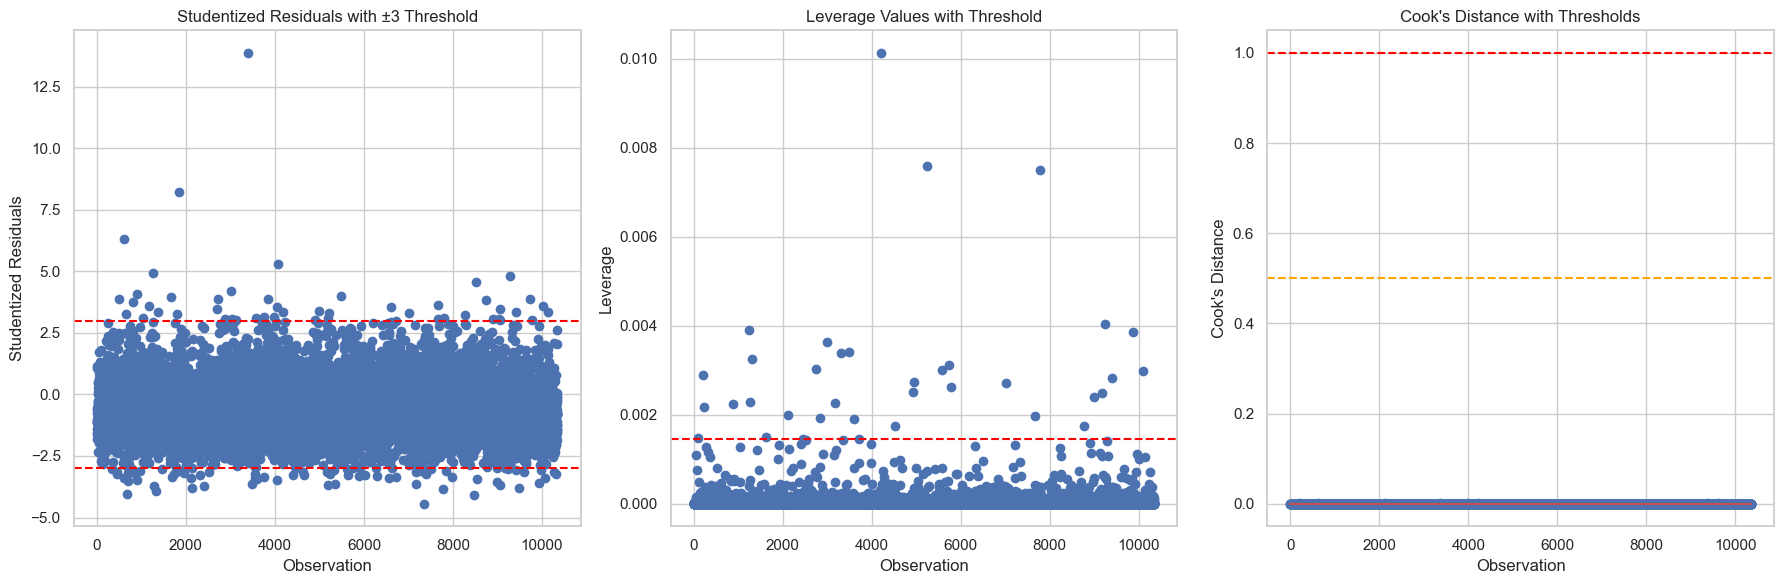

In [160]:
k = len(w_hct_model.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_8["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_8["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_8["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [161]:
w_hct_hetro = ssd.het_breuschpagan(w_hct_model.resid,w_hct_model.model.exog)
w_hct_hetro_test_statistic, w_hct_hetro_p_value = w_hct_hetro[:2]
w_hct_hetro_test_statistic, w_hct_hetro_p_value

(363.19206191897774, 2.4850615620944477e-77)

### **wtransformation**

**transformation for y(dependant variable)  beecase the four assumptions (normality, equal variance, dependency)** 

In [162]:
w_hct_model_t=smf.wls('np.log(tcresult)~weight+age+sex+hdresult',data=nhanes,weights=waight).fit()

In [163]:
print(w_hct_model_t.summary())

                            WLS Regression Results                            
Dep. Variable:       np.log(tcresult)   R-squared:                       0.560
Model:                            WLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     3286.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:15:38   Log-Likelihood:                -27326.
No. Observations:               10349   AIC:                         5.466e+04
Df Residuals:                   10344   BIC:                         5.470e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4629      0.008    658.489      0.0

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we reject H0


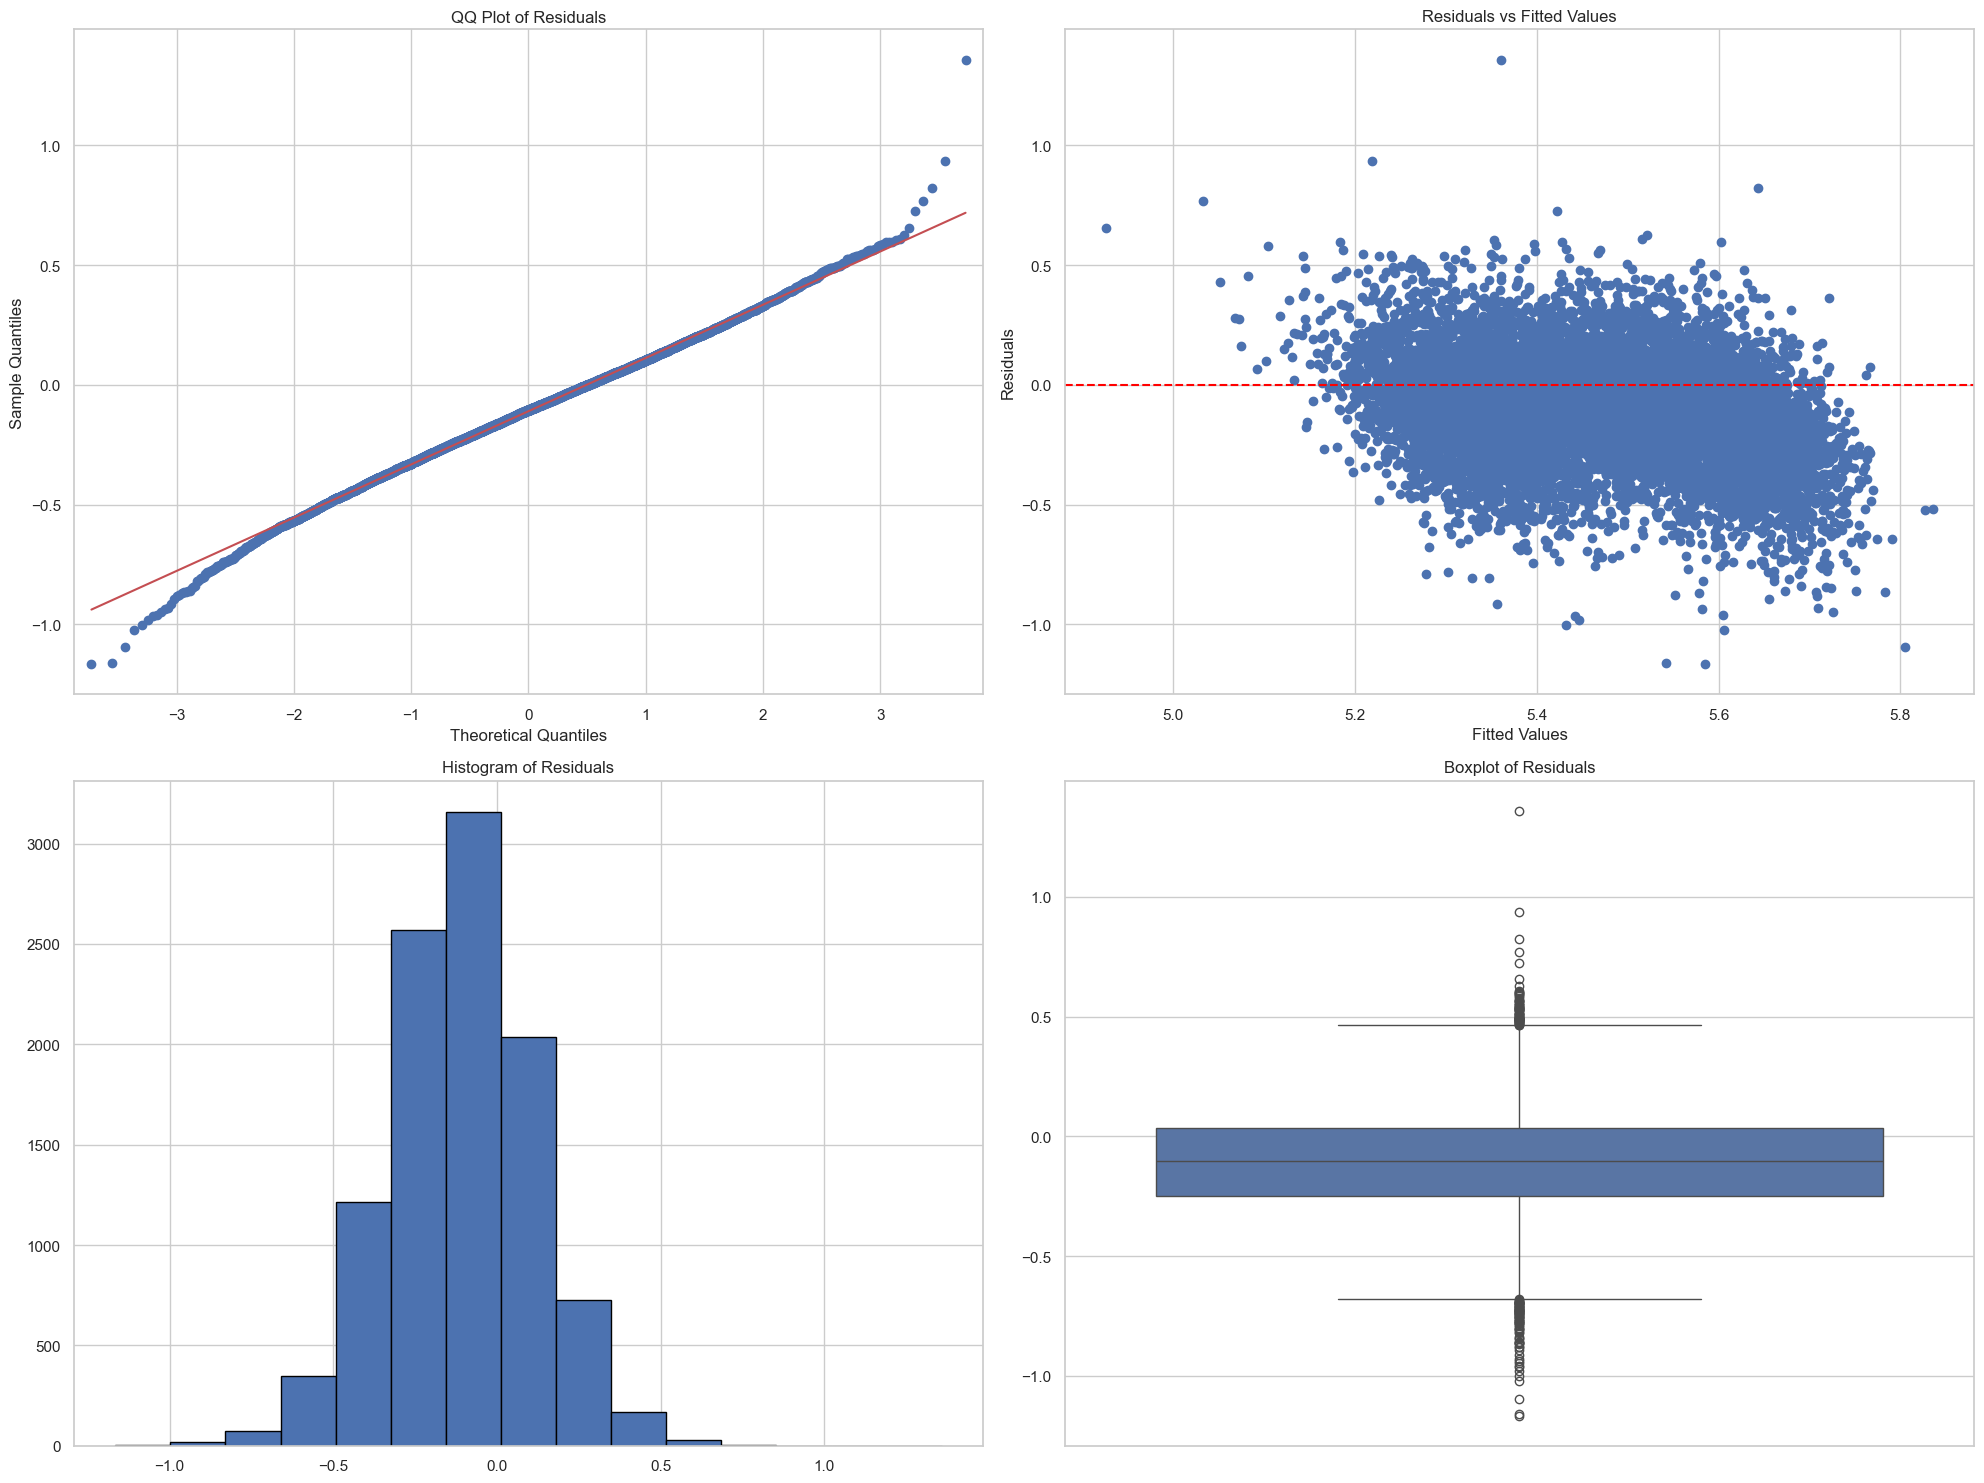

In [164]:
residuals = w_hct_model_t.resid
fitted = w_hct_model_t.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**check the four assumptions (normality, leniarty, equal variance, dependency)**

In [165]:
influence_9 = oi.OLSInfluence(w_hct_model_t).summary_frame()
influence_9

dfb_Intercept  dfb_weight    dfb_age    dfb_sex  dfb_hdresult  \
0         107.587851  -53.649882  34.262792  39.684384    -44.425101   
1         107.563791  -53.632728  34.264704  39.681722    -44.426264   
2         107.574437  -53.656463  34.312296  39.704613    -44.440307   
3         107.622629  -53.682803  34.243421  39.714215    -44.419825   
4         107.584728  -53.639306  34.287221  39.653970    -44.435241   
...              ...         ...        ...        ...           ...   
10344     107.572995  -53.640435  34.264858  39.680558    -44.424927   
10345     107.547430  -53.563905  34.229242  39.613932    -44.444114   
10346     107.602468  -53.669957  34.250755  39.703173    -44.416762   
10347     107.571176  -53.638959  34.269719  39.680823    -44.427920   
10348     107.562964  -53.630120  34.274800  39.657547    -44.428895   

            cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
0      7.323967e-08       -0.435534  0.000002        -0.000605      -0.729576   
1      1.102508e-06       -0.738549  0.000010        -0.002348      -1.237183   
2      2.067953e-06       -0.932201  0.000012        -0.003216      -1.561741   
3      1.218830e-06       -0.801060  0.000009        -0.002469      -1.341966   
4      4.426834e-07        0.541150  0.000008         0.001488       0.906572   
...             ...             ...       ...              ...            ...   
10344  2.177197e-07       -0.481474  0.000005        -0.001043      -0.806532   
10345  7.099096e-06        1.442576  0.000017         0.005958       2.416956   
10346  5.990370e-06       -0.601607  0.000083        -0.005473      -1.007797   
10347  5.800690e-07       -0.464911  0.000013        -0.001703      -0.778791   
10348  1.303771e-06       -1.002847  0.000006        -0.002553      -1.679941   

         dffits  
0     -0.001014  
1     -0.003933  
2     -0.005387  
3     -0.004136  
4      0.002492  
...         ...  
10344 -0.001748  
10345  0.009982  
10346 -0.009168  
10347 -0.002853  
10348 -0.004277  

[10349 rows x 11 columns]

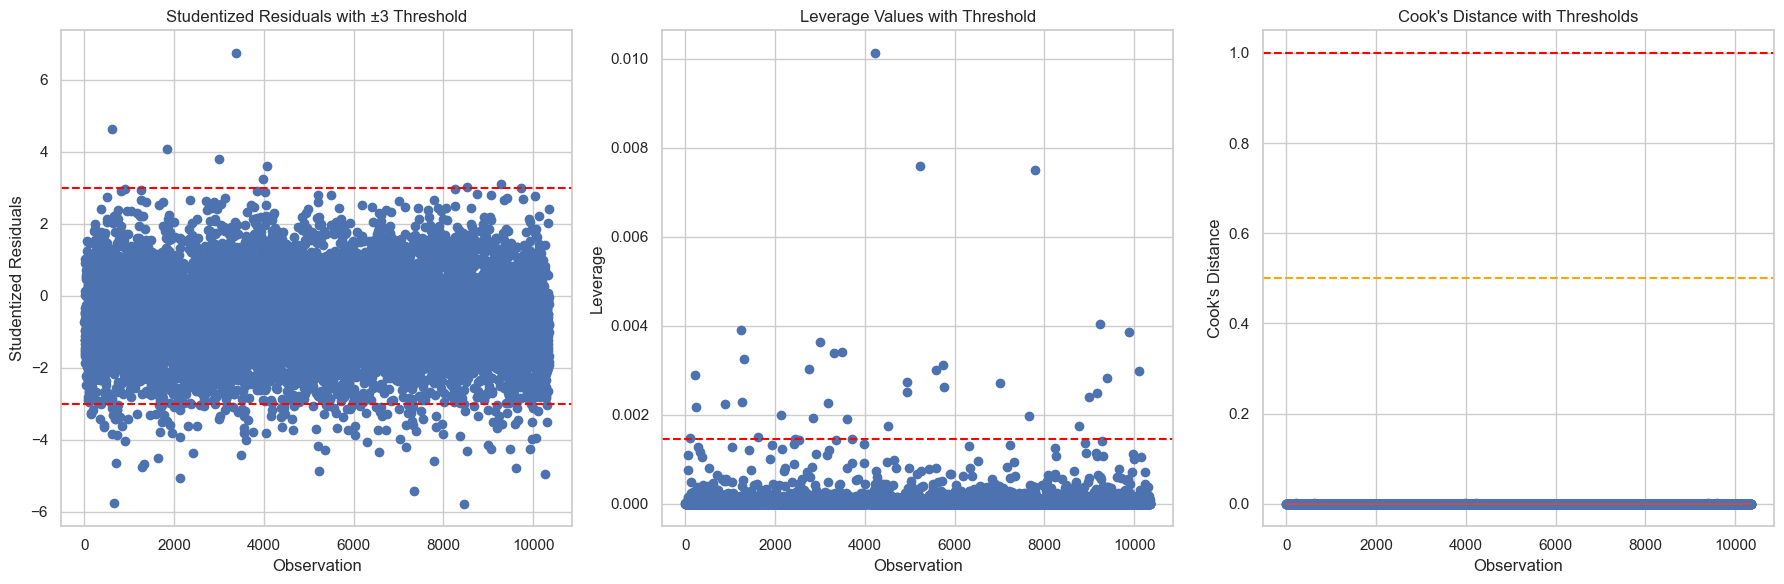

In [166]:
k = len(w_hct_model_t.params) - 1  # subtracting 1 for the intercept
n = len(num_nhanes)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence_9["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence_9["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence_9["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)
 
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

reject H0

In [167]:
w_hct_hetro_t = ssd.het_breuschpagan(w_hct_model_t.resid,w_hct_model_t.model.exog)
w_hct_hetro_t_test_statistic, w_hct_hetro_t_p_value = w_hct_hetro_t[:2]
w_hct_hetro_t_test_statistic, w_hct_hetro_t_p_value

(561.6795982616044, 3.0396757538430395e-120)

## **diabetes_logistic_model**

In [168]:
diabetes_model = smf.logit('(heartatk)~age+sex+weight',data=nhanes).fit()

Optimization terminated successfully.
         Current function value: 0.156972
         Iterations 9


In [169]:
print(diabetes_model.summary())

                           Logit Regression Results                           
Dep. Variable:               heartatk   No. Observations:                10349
Model:                          Logit   Df Residuals:                    10345
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.1585
Time:                        19:16:18   Log-Likelihood:                -1624.5
converged:                       True   LL-Null:                       -1930.6
Covariance Type:            nonrobust   LLR p-value:                2.314e-132
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9833      0.422    -21.294      0.000      -9.810      -8.156
age            0.0866      0.005     17.536      0.000       0.077       0.096
sex            0.8422      0.107      7.904      0.0

H0: The model is a good-fitting model.

H1: The model is not a good-fitting model

in this model we reject all H0 except accept weight  


## **ANOVA**

In [170]:
a_bmi_model = smf.ols('(bmi)~hlthstat',data=nhanes).fit()
print(a_bmi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     45.14
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           2.92e-46
Time:                        19:16:18   Log-Likelihood:                -31052.
No. Observations:               10349   AIC:                         6.212e+04
Df Residuals:                   10343   BIC:                         6.216e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                24.74

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we accept H0 


In [171]:
av.anova_lm(a_bmi_model)

df         sum_sq      mean_sq         F        PR(>F)
hlthstat      5.0    5338.960006  1067.792001  45.13811  2.923497e-46
Residual  10343.0  244675.122883    23.656108       NaN           NaN

H0:all mean are equal

H1:at least two population means are different

reject H0 , that mean the hlthstat effect on bmi

In [172]:
bmi_model_a_h = smf.ols('(bmi)~hlthstat+weight',data=nhanes).fit()
print(bmi_model_a_h.summary())


                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     4174.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:16:18   Log-Likelihood:                -24799.
No. Observations:               10349   AIC:                         4.961e+04
Df Residuals:                   10342   BIC:                         4.966e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.32

H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

in this model we accept H0 except weight rject H0


In [173]:
av.anova_lm(bmi_model_a_h)

df         sum_sq        mean_sq             F         PR(>F)
hlthstat      5.0    5338.960006    1067.792001    151.124340  2.159545e-155
weight        1.0  171602.149641  171602.149641  24286.810196   0.000000e+00
Residual  10342.0   73072.973242       7.065652           NaN            NaN

H0:all mean are equal

H1:at least two population means are different

reject H0 We reject the hypothesis that the mean percent of  is the same for all
four groups.